In [3]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

# 머신러닝을 위한 모듈 
from sklearn.model_selection import train_test_split

import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop, Adam,SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

## 1. 개요

+ 파이썬로 구현된 쉽고 간결한 딥러닝 라이브러리다.
+ 구글의 엔지니어인 프랑소와 숄레 2015년 3월 발표
+ 내부적으로는 텐서플로우 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝 실험을 할 수 있도록 지원 
+ http:/keras.io/ko

## 2. 주요 특징 

+ 모듈화: 독립적인 모듈들을 조합하여 구현 
+ 최소주의 : 각 모듈을 짧고 간결 
+ 쉬운 확장성 : 클래스나 함수로 모듈을 쉽게 추가할 수 있다. 
+ 파이썬 기반 : 별도의 설정이 필요 없음 

## 3. 설치

+ pip install keras --> 최신버전 : 텐서플로 2점대, 1점대와 호환이 안됨.
+ pip install keras==2.3.1

## 4.API 

1. 준비 : Sequential(),Model()

2. 계층 설정 : Dense()

3. 컴파일 : compile()
    - loss(cost)
        - 다중 분류 : categorical_crossentropy
        - 이진 분류 : binary_crossentropy
        - 선형 회귀 : mean_squared_error
        
    - optimizer(최소 비용)
        - SGD
        - RMSprop
        - Adagard
        - Adadelta
        - Adam
        - Adamx
        - Nadam

4. 학습(훈련) : fit()

5. 평가 : evaluate()

6. 예측 : predict()


## 1. 단순 선형 회귀

### (1) Tensorflow를 이용한 코드

In [5]:
##### 데이터 준비 
x_train = [1,2,3,4,5] # 입력 데이터 
y_train = [2.1,3.1,4.1,5.1,6.1]
W =tf.Variable(tf.random_normal([1]),dtype =tf.float32)
b =tf.Variable(tf.random_normal([1]),dtype =tf.float32)

##### 가설 준비 (y=Wx) --> w = 1, bias=1.1

hypot = W *x_train + b

##### 비용이 얼마나 들지 - 비용 공식  MSE 
cost = tf.reduce_mean(tf.square(hypot-y_train))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#  --------------------- 그래프 완성 ------------------------------#

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(2001):
    _,c, weight,bias=sess.run([train,cost,W,b])
    print(step,c,weight,bias)
    
    if step % 200 == 0:
        print(step,c,weight,bias)
    
sess.close()


0 54.135468 [-0.5396026] [0.5411773]
0 54.135468 [-0.5396026] [0.5411773]
1 31.548609 [-0.16736066] [0.64472985]
2 18.386097 [0.11677489] [0.7238769]
3 10.715629 [0.33365178] [0.78439283]
4 6.245652 [0.4991848] [0.83068585]
5 3.6407635 [0.625523] [0.86612105]
6 2.1227565 [0.72194064] [0.8932673]
7 1.2381294 [0.7955177] [0.9140855]
8 0.7226048 [0.85165864] [0.9300727]
9 0.42217532 [0.89448935] [0.9423717]
10 0.24709268 [0.92715937] [0.95185494]
11 0.14505596 [0.952073] [0.9591883]
12 0.085586965 [0.97106564] [0.9648801]
13 0.050924204 [0.9855384] [0.96931857]
14 0.030717304 [0.9965609] [0.9727999]
15 0.018934716 [1.0049495] [0.97555023]
16 0.012061456 [1.0113275] [0.97774225]
17 0.008049129 [1.0161709] [0.97950774]
18 0.005704055 [1.0198427] [0.9809473]
19 0.004330618 [1.0226204] [0.9821378]
20 0.0035234552 [1.0247157] [0.98313785]
21 0.0030463059 [1.0262899] [0.98399216]
22 0.0027615519 [1.0274667] [0.9847349]
23 0.0025889445 [1.0283399] [0.9853922]
24 0.0024817544 [1.0289816] [0.9859

217 0.0006370162 [1.0163306] [1.0410414]
218 0.0006327143 [1.0162754] [1.0412407]
219 0.00062844204 [1.0162203] [1.0414393]
220 0.00062420126 [1.0161655] [1.0416373]
221 0.00061998854 [1.0161108] [1.0418346]
222 0.0006158006 [1.0160563] [1.0420313]
223 0.0006116419 [1.016002] [1.0422273]
224 0.000607517 [1.0159479] [1.0424227]
225 0.0006034114 [1.015894] [1.0426173]
226 0.00059933856 [1.0158403] [1.0428113]
227 0.0005952969 [1.0157868] [1.0430046]
228 0.0005912755 [1.0157334] [1.0431973]
229 0.00058728503 [1.0156802] [1.0433893]
230 0.00058332336 [1.0156271] [1.0435808]
231 0.00057937833 [1.0155743] [1.0437715]
232 0.0005754712 [1.0155216] [1.0439616]
233 0.00057158567 [1.0154692] [1.0441511]
234 0.0005677251 [1.0154169] [1.0443399]
235 0.00056389597 [1.0153648] [1.0445281]
236 0.0005600881 [1.0153128] [1.0447156]
237 0.0005563047 [1.015261] [1.0449026]
238 0.0005525524 [1.0152094] [1.0450889]
239 0.0005488208 [1.015158] [1.0452745]
240 0.00054511765 [1.0151068] [1.0454595]
241 0.00054

470 0.000114790186 [1.0069324] [1.0749719]
471 0.00011401404 [1.0069089] [1.0750566]
472 0.00011324594 [1.0068855] [1.0751408]
473 0.00011248174 [1.0068623] [1.0752249]
474 0.00011172205 [1.006839] [1.0753087]
475 0.00011096703 [1.0068159] [1.0753921]
476 0.000110219116 [1.0067929] [1.0754753]
477 0.000109476015 [1.0067699] [1.0755583]
478 0.00010873672 [1.006747] [1.0756409]
479 0.00010800389 [1.0067242] [1.0757233]
480 0.00010727354 [1.0067015] [1.0758054]
481 0.000106546926 [1.0066788] [1.0758872]
482 0.00010582814 [1.0066563] [1.0759687]
483 0.00010511397 [1.0066338] [1.07605]
484 0.000104405684 [1.0066113] [1.076131]
485 0.00010370019 [1.0065889] [1.0762117]
486 0.00010299873 [1.0065666] [1.0762922]
487 0.00010230371 [1.0065445] [1.0763723]
488 0.0001016148 [1.0065223] [1.0764521]
489 0.00010092735 [1.0065002] [1.0765318]
490 0.000100246514 [1.0064783] [1.0766112]
491 9.956978e-05 [1.0064564] [1.0766902]
492 9.889775e-05 [1.0064346] [1.076769]
493 9.822978e-05 [1.0064129] [1.07684

816 1.1019329e-05 [1.0021479] [1.0922455]
817 1.0944681e-05 [1.0021406] [1.0922717]
818 1.0870848e-05 [1.0021334] [1.0922978]
819 1.0798106e-05 [1.0021261] [1.0923238]
820 1.0725153e-05 [1.002119] [1.0923498]
821 1.06523285e-05 [1.0021118] [1.0923756]
822 1.0580732e-05 [1.0021046] [1.0924014]
823 1.050937e-05 [1.0020975] [1.0924271]
824 1.0438251e-05 [1.0020905] [1.0924528]
825 1.0367252e-05 [1.0020834] [1.0924783]
826 1.0297459e-05 [1.0020764] [1.0925037]
827 1.0228017e-05 [1.0020694] [1.092529]
828 1.0158922e-05 [1.0020623] [1.0925543]
829 1.0090787e-05 [1.0020553] [1.0925795]
830 1.0022176e-05 [1.0020484] [1.0926045]
831 9.954985e-06 [1.0020415] [1.0926296]
832 9.887413e-06 [1.0020345] [1.0926545]
833 9.82136e-06 [1.0020276] [1.0926793]
834 9.75475e-06 [1.0020208] [1.092704]
835 9.6890235e-06 [1.002014] [1.0927287]
836 9.623514e-06 [1.0020072] [1.0927533]
837 9.5586165e-06 [1.0020005] [1.0927777]
838 9.493826e-06 [1.0019937] [1.0928022]
839 9.429899e-06 [1.001987] [1.0928265]
840 9.

1014 2.8822383e-06 [1.0010985] [1.0960342]
1015 2.862753e-06 [1.0010948] [1.0960475]
1016 2.8434063e-06 [1.0010911] [1.0960609]
1017 2.8241254e-06 [1.0010874] [1.0960742]
1018 2.8049733e-06 [1.0010837] [1.0960875]
1019 2.7863086e-06 [1.00108] [1.0961007]
1020 2.767357e-06 [1.0010763] [1.0961139]
1021 2.748333e-06 [1.0010728] [1.096127]
1022 2.7302217e-06 [1.0010691] [1.0961401]
1023 2.7118217e-06 [1.0010655] [1.0961531]
1024 2.693258e-06 [1.0010619] [1.0961661]
1025 2.6752646e-06 [1.0010583] [1.0961791]
1026 2.6573316e-06 [1.0010548] [1.096192]
1027 2.6393104e-06 [1.0010512] [1.0962049]
1028 2.6213509e-06 [1.0010476] [1.0962178]
1029 2.6037299e-06 [1.001044] [1.0962305]
1030 2.5862985e-06 [1.0010405] [1.0962433]
1031 2.56865e-06 [1.001037] [1.096256]
1032 2.5512074e-06 [1.0010335] [1.0962687]
1033 2.5342438e-06 [1.0010301] [1.0962813]
1034 2.5170634e-06 [1.0010266] [1.0962938]
1035 2.500053e-06 [1.0010232] [1.0963063]
1036 2.4833164e-06 [1.0010197] [1.0963188]
1037 2.4663068e-06 [1.001

1226 6.858872e-07 [1.0005358] [1.0980654]
1227 6.8123563e-07 [1.000534] [1.0980719]
1228 6.765689e-07 [1.0005323] [1.0980785]
1229 6.7185016e-07 [1.0005305] [1.0980849]
1230 6.6742484e-07 [1.0005287] [1.0980914]
1231 6.6315437e-07 [1.0005269] [1.0980978]
1232 6.585483e-07 [1.0005251] [1.0981042]
1233 6.539583e-07 [1.0005233] [1.0981107]
1234 6.4973113e-07 [1.0005215] [1.0981171]
1235 6.4537943e-07 [1.0005198] [1.0981234]
1236 6.4090034e-07 [1.000518] [1.0981297]
1237 6.365466e-07 [1.0005162] [1.0981361]
1238 6.3223786e-07 [1.0005145] [1.0981424]
1239 6.279425e-07 [1.0005127] [1.0981487]
1240 6.2369844e-07 [1.0005109] [1.098155]
1241 6.195688e-07 [1.0005093] [1.0981612]
1242 6.153532e-07 [1.0005076] [1.0981674]
1243 6.1115196e-07 [1.0005059] [1.0981736]
1244 6.070993e-07 [1.0005043] [1.0981798]
1245 6.030602e-07 [1.0005025] [1.098186]
1246 5.9892875e-07 [1.0005008] [1.0981921]
1247 5.948173e-07 [1.0004991] [1.0981982]
1248 5.9101615e-07 [1.0004975] [1.0982043]
1249 5.8686834e-07 [1.0004

1425 1.783635e-07 [1.0002732] [1.0990133]
1426 1.7716002e-07 [1.0002723] [1.0990167]
1427 1.7596062e-07 [1.0002713] [1.09902]
1428 1.7476532e-07 [1.0002704] [1.0990233]
1429 1.7357411e-07 [1.0002695] [1.0990267]
1430 1.723719e-07 [1.0002686] [1.09903]
1431 1.7118886e-07 [1.0002677] [1.0990334]
1432 1.7008162e-07 [1.0002668] [1.0990366]
1433 1.6893964e-07 [1.0002658] [1.0990398]
1434 1.6776772e-07 [1.000265] [1.099043]
1435 1.6669043e-07 [1.0002642] [1.0990462]
1436 1.6554532e-07 [1.0002632] [1.0990494]
1437 1.6441871e-07 [1.0002624] [1.0990527]
1438 1.6333708e-07 [1.0002614] [1.0990559]
1439 1.621847e-07 [1.0002606] [1.0990591]
1440 1.6107035e-07 [1.0002598] [1.0990623]
1441 1.6002885e-07 [1.0002588] [1.0990655]
1442 1.5888807e-07 [1.000258] [1.0990688]
1443 1.578248e-07 [1.0002571] [1.0990719]
1444 1.5674279e-07 [1.0002563] [1.099075]
1445 1.5576872e-07 [1.0002555] [1.099078]
1446 1.5470872e-07 [1.0002545] [1.0990812]
1447 1.5367246e-07 [1.0002537] [1.0990843]
1448 1.5260476e-07 [1.00

1672 3.3597427e-08 [1.0001185] [1.099572]
1673 3.3299205e-08 [1.0001181] [1.0995734]
1674 3.3145298e-08 [1.0001178] [1.0995748]
1675 3.2873764e-08 [1.0001174] [1.0995762]
1676 3.2683115e-08 [1.000117] [1.0995777]
1677 3.2419862e-08 [1.0001166] [1.0995791]
1678 3.223719e-08 [1.0001162] [1.0995805]
1679 3.200695e-08 [1.0001159] [1.099582]
1680 3.1818935e-08 [1.0001154] [1.0995834]
1681 3.1559047e-08 [1.000115] [1.0995848]
1682 3.1372238e-08 [1.0001147] [1.0995862]
1683 3.1114688e-08 [1.0001143] [1.0995877]
1684 3.0966376e-08 [1.0001138] [1.0995891]
1685 3.0709852e-08 [1.0001135] [1.0995905]
1686 3.0525676e-08 [1.0001131] [1.099592]
1687 3.0265042e-08 [1.0001128] [1.0995934]
1688 3.008887e-08 [1.0001123] [1.0995947]
1689 2.990347e-08 [1.0001119] [1.099596]
1690 2.970402e-08 [1.0001116] [1.0995973]
1691 2.9498782e-08 [1.0001112] [1.0995986]
1692 2.9279922e-08 [1.0001109] [1.0996]
1693 2.9105982e-08 [1.0001105] [1.0996013]
1694 2.8938544e-08 [1.0001101] [1.0996026]
1695 2.8735988e-08 [1.000

1877 8.422072e-09 [1.0000592] [1.0997856]
1878 8.3441964e-09 [1.0000591] [1.0997863]
1879 8.305506e-09 [1.0000589] [1.099787]
1880 8.2669995e-09 [1.0000587] [1.0997877]
1881 8.193183e-09 [1.0000585] [1.0997884]
1882 8.1351486e-09 [1.0000583] [1.0997891]
1883 8.0781914e-09 [1.0000582] [1.0997899]
1884 8.040331e-09 [1.0000579] [1.0997906]
1885 7.982749e-09 [1.0000577] [1.0997913]
1886 7.910228e-09 [1.0000576] [1.099792]
1887 7.872669e-09 [1.0000573] [1.0997927]
1888 7.816621e-09 [1.0000571] [1.0997934]
1889 7.763257e-09 [1.000057] [1.0997941]
1890 7.703477e-09 [1.0000567] [1.0997949]
1891 7.6513516e-09 [1.0000565] [1.0997956]
1892 7.59943e-09 [1.0000564] [1.0997963]
1893 7.540294e-09 [1.0000561] [1.099797]
1894 7.487884e-09 [1.000056] [1.0997977]
1895 7.448193e-09 [1.0000558] [1.0997984]
1896 7.396909e-09 [1.0000556] [1.0997992]
1897 7.327003e-09 [1.0000554] [1.0997999]
1898 7.268946e-09 [1.0000552] [1.0998006]
1899 7.236136e-09 [1.000055] [1.0998013]
1900 7.1824076e-09 [1.0000547] [1.09

### (2) kesras로 구현

In [7]:
x_train = [1,2,3,4,5] # 입력 데이터 
y_train = [2.1,3.1,4.1,5.1,6.1]

# 텐서플로는 레이어를 미리 만들어두고 했다면 케라스는 모델을 만드는 기본 장소를 준비
model=Sequential([Dense(units=1,input_shape=(1,)),])
# layer, 즉 히든계층을 만들겠다.
# model.add(Dense(units=1,input_shape=(1,))) 
###################
# 여기까지가 하나의 레이어를 만드는 단계까지 해준것. 

# 비용과 최비용 
model.compile(loss='mse',optimizer=Adam(lr=0.01))#비용 어떻게 구하고 최저비용을 어떻게 구하는지
result=model.fit(x_train,y_train,epochs=2001)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Epoch 1/2001
5/5 [==============================] - 0s 23ms/step - loss: 39.4429
Epoch 2/2001
5/5 [==============================] - 0s 479us/step - loss: 38.9120
Epoch 3/2001
5/5 [==============================] - 0s 384us/step - loss: 38.3848
Epoch 4/2001
5/5 [==============================] - 0s 313us/step - loss: 37.8613
Epoch 5/2001
5/5 [==============================] - 0s 400us/step - loss: 37.3416
Epoch 6/2001
5/5 [==============================] - 0s 844us/step - loss: 36.8259
Epoch 7/2001
5/5 [==============================] - 0s 402us/step - loss: 36.3140
Epoch 8/2001
5/5 [==============================] - 0s 315us/step - loss: 35.8062
Epoch 9/2001
5/5 [==============================] - 0s 398us/step - loss: 35.3024
Epoch 10/2001
5/5 [==============================] - 0s 449us/step - loss: 34.8027
Epoch 11/2001
5/5 [==============================] - 0s 635us/step - loss: 34.3071
Epoch 12/2001


Epoch 91/2001
5/5 [==============================] - 0s 316us/step - loss: 8.5356
Epoch 92/2001
5/5 [==============================] - 0s 463us/step - loss: 8.3635
Epoch 93/2001
5/5 [==============================] - 0s 199us/step - loss: 8.1942
Epoch 94/2001
5/5 [==============================] - 0s 398us/step - loss: 8.0277
Epoch 95/2001
5/5 [==============================] - 0s 543us/step - loss: 7.8640
Epoch 96/2001
5/5 [==============================] - 0s 0us/step - loss: 7.7030
Epoch 97/2001
5/5 [==============================] - 0s 194us/step - loss: 7.5448
Epoch 98/2001
5/5 [==============================] - 0s 398us/step - loss: 7.3892
Epoch 99/2001
5/5 [==============================] - 0s 204us/step - loss: 7.2355
Epoch 100/2001
5/5 [==============================] - 0s 399us/step - loss: 7.0844
Epoch 101/2001
5/5 [==============================] - 0s 397us/step - loss: 6.9367
Epoch 102/2001
5/5 [==============================] - 0s 191us/step - loss: 6.7908
Epoch 103/2001


Epoch 190/2001
5/5 [==============================] - 0s 262us/step - loss: 0.7681
Epoch 191/2001
5/5 [==============================] - 0s 268us/step - loss: 0.7468
Epoch 192/2001
5/5 [==============================] - 0s 332us/step - loss: 0.7260
Epoch 193/2001
5/5 [==============================] - 0s 198us/step - loss: 0.7058
Epoch 194/2001
5/5 [==============================] - 0s 342us/step - loss: 0.6860
Epoch 195/2001
5/5 [==============================] - 0s 399us/step - loss: 0.6668
Epoch 196/2001
5/5 [==============================] - 0s 342us/step - loss: 0.6480
Epoch 197/2001
5/5 [==============================] - 0s 200us/step - loss: 0.6298
Epoch 198/2001
5/5 [==============================] - 0s 601us/step - loss: 0.6121
Epoch 199/2001
5/5 [==============================] - 0s 198us/step - loss: 0.5948
Epoch 200/2001
5/5 [==============================] - 0s 386us/step - loss: 0.5780
Epoch 201/2001
5/5 [==============================] - 0s 399us/step - loss: 0.5616
Epoc

Epoch 289/2001
5/5 [==============================] - 0s 259us/step - loss: 0.0494
Epoch 290/2001
5/5 [==============================] - 0s 365us/step - loss: 0.0484
Epoch 291/2001
5/5 [==============================] - 0s 758us/step - loss: 0.0474
Epoch 292/2001
5/5 [==============================] - 0s 469us/step - loss: 0.0464
Epoch 293/2001
5/5 [==============================] - 0s 336us/step - loss: 0.0455
Epoch 294/2001
5/5 [==============================] - 0s 782us/step - loss: 0.0446
Epoch 295/2001
5/5 [==============================] - 0s 798us/step - loss: 0.0438
Epoch 296/2001
5/5 [==============================] - 0s 527us/step - loss: 0.0430
Epoch 297/2001
5/5 [==============================] - 0s 398us/step - loss: 0.0422
Epoch 298/2001
5/5 [==============================] - 0s 501us/step - loss: 0.0414
Epoch 299/2001
5/5 [==============================] - 0s 279us/step - loss: 0.0407
Epoch 300/2001
5/5 [==============================] - 0s 415us/step - loss: 0.0399
Epoc

Epoch 388/2001
5/5 [==============================] - 0s 995us/step - loss: 0.0208
Epoch 389/2001
5/5 [==============================] - 0s 372us/step - loss: 0.0208
Epoch 390/2001
5/5 [==============================] - 0s 363us/step - loss: 0.0207
Epoch 391/2001
5/5 [==============================] - 0s 849us/step - loss: 0.0207
Epoch 392/2001
5/5 [==============================] - 0s 558us/step - loss: 0.0206
Epoch 393/2001
5/5 [==============================] - 0s 394us/step - loss: 0.0206
Epoch 394/2001
5/5 [==============================] - 0s 102us/step - loss: 0.0205
Epoch 395/2001
5/5 [==============================] - 0s 440us/step - loss: 0.0205
Epoch 396/2001
5/5 [==============================] - 0s 179us/step - loss: 0.0205
Epoch 397/2001
5/5 [==============================] - 0s 768us/step - loss: 0.0204
Epoch 398/2001
5/5 [==============================] - 0s 683us/step - loss: 0.0204
Epoch 399/2001
5/5 [==============================] - 0s 803us/step - loss: 0.0203
Epoc

Epoch 487/2001
5/5 [==============================] - 0s 317us/step - loss: 0.0177
Epoch 488/2001
5/5 [==============================] - 0s 621us/step - loss: 0.0176
Epoch 489/2001
5/5 [==============================] - 0s 201us/step - loss: 0.0176
Epoch 490/2001
5/5 [==============================] - 0s 598us/step - loss: 0.0176
Epoch 491/2001
5/5 [==============================] - 0s 501us/step - loss: 0.0176
Epoch 492/2001
5/5 [==============================] - 0s 382us/step - loss: 0.0175
Epoch 493/2001
5/5 [==============================] - 0s 517us/step - loss: 0.0175
Epoch 494/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 495/2001
5/5 [==============================] - 0s 151us/step - loss: 0.0174
Epoch 496/2001
5/5 [==============================] - 0s 531us/step - loss: 0.0174
Epoch 497/2001
5/5 [==============================] - 0s 225us/step - loss: 0.0174
Epoch 498/2001
5/5 [==============================] - 0s 268us/step - loss: 0.0174
Epoch 

Epoch 586/2001
5/5 [==============================] - 0s 167us/step - loss: 0.0150
Epoch 587/2001
5/5 [==============================] - 0s 403us/step - loss: 0.0149
Epoch 588/2001
5/5 [==============================] - 0s 338us/step - loss: 0.0149
Epoch 589/2001
5/5 [==============================] - 0s 129us/step - loss: 0.0149
Epoch 590/2001
5/5 [==============================] - 0s 222us/step - loss: 0.0149
Epoch 591/2001
5/5 [==============================] - 0s 301us/step - loss: 0.0148
Epoch 592/2001
5/5 [==============================] - 0s 626us/step - loss: 0.0148
Epoch 593/2001
5/5 [==============================] - 0s 240us/step - loss: 0.0148
Epoch 594/2001
5/5 [==============================] - 0s 229us/step - loss: 0.0148
Epoch 595/2001
5/5 [==============================] - 0s 498us/step - loss: 0.0147
Epoch 596/2001
5/5 [==============================] - 0s 73us/step - loss: 0.0147
Epoch 597/2001
5/5 [==============================] - 0s 390us/step - loss: 0.0147
Epoch

Epoch 685/2001
5/5 [==============================] - 0s 246us/step - loss: 0.0124
Epoch 686/2001
5/5 [==============================] - 0s 207us/step - loss: 0.0124
Epoch 687/2001
5/5 [==============================] - 0s 453us/step - loss: 0.0124
Epoch 688/2001
5/5 [==============================] - 0s 275us/step - loss: 0.0123
Epoch 689/2001
5/5 [==============================] - 0s 934us/step - loss: 0.0123
Epoch 690/2001
5/5 [==============================] - 0s 997us/step - loss: 0.0123
Epoch 691/2001
5/5 [==============================] - 0s 831us/step - loss: 0.0123
Epoch 692/2001
5/5 [==============================] - 0s 523us/step - loss: 0.0123
Epoch 693/2001
5/5 [==============================] - 0s 391us/step - loss: 0.0122
Epoch 694/2001
5/5 [==============================] - 0s 267us/step - loss: 0.0122
Epoch 695/2001
5/5 [==============================] - 0s 200us/step - loss: 0.0122
Epoch 696/2001
5/5 [==============================] - 0s 268us/step - loss: 0.0122
Epoc

Epoch 784/2001
5/5 [==============================] - 0s 195us/step - loss: 0.0101
Epoch 785/2001
5/5 [==============================] - 0s 265us/step - loss: 0.0101
Epoch 786/2001
5/5 [==============================] - 0s 290us/step - loss: 0.0101
Epoch 787/2001
5/5 [==============================] - 0s 195us/step - loss: 0.0100
Epoch 788/2001
5/5 [==============================] - 0s 222us/step - loss: 0.0100
Epoch 789/2001
5/5 [==============================] - 0s 199us/step - loss: 0.0100
Epoch 790/2001
5/5 [==============================] - 0s 295us/step - loss: 0.0100
Epoch 791/2001
5/5 [==============================] - 0s 188us/step - loss: 0.0100
Epoch 792/2001
5/5 [==============================] - 0s 302us/step - loss: 0.0099
Epoch 793/2001
5/5 [==============================] - 0s 452us/step - loss: 0.0099
Epoch 794/2001
5/5 [==============================] - 0s 206us/step - loss: 0.0099
Epoch 795/2001
5/5 [==============================] - 0s 266us/step - loss: 0.0099
Epoc

Epoch 883/2001
5/5 [==============================] - 0s 235us/step - loss: 0.0081
Epoch 884/2001
5/5 [==============================] - 0s 226us/step - loss: 0.0080
Epoch 885/2001
5/5 [==============================] - 0s 394us/step - loss: 0.0080
Epoch 886/2001
5/5 [==============================] - 0s 246us/step - loss: 0.0080
Epoch 887/2001
5/5 [==============================] - 0s 337us/step - loss: 0.0080
Epoch 888/2001
5/5 [==============================] - 0s 376us/step - loss: 0.0080
Epoch 889/2001
5/5 [==============================] - 0s 414us/step - loss: 0.0080
Epoch 890/2001
5/5 [==============================] - 0s 598us/step - loss: 0.0079
Epoch 891/2001
5/5 [==============================] - 0s 949us/step - loss: 0.0079
Epoch 892/2001
5/5 [==============================] - 0s 212us/step - loss: 0.0079
Epoch 893/2001
5/5 [==============================] - 0s 271us/step - loss: 0.0079
Epoch 894/2001
5/5 [==============================] - 0s 681us/step - loss: 0.0079
Epoc

Epoch 982/2001
5/5 [==============================] - 0s 989us/step - loss: 0.0063
Epoch 983/2001
5/5 [==============================] - 0s 200us/step - loss: 0.0063
Epoch 984/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 985/2001
5/5 [==============================] - 0s 239us/step - loss: 0.0063
Epoch 986/2001
5/5 [==============================] - 0s 310us/step - loss: 0.0062
Epoch 987/2001
5/5 [==============================] - 0s 798us/step - loss: 0.0062
Epoch 988/2001
5/5 [==============================] - 0s 599us/step - loss: 0.0062
Epoch 989/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0062
Epoch 990/2001
5/5 [==============================] - 0s 499us/step - loss: 0.0062
Epoch 991/2001
5/5 [==============================] - 0s 323us/step - loss: 0.0062
Epoch 992/2001
5/5 [==============================] - 0s 586us/step - loss: 0.0061
Epoch 993/2001
5/5 [==============================] - 0s 491us/step - loss: 0.0061
Epoch 

Epoch 1080/2001
5/5 [==============================] - 0s 564us/step - loss: 0.0048
Epoch 1081/2001
5/5 [==============================] - 0s 996us/step - loss: 0.0048
Epoch 1082/2001
5/5 [==============================] - 0s 902us/step - loss: 0.0048
Epoch 1083/2001
5/5 [==============================] - 0s 199us/step - loss: 0.0048
Epoch 1084/2001
5/5 [==============================] - 0s 352us/step - loss: 0.0048
Epoch 1085/2001
5/5 [==============================] - 0s 598us/step - loss: 0.0048
Epoch 1086/2001
5/5 [==============================] - 0s 287us/step - loss: 0.0048
Epoch 1087/2001
5/5 [==============================] - 0s 373us/step - loss: 0.0048
Epoch 1088/2001
5/5 [==============================] - 0s 611us/step - loss: 0.0047
Epoch 1089/2001
5/5 [==============================] - 0s 400us/step - loss: 0.0047
Epoch 1090/2001
5/5 [==============================] - 0s 209us/step - loss: 0.0047
Epoch 1091/2001
5/5 [==============================] - 0s 595us/step - loss:

Epoch 1178/2001
5/5 [==============================] - 0s 456us/step - loss: 0.0036
Epoch 1179/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0036
Epoch 1180/2001
5/5 [==============================] - 0s 567us/step - loss: 0.0036
Epoch 1181/2001
5/5 [==============================] - 0s 542us/step - loss: 0.0036
Epoch 1182/2001
5/5 [==============================] - 0s 596us/step - loss: 0.0036
Epoch 1183/2001
5/5 [==============================] - 0s 319us/step - loss: 0.0036
Epoch 1184/2001
5/5 [==============================] - 0s 605us/step - loss: 0.0036
Epoch 1185/2001
5/5 [==============================] - 0s 676us/step - loss: 0.0036
Epoch 1186/2001
5/5 [==============================] - 0s 599us/step - loss: 0.0036
Epoch 1187/2001
5/5 [==============================] - 0s 621us/step - loss: 0.0036
Epoch 1188/2001
5/5 [==============================] - 0s 388us/step - loss: 0.0035
Epoch 1189/2001
5/5 [==============================] - 0s 346us/step - loss:

Epoch 1276/2001
5/5 [==============================] - 0s 253us/step - loss: 0.0027
Epoch 1277/2001
5/5 [==============================] - 0s 218us/step - loss: 0.0027
Epoch 1278/2001
5/5 [==============================] - 0s 304us/step - loss: 0.0027
Epoch 1279/2001
5/5 [==============================] - 0s 541us/step - loss: 0.0027
Epoch 1280/2001
5/5 [==============================] - 0s 201us/step - loss: 0.0027
Epoch 1281/2001
5/5 [==============================] - 0s 814us/step - loss: 0.0026
Epoch 1282/2001
5/5 [==============================] - 0s 208us/step - loss: 0.0026
Epoch 1283/2001
5/5 [==============================] - 0s 475us/step - loss: 0.0026
Epoch 1284/2001
5/5 [==============================] - 0s 701us/step - loss: 0.0026
Epoch 1285/2001
5/5 [==============================] - 0s 484us/step - loss: 0.0026
Epoch 1286/2001
5/5 [==============================] - 0s 797us/step - loss: 0.0026
Epoch 1287/2001
5/5 [==============================] - 0s 362us/step - loss:

Epoch 1374/2001
5/5 [==============================] - 0s 799us/step - loss: 0.0019
Epoch 1375/2001
5/5 [==============================] - 0s 397us/step - loss: 0.0019
Epoch 1376/2001
5/5 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 1377/2001
5/5 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 1378/2001
5/5 [==============================] - 0s 370us/step - loss: 0.0019
Epoch 1379/2001
5/5 [==============================] - 0s 552us/step - loss: 0.0019
Epoch 1380/2001
5/5 [==============================] - 0s 998us/step - loss: 0.0019
Epoch 1381/2001
5/5 [==============================] - 0s 243us/step - loss: 0.0019
Epoch 1382/2001
5/5 [==============================] - 0s 226us/step - loss: 0.0019
Epoch 1383/2001
5/5 [==============================] - 0s 501us/step - loss: 0.0019
Epoch 1384/2001
5/5 [==============================] - 0s 539us/step - loss: 0.0019
Epoch 1385/2001
5/5 [==============================] - 0s 399us/step - loss: 0

Epoch 1472/2001
5/5 [==============================] - 0s 185us/step - loss: 0.0014
Epoch 1473/2001
5/5 [==============================] - 0s 805us/step - loss: 0.0014
Epoch 1474/2001
5/5 [==============================] - 0s 399us/step - loss: 0.0014
Epoch 1475/2001
5/5 [==============================] - 0s 346us/step - loss: 0.0014
Epoch 1476/2001
5/5 [==============================] - 0s 678us/step - loss: 0.0013
Epoch 1477/2001
5/5 [==============================] - 0s 394us/step - loss: 0.0013
Epoch 1478/2001
5/5 [==============================] - 0s 58us/step - loss: 0.0013
Epoch 1479/2001
5/5 [==============================] - 0s 454us/step - loss: 0.0013
Epoch 1480/2001
5/5 [==============================] - 0s 390us/step - loss: 0.0013
Epoch 1481/2001
5/5 [==============================] - 0s 798us/step - loss: 0.0013
Epoch 1482/2001
5/5 [==============================] - 0s 199us/step - loss: 0.0013
Epoch 1483/2001
5/5 [==============================] - 0s 599us/step - loss: 

Epoch 1569/2001
5/5 [==============================] - 0s 617us/step - loss: 9.4438e-04
Epoch 1570/2001
5/5 [==============================] - 0s 397us/step - loss: 9.4067e-04
Epoch 1571/2001
5/5 [==============================] - 0s 280us/step - loss: 9.3698e-04
Epoch 1572/2001
5/5 [==============================] - 0s 321us/step - loss: 9.3330e-04
Epoch 1573/2001
5/5 [==============================] - 0s 191us/step - loss: 9.2963e-04
Epoch 1574/2001
5/5 [==============================] - 0s 399us/step - loss: 9.2599e-04
Epoch 1575/2001
5/5 [==============================] - 0s 285us/step - loss: 9.2234e-04
Epoch 1576/2001
5/5 [==============================] - 0s 399us/step - loss: 9.1871e-04
Epoch 1577/2001
5/5 [==============================] - 0s 394us/step - loss: 9.1509e-04
Epoch 1578/2001
5/5 [==============================] - 0s 537us/step - loss: 9.1149e-04
Epoch 1579/2001
5/5 [==============================] - 0s 436us/step - loss: 9.0789e-04
Epoch 1580/2001
5/5 [===========

Epoch 1663/2001
5/5 [==============================] - 0s 776us/step - loss: 6.4549e-04
Epoch 1664/2001
5/5 [==============================] - 0s 301us/step - loss: 6.4281e-04
Epoch 1665/2001
5/5 [==============================] - 0s 702us/step - loss: 6.4013e-04
Epoch 1666/2001
5/5 [==============================] - 0s 1ms/step - loss: 6.3747e-04
Epoch 1667/2001
5/5 [==============================] - 0s 399us/step - loss: 6.3481e-04
Epoch 1668/2001
5/5 [==============================] - 0s 596us/step - loss: 6.3216e-04
Epoch 1669/2001
5/5 [==============================] - 0s 399us/step - loss: 6.2952e-04
Epoch 1670/2001
5/5 [==============================] - 0s 599us/step - loss: 6.2688e-04
Epoch 1671/2001
5/5 [==============================] - 0s 1ms/step - loss: 6.2427e-04
Epoch 1672/2001
5/5 [==============================] - 0s 579us/step - loss: 6.2166e-04
Epoch 1673/2001
5/5 [==============================] - 0s 711us/step - loss: 6.1905e-04
Epoch 1674/2001
5/5 [===============

Epoch 1757/2001
5/5 [==============================] - 0s 599us/step - loss: 4.3109e-04
Epoch 1758/2001
5/5 [==============================] - 0s 273us/step - loss: 4.2918e-04
Epoch 1759/2001
5/5 [==============================] - 0s 346us/step - loss: 4.2729e-04
Epoch 1760/2001
5/5 [==============================] - 0s 501us/step - loss: 4.2540e-04
Epoch 1761/2001
5/5 [==============================] - 0s 200us/step - loss: 4.2352e-04
Epoch 1762/2001
5/5 [==============================] - 0s 333us/step - loss: 4.2164e-04
Epoch 1763/2001
5/5 [==============================] - 0s 399us/step - loss: 4.1978e-04
Epoch 1764/2001
5/5 [==============================] - 0s 263us/step - loss: 4.1792e-04
Epoch 1765/2001
5/5 [==============================] - 0s 371us/step - loss: 4.1606e-04
Epoch 1766/2001
5/5 [==============================] - 0s 504us/step - loss: 4.1422e-04
Epoch 1767/2001
5/5 [==============================] - 0s 422us/step - loss: 4.1238e-04
Epoch 1768/2001
5/5 [===========

Epoch 1851/2001
5/5 [==============================] - 0s 800us/step - loss: 2.8102e-04
Epoch 1852/2001
5/5 [==============================] - 0s 167us/step - loss: 2.7971e-04
Epoch 1853/2001
5/5 [==============================] - 0s 399us/step - loss: 2.7840e-04
Epoch 1854/2001
5/5 [==============================] - 0s 277us/step - loss: 2.7710e-04
Epoch 1855/2001
5/5 [==============================] - 0s 289us/step - loss: 2.7580e-04
Epoch 1856/2001
5/5 [==============================] - 0s 827us/step - loss: 2.7451e-04
Epoch 1857/2001
5/5 [==============================] - 0s 300us/step - loss: 2.7322e-04
Epoch 1858/2001
5/5 [==============================] - 0s 257us/step - loss: 2.7194e-04
Epoch 1859/2001
5/5 [==============================] - 0s 598us/step - loss: 2.7066e-04
Epoch 1860/2001
5/5 [==============================] - 0s 204us/step - loss: 2.6939e-04
Epoch 1861/2001
5/5 [==============================] - 0s 397us/step - loss: 2.6812e-04
Epoch 1862/2001
5/5 [===========

Epoch 1945/2001
5/5 [==============================] - 0s 274us/step - loss: 1.7865e-04
Epoch 1946/2001
5/5 [==============================] - 0s 302us/step - loss: 1.7777e-04
Epoch 1947/2001
5/5 [==============================] - 0s 335us/step - loss: 1.7689e-04
Epoch 1948/2001
5/5 [==============================] - 0s 590us/step - loss: 1.7602e-04
Epoch 1949/2001
5/5 [==============================] - 0s 311us/step - loss: 1.7514e-04
Epoch 1950/2001
5/5 [==============================] - 0s 198us/step - loss: 1.7427e-04
Epoch 1951/2001
5/5 [==============================] - 0s 397us/step - loss: 1.7341e-04
Epoch 1952/2001
5/5 [==============================] - 0s 600us/step - loss: 1.7255e-04
Epoch 1953/2001
5/5 [==============================] - 0s 889us/step - loss: 1.7169e-04
Epoch 1954/2001
5/5 [==============================] - 0s 992us/step - loss: 1.7084e-04
Epoch 1955/2001
5/5 [==============================] - 0s 477us/step - loss: 1.6999e-04
Epoch 1956/2001
5/5 [===========

In [6]:
?Dense
# 출력의 갯수 units -> 생략 가능 , 입력의 갯수  정해줘야함. 

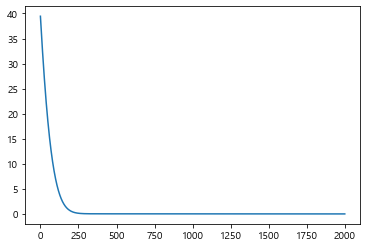

In [11]:
# 가중치를 알고 싶다
model.get_weights()#bias 까지 다 알려줌

result.history.keys()
# print(result.history['loss']) # 비용들만 따로 저장해 놓은 것
plt.plot(result.history['loss'])


In [12]:
# 예측값 확인 
model.predict([6])

array([[7.0806727]], dtype=float32)

In [13]:
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

##### 가설 준비(y = Wx + b)
hypot = W * x_train + b

##### 비용 함수
cost = tf.reduce_mean(tf.square(hypot-y_train))

##### 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
update = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# -------------------------- 그래프 완성 ---------------------------- #

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    _, c = sess.run([update, cost], feed_dict={x_train:[1, 2, 3, 4, 5,6,7], 
                                                          y_train:[25000, 55000, 75000, 110000, 128000, 155000, 180000]})
    if step % 100 ==0:
        print(step, c)
        
print(sess.run(hypot, feed_dict={x_train:[8]}))
sess.close()

0 13455837000.0
100 9834037.0
200 9188674.0
300 8889989.0
400 8751755.0
500 8687776.0
600 8658163.0
700 8644465.0
800 8638114.0
900 8635181.0
1000 8633826.0
1100 8633198.0
1200 8632905.0
1300 8632768.0
1400 8632707.0
1500 8632674.0
1600 8632659.0
1700 8632660.0
1800 8632654.0
1900 8632652.0
[206570.42]


Epoch 1/2000
7/7 [==============================] - 0s 12ms/step - loss: 13454924800.0000
Epoch 2/2000
7/7 [==============================] - 0s 164us/step - loss: 13362430976.0000
Epoch 3/2000
7/7 [==============================] - 0s 216us/step - loss: 13238648832.0000
Epoch 4/2000
7/7 [==============================] - 0s 174us/step - loss: 13115471872.0000
Epoch 5/2000
7/7 [==============================] - 0s 855us/step - loss: 12992907264.0000
Epoch 6/2000
7/7 [==============================] - 0s 441us/step - loss: 12870970368.0000
Epoch 7/2000
7/7 [==============================] - 0s 268us/step - loss: 12749666304.0000
Epoch 8/2000
7/7 [==============================] - 0s 345us/step - loss: 12629006336.0000
Epoch 9/2000
7/7 [==============================] - 0s 735us/step - loss: 12508998656.0000
Epoch 10/2000
7/7 [==============================] - 0s 201us/step - loss: 12389652480.0000
Epoch 11/2000
7/7 [==============================] - 0s 285us/step - loss: 12270973952.000

Epoch 91/2000
7/7 [==============================] - 0s 134us/step - loss: 5137260544.0000
Epoch 92/2000
7/7 [==============================] - 0s 434us/step - loss: 5075766272.0000
Epoch 93/2000
7/7 [==============================] - 0s 285us/step - loss: 5014863872.0000
Epoch 94/2000
7/7 [==============================] - 0s 284us/step - loss: 4954551296.0000
Epoch 95/2000
7/7 [==============================] - 0s 503us/step - loss: 4894823936.0000
Epoch 96/2000
7/7 [==============================] - 0s 269us/step - loss: 4835677696.0000
Epoch 97/2000
7/7 [==============================] - 0s 178us/step - loss: 4777110016.0000
Epoch 98/2000
7/7 [==============================] - 0s 404us/step - loss: 4718832640.0000
Epoch 99/2000
7/7 [==============================] - 0s 211us/step - loss: 4661134336.0000
Epoch 100/2000
7/7 [==============================] - 0s 230us/step - loss: 4604280320.0000
Epoch 101/2000
7/7 [==============================] - 0s 570us/step - loss: 4547990528.00

Epoch 181/2000
7/7 [==============================] - 0s 477us/step - loss: 1549221120.0000
Epoch 182/2000
7/7 [==============================] - 0s 284us/step - loss: 1526903552.0000
Epoch 183/2000
7/7 [==============================] - 0s 285us/step - loss: 1504873216.0000
Epoch 184/2000
7/7 [==============================] - 0s 287us/step - loss: 1483127168.0000
Epoch 185/2000
7/7 [==============================] - 0s 562us/step - loss: 1461610240.0000
Epoch 186/2000
7/7 [==============================] - 0s 379us/step - loss: 1440424832.0000
Epoch 187/2000
7/7 [==============================] - 0s 426us/step - loss: 1419515648.0000
Epoch 188/2000
7/7 [==============================] - 0s 518us/step - loss: 1398880000.0000
Epoch 189/2000
7/7 [==============================] - 0s 285us/step - loss: 1378514560.0000
Epoch 190/2000
7/7 [==============================] - 0s 227us/step - loss: 1358417024.0000
Epoch 191/2000
7/7 [==============================] - 0s 570us/step - loss: 1338

Epoch 271/2000
7/7 [==============================] - 0s 292us/step - loss: 399068384.0000
Epoch 272/2000
7/7 [==============================] - 0s 278us/step - loss: 393172000.0000
Epoch 273/2000
7/7 [==============================] - 0s 137us/step - loss: 387373312.0000
Epoch 274/2000
7/7 [==============================] - 0s 311us/step - loss: 381661472.0000
Epoch 275/2000
7/7 [==============================] - 0s 288us/step - loss: 376053472.0000
Epoch 276/2000
7/7 [==============================] - 0s 285us/step - loss: 370530528.0000
Epoch 277/2000
7/7 [==============================] - 0s 269us/step - loss: 365099680.0000
Epoch 278/2000
7/7 [==============================] - 0s 285us/step - loss: 359759968.0000
Epoch 279/2000
7/7 [==============================] - 0s 379us/step - loss: 354510144.0000
Epoch 280/2000
7/7 [==============================] - 0s 300us/step - loss: 349348416.0000
Epoch 281/2000
7/7 [==============================] - 0s 154us/step - loss: 344281856.0000

Epoch 362/2000
7/7 [==============================] - 0s 266us/step - loss: 129716864.0000
Epoch 363/2000
7/7 [==============================] - 0s 286us/step - loss: 128610736.0000
Epoch 364/2000
7/7 [==============================] - 0s 427us/step - loss: 127525320.0000
Epoch 365/2000
7/7 [==============================] - 0s 427us/step - loss: 126462168.0000
Epoch 366/2000
7/7 [==============================] - 0s 180us/step - loss: 125419072.0000
Epoch 367/2000
7/7 [==============================] - 0s 241us/step - loss: 124397584.0000
Epoch 368/2000
7/7 [==============================] - 0s 294us/step - loss: 123395008.0000
Epoch 369/2000
7/7 [==============================] - 0s 427us/step - loss: 122412464.0000
Epoch 370/2000
7/7 [==============================] - 0s 229us/step - loss: 121449216.0000
Epoch 371/2000
7/7 [==============================] - 0s 142us/step - loss: 120506072.0000
Epoch 372/2000
7/7 [==============================] - 0s 428us/step - loss: 119580552.0000

Epoch 453/2000
7/7 [==============================] - 0s 289us/step - loss: 82827312.0000
Epoch 454/2000
7/7 [==============================] - 0s 138us/step - loss: 82640128.0000
Epoch 455/2000
7/7 [==============================] - 0s 169us/step - loss: 82456016.0000
Epoch 456/2000
7/7 [==============================] - 0s 285us/step - loss: 82275016.0000
Epoch 457/2000
7/7 [==============================] - 0s 285us/step - loss: 82097192.0000
Epoch 458/2000
7/7 [==============================] - 0s 712us/step - loss: 81922368.0000
Epoch 459/2000
7/7 [==============================] - 0s 590us/step - loss: 81750424.0000
Epoch 460/2000
7/7 [==============================] - 0s 427us/step - loss: 81581232.0000
Epoch 461/2000
7/7 [==============================] - 0s 143us/step - loss: 81414904.0000
Epoch 462/2000
7/7 [==============================] - 0s 427us/step - loss: 81251352.0000
Epoch 463/2000
7/7 [==============================] - 0s 155us/step - loss: 81090424.0000
Epoch 464/

Epoch 545/2000
7/7 [==============================] - 0s 110us/step - loss: 72906168.0000
Epoch 546/2000
7/7 [==============================] - 0s 297us/step - loss: 72836808.0000
Epoch 547/2000
7/7 [==============================] - 0s 143us/step - loss: 72767832.0000
Epoch 548/2000
7/7 [==============================] - 0s 277us/step - loss: 72699144.0000
Epoch 549/2000
7/7 [==============================] - 0s 296us/step - loss: 72630680.0000
Epoch 550/2000
7/7 [==============================] - 0s 300us/step - loss: 72562480.0000
Epoch 551/2000
7/7 [==============================] - 0s 270us/step - loss: 72494568.0000
Epoch 552/2000
7/7 [==============================] - 0s 428us/step - loss: 72426936.0000
Epoch 553/2000
7/7 [==============================] - 0s 427us/step - loss: 72359472.0000
Epoch 554/2000
7/7 [==============================] - 0s 434us/step - loss: 72292384.0000
Epoch 555/2000
7/7 [==============================] - 0s 228us/step - loss: 72225376.0000
Epoch 556/

Epoch 637/2000
7/7 [==============================] - 0s 276us/step - loss: 67141168.0000
Epoch 638/2000
7/7 [==============================] - 0s 214us/step - loss: 67081372.0000
Epoch 639/2000
7/7 [==============================] - 0s 308us/step - loss: 67021500.0000
Epoch 640/2000
7/7 [==============================] - 0s 142us/step - loss: 66961644.0000
Epoch 641/2000
7/7 [==============================] - 0s 192us/step - loss: 66901844.0000
Epoch 642/2000
7/7 [==============================] - 0s 285us/step - loss: 66842052.0000
Epoch 643/2000
7/7 [==============================] - 0s 285us/step - loss: 66782220.0000
Epoch 644/2000
7/7 [==============================] - 0s 387us/step - loss: 66722504.0000
Epoch 645/2000
7/7 [==============================] - 0s 276us/step - loss: 66662744.0000
Epoch 646/2000
7/7 [==============================] - 0s 274us/step - loss: 66603008.0000
Epoch 647/2000
7/7 [==============================] - 0s 183us/step - loss: 66543288.0000
Epoch 648/

Epoch 729/2000
7/7 [==============================] - 0s 421us/step - loss: 61679112.0000
Epoch 730/2000
7/7 [==============================] - 0s 427us/step - loss: 61620140.0000
Epoch 731/2000
7/7 [==============================] - 0s 427us/step - loss: 61561192.0000
Epoch 732/2000
7/7 [==============================] - 0s 236us/step - loss: 61502272.0000
Epoch 733/2000
7/7 [==============================] - 0s 312us/step - loss: 61443328.0000
Epoch 734/2000
7/7 [==============================] - 0s 315us/step - loss: 61384392.0000
Epoch 735/2000
7/7 [==============================] - 0s 427us/step - loss: 61325468.0000
Epoch 736/2000
7/7 [==============================] - 0s 306us/step - loss: 61266548.0000
Epoch 737/2000
7/7 [==============================] - 0s 270us/step - loss: 61207640.0000
Epoch 738/2000
7/7 [==============================] - 0s 570us/step - loss: 61148712.0000
Epoch 739/2000
7/7 [==============================] - 0s 150us/step - loss: 61089856.0000
Epoch 740/

Epoch 821/2000
7/7 [==============================] - 0s 119us/step - loss: 56306112.0000
Epoch 822/2000
7/7 [==============================] - 0s 645us/step - loss: 56248404.0000
Epoch 823/2000
7/7 [==============================] - 0s 249us/step - loss: 56190784.0000
Epoch 824/2000
7/7 [==============================] - 0s 490us/step - loss: 56133112.0000
Epoch 825/2000
7/7 [==============================] - 0s 299us/step - loss: 56075460.0000
Epoch 826/2000
7/7 [==============================] - 0s 269us/step - loss: 56017900.0000
Epoch 827/2000
7/7 [==============================] - 0s 285us/step - loss: 55960296.0000
Epoch 828/2000
7/7 [==============================] - 0s 277us/step - loss: 55902728.0000
Epoch 829/2000
7/7 [==============================] - 0s 154us/step - loss: 55845152.0000
Epoch 830/2000
7/7 [==============================] - 0s 143us/step - loss: 55787620.0000
Epoch 831/2000
7/7 [==============================] - 0s 141us/step - loss: 55730084.0000
Epoch 832/

Epoch 913/2000
7/7 [==============================] - 0s 284us/step - loss: 51088148.0000
Epoch 914/2000
7/7 [==============================] - 0s 284us/step - loss: 51032520.0000
Epoch 915/2000
7/7 [==============================] - 0s 284us/step - loss: 50976932.0000
Epoch 916/2000
7/7 [==============================] - 0s 174us/step - loss: 50921380.0000
Epoch 917/2000
7/7 [==============================] - 0s 216us/step - loss: 50865876.0000
Epoch 918/2000
7/7 [==============================] - 0s 283us/step - loss: 50810356.0000
Epoch 919/2000
7/7 [==============================] - 0s 157us/step - loss: 50754852.0000
Epoch 920/2000
7/7 [==============================] - 0s 284us/step - loss: 50699384.0000
Epoch 921/2000
7/7 [==============================] - 0s 428us/step - loss: 50643996.0000
Epoch 922/2000
7/7 [==============================] - 0s 285us/step - loss: 50588608.0000
Epoch 923/2000
7/7 [==============================] - 0s 285us/step - loss: 50533240.0000
Epoch 924/

Epoch 1004/2000
7/7 [==============================] - 0s 212us/step - loss: 46145672.0000
Epoch 1005/2000
7/7 [==============================] - 0s 213us/step - loss: 46092748.0000
Epoch 1006/2000
7/7 [==============================] - 0s 142us/step - loss: 46039884.0000
Epoch 1007/2000
7/7 [==============================] - 0s 285us/step - loss: 45987072.0000
Epoch 1008/2000
7/7 [==============================] - 0s 504us/step - loss: 45934272.0000
Epoch 1009/2000
7/7 [==============================] - 0s 131us/step - loss: 45881500.0000
Epoch 1010/2000
7/7 [==============================] - 0s 382us/step - loss: 45828796.0000
Epoch 1011/2000
7/7 [==============================] - 0s 584us/step - loss: 45776124.0000
Epoch 1012/2000
7/7 [==============================] - 0s 282us/step - loss: 45723480.0000
Epoch 1013/2000
7/7 [==============================] - 0s 570us/step - loss: 45670824.0000
Epoch 1014/2000
7/7 [==============================] - 0s 209us/step - loss: 45618232.0000

Epoch 1095/2000
7/7 [==============================] - 0s 569us/step - loss: 41474628.0000
Epoch 1096/2000
7/7 [==============================] - 0s 286us/step - loss: 41424948.0000
Epoch 1097/2000
7/7 [==============================] - 0s 426us/step - loss: 41375352.0000
Epoch 1098/2000
7/7 [==============================] - 0s 382us/step - loss: 41325784.0000
Epoch 1099/2000
7/7 [==============================] - 0s 541us/step - loss: 41276260.0000
Epoch 1100/2000
7/7 [==============================] - 0s 429us/step - loss: 41226728.0000
Epoch 1101/2000
7/7 [==============================] - 0s 410us/step - loss: 41177260.0000
Epoch 1102/2000
7/7 [==============================] - 0s 287us/step - loss: 41127860.0000
Epoch 1103/2000
7/7 [==============================] - 0s 530us/step - loss: 41078464.0000
Epoch 1104/2000
7/7 [==============================] - 0s 528us/step - loss: 41029108.0000
Epoch 1105/2000
7/7 [==============================] - 0s 285us/step - loss: 40979780.0000

Epoch 1186/2000
7/7 [==============================] - 0s 553us/step - loss: 37115796.0000
Epoch 1187/2000
7/7 [==============================] - 0s 1ms/step - loss: 37069748.0000
Epoch 1188/2000
7/7 [==============================] - 0s 152us/step - loss: 37023772.0000
Epoch 1189/2000
7/7 [==============================] - 0s 379us/step - loss: 36977820.0000
Epoch 1190/2000
7/7 [==============================] - 0s 285us/step - loss: 36931892.0000
Epoch 1191/2000
7/7 [==============================] - 0s 458us/step - loss: 36886020.0000
Epoch 1192/2000
7/7 [==============================] - 0s 226us/step - loss: 36840156.0000
Epoch 1193/2000
7/7 [==============================] - 0s 286us/step - loss: 36794392.0000
Epoch 1194/2000
7/7 [==============================] - 0s 392us/step - loss: 36748628.0000
Epoch 1195/2000
7/7 [==============================] - 0s 566us/step - loss: 36702920.0000
Epoch 1196/2000
7/7 [==============================] - 0s 394us/step - loss: 36657252.0000
E

Epoch 1277/2000
7/7 [==============================] - 0s 422us/step - loss: 33098288.0000
Epoch 1278/2000
7/7 [==============================] - 0s 286us/step - loss: 33056112.0000
Epoch 1279/2000
7/7 [==============================] - 0s 281us/step - loss: 33013974.0000
Epoch 1280/2000
7/7 [==============================] - 0s 507us/step - loss: 32971914.0000
Epoch 1281/2000
7/7 [==============================] - 0s 502us/step - loss: 32929888.0000
Epoch 1282/2000
7/7 [==============================] - 0s 285us/step - loss: 32887866.0000
Epoch 1283/2000
7/7 [==============================] - 0s 320us/step - loss: 32845930.0000
Epoch 1284/2000
7/7 [==============================] - 0s 519us/step - loss: 32804014.0000
Epoch 1285/2000
7/7 [==============================] - 0s 483us/step - loss: 32762128.0000
Epoch 1286/2000
7/7 [==============================] - 0s 241us/step - loss: 32720294.0000
Epoch 1287/2000
7/7 [==============================] - 0s 278us/step - loss: 32678542.0000

Epoch 1368/2000
7/7 [==============================] - 0s 282us/step - loss: 29440046.0000
Epoch 1369/2000
7/7 [==============================] - 0s 274us/step - loss: 29401890.0000
Epoch 1370/2000
7/7 [==============================] - 0s 284us/step - loss: 29363732.0000
Epoch 1371/2000
7/7 [==============================] - 0s 300us/step - loss: 29325696.0000
Epoch 1372/2000
7/7 [==============================] - 0s 142us/step - loss: 29287654.0000
Epoch 1373/2000
7/7 [==============================] - 0s 287us/step - loss: 29249660.0000
Epoch 1374/2000
7/7 [==============================] - 0s 330us/step - loss: 29211702.0000
Epoch 1375/2000
7/7 [==============================] - 0s 122us/step - loss: 29173810.0000
Epoch 1376/2000
7/7 [==============================] - 0s 359us/step - loss: 29135946.0000
Epoch 1377/2000
7/7 [==============================] - 0s 329us/step - loss: 29098154.0000
Epoch 1378/2000
7/7 [==============================] - 0s 202us/step - loss: 29060368.0000

Epoch 1459/2000
7/7 [==============================] - 0s 172us/step - loss: 26148878.0000
Epoch 1460/2000
7/7 [==============================] - 0s 572us/step - loss: 26114740.0000
Epoch 1461/2000
7/7 [==============================] - 0s 146us/step - loss: 26080684.0000
Epoch 1462/2000
7/7 [==============================] - 0s 313us/step - loss: 26046606.0000
Epoch 1463/2000
7/7 [==============================] - 0s 180us/step - loss: 26012634.0000
Epoch 1464/2000
7/7 [==============================] - 0s 102us/step - loss: 25978692.0000
Epoch 1465/2000
7/7 [==============================] - 0s 251us/step - loss: 25944786.0000
Epoch 1466/2000
7/7 [==============================] - 0s 162us/step - loss: 25910910.0000
Epoch 1467/2000
7/7 [==============================] - 0s 143us/step - loss: 25877098.0000
Epoch 1468/2000
7/7 [==============================] - 0s 305us/step - loss: 25843326.0000
Epoch 1469/2000
7/7 [==============================] - 0s 258us/step - loss: 25809604.0000

Epoch 1550/2000
7/7 [==============================] - 0s 444us/step - loss: 23223542.0000
Epoch 1551/2000
7/7 [==============================] - 0s 569us/step - loss: 23193374.0000
Epoch 1552/2000
7/7 [==============================] - 0s 499us/step - loss: 23163270.0000
Epoch 1553/2000
7/7 [==============================] - 0s 389us/step - loss: 23133230.0000
Epoch 1554/2000
7/7 [==============================] - 0s 438us/step - loss: 23103210.0000
Epoch 1555/2000
7/7 [==============================] - 0s 274us/step - loss: 23073252.0000
Epoch 1556/2000
7/7 [==============================] - 0s 142us/step - loss: 23043298.0000
Epoch 1557/2000
7/7 [==============================] - 0s 201us/step - loss: 23013430.0000
Epoch 1558/2000
7/7 [==============================] - 0s 304us/step - loss: 22983594.0000
Epoch 1559/2000
7/7 [==============================] - 0s 285us/step - loss: 22953826.0000
Epoch 1560/2000
7/7 [==============================] - 0s 435us/step - loss: 22924032.0000

Epoch 1641/2000
7/7 [==============================] - 0s 128us/step - loss: 20654850.0000
Epoch 1642/2000
7/7 [==============================] - 0s 315us/step - loss: 20628546.0000
Epoch 1643/2000
7/7 [==============================] - 0s 427us/step - loss: 20602290.0000
Epoch 1644/2000
7/7 [==============================] - 0s 266us/step - loss: 20576066.0000
Epoch 1645/2000
7/7 [==============================] - 0s 287us/step - loss: 20549910.0000
Epoch 1646/2000
7/7 [==============================] - 0s 428us/step - loss: 20523776.0000
Epoch 1647/2000
7/7 [==============================] - 0s 142us/step - loss: 20497686.0000
Epoch 1648/2000
7/7 [==============================] - 0s 150us/step - loss: 20471630.0000
Epoch 1649/2000
7/7 [==============================] - 0s 285us/step - loss: 20445620.0000
Epoch 1650/2000
7/7 [==============================] - 0s 302us/step - loss: 20419654.0000
Epoch 1651/2000
7/7 [==============================] - 0s 428us/step - loss: 20393710.0000

7/7 [==============================] - 0s 412us/step - loss: 18449750.0000
Epoch 1732/2000
7/7 [==============================] - 0s 318us/step - loss: 18427052.0000
Epoch 1733/2000
7/7 [==============================] - 0s 191us/step - loss: 18404400.0000
Epoch 1734/2000
7/7 [==============================] - 0s 427us/step - loss: 18381774.0000
Epoch 1735/2000
7/7 [==============================] - 0s 285us/step - loss: 18359166.0000
Epoch 1736/2000
7/7 [==============================] - 0s 142us/step - loss: 18336626.0000
Epoch 1737/2000
7/7 [==============================] - 0s 89us/step - loss: 18314140.0000
Epoch 1738/2000
7/7 [==============================] - 0s 452us/step - loss: 18291668.0000
Epoch 1739/2000
7/7 [==============================] - 0s 253us/step - loss: 18269228.0000
Epoch 1740/2000
7/7 [==============================] - 0s 157us/step - loss: 18246838.0000
Epoch 1741/2000
7/7 [==============================] - 0s 138us/step - loss: 18224476.0000
Epoch 1742/2000


Epoch 1822/2000
7/7 [==============================] - 0s 156us/step - loss: 16538385.0000
Epoch 1823/2000
7/7 [==============================] - 0s 271us/step - loss: 16519066.0000
Epoch 1824/2000
7/7 [==============================] - 0s 339us/step - loss: 16499801.0000
Epoch 1825/2000
7/7 [==============================] - 0s 238us/step - loss: 16480547.0000
Epoch 1826/2000
7/7 [==============================] - 0s 285us/step - loss: 16461335.0000
Epoch 1827/2000
7/7 [==============================] - 0s 222us/step - loss: 16442173.0000
Epoch 1828/2000
7/7 [==============================] - 0s 162us/step - loss: 16423040.0000
Epoch 1829/2000
7/7 [==============================] - 0s 427us/step - loss: 16403934.0000
Epoch 1830/2000
7/7 [==============================] - 0s 178us/step - loss: 16384874.0000
Epoch 1831/2000
7/7 [==============================] - 0s 439us/step - loss: 16365831.0000
Epoch 1832/2000
7/7 [==============================] - 0s 184us/step - loss: 16346834.0000

Epoch 1913/2000
7/7 [==============================] - 0s 282us/step - loss: 14922149.0000
Epoch 1914/2000
7/7 [==============================] - 0s 131us/step - loss: 14905937.0000
Epoch 1915/2000
7/7 [==============================] - 0s 260us/step - loss: 14889746.0000
Epoch 1916/2000
7/7 [==============================] - 0s 644us/step - loss: 14873575.0000
Epoch 1917/2000
7/7 [==============================] - 0s 254us/step - loss: 14857464.0000
Epoch 1918/2000
7/7 [==============================] - 0s 471us/step - loss: 14841371.0000
Epoch 1919/2000
7/7 [==============================] - 0s 236us/step - loss: 14825314.0000
Epoch 1920/2000
7/7 [==============================] - 0s 151us/step - loss: 14809280.0000
Epoch 1921/2000
7/7 [==============================] - 0s 320us/step - loss: 14793275.0000
Epoch 1922/2000
7/7 [==============================] - 0s 284us/step - loss: 14777319.0000
Epoch 1923/2000
7/7 [==============================] - 0s 268us/step - loss: 14761375.0000

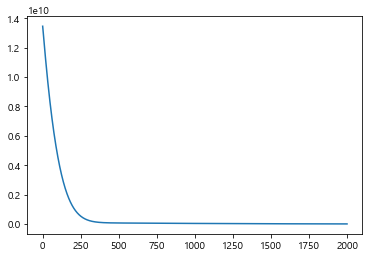

In [19]:
x_train=[1, 2, 3, 4, 5,6,7]
y_train=[25000, 55000, 75000, 110000, 128000, 155000, 180000]

model=Sequential()

# layer, 즉 히든계층을 만들겠다.
model.add(Dense(units=1,input_shape=(1,))) 
model.compile(loss='mse',optimizer=Adam(lr=100))#비용 어떻게 구하고 최저비용을 어떻게 구하는지

result=model.fit(x_train,y_train,epochs=2000)
plt.plot(result.history['loss'])

In [22]:
print('예측값 :',model.predict([8]))
model.summary()

예측값 : [[203239.62]]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 2) 다중 선형 회귀

In [24]:
x_data = [[73., 80., 75.], 
          [93., 88., 93.],
         [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

X = tf.placeholder(tf.float32,shape = [None,3]) # 데이터 갯수는 몇개가 될지 모르니 None이라 하자 
y = tf.placeholder(tf.float32,shape = [None,1])

##### 가설 설정 : y = W1*X1+W2*X2+W3*X3+b
W = tf.Variable(tf.random_normal([3,1])) # 초기값이 정규분포를 이루는 랜덤값
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X,W)+b

##### 비용계산 --> 선형회귀니까 평균제곱 오차 MSE
cost=tf.reduce_mean(tf.square(hypot-y))

##### 최소비용계산 
train=tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train=train.minimize(cost)

sess =tf.Session()
sess.run(tf.global_variables_initializer())

# 훈련횟수
for step in range(10000):
    _,c,h=sess.run([train,cost,hypot],feed_dict={X:x_data,y:y_data})
    if step % 500 ==0:
           print(step, c,h)
    

0 52762.46 [[-49.474705]
 [-62.068935]
 [-59.59401 ]
 [-67.82503 ]
 [-45.532   ]]
500 2.4344857 [[154.07637]
 [183.06735]
 [181.68982]
 [194.97917]
 [141.52208]]
1000 2.0806563 [[153.85068]
 [183.21986]
 [181.6178 ]
 [194.94914]
 [141.70366]]
1500 1.8063755 [[153.65236]
 [183.35353]
 [181.55418]
 [194.9249 ]
 [141.86075]]
2000 1.5928535 [[153.47809]
 [183.47089]
 [181.49803]
 [194.90582]
 [141.99658]]
2500 1.4258096 [[153.32475]
 [183.57384]
 [181.44827]
 [194.89108]
 [142.11378]]
3000 1.2942493 [[153.18973]
 [183.66432]
 [181.40419]
 [194.88023]
 [142.21478]]
3500 1.1899211 [[153.0707 ]
 [183.74379]
 [181.36502]
 [194.87265]
 [142.30159]]
4000 1.106419 [[152.96567]
 [183.8137 ]
 [181.33018]
 [194.86798]
 [142.37607]]
4500 1.0388839 [[152.87286]
 [183.8753 ]
 [181.29912]
 [194.86577]
 [142.43977]]
5000 0.98364115 [[152.79076]
 [183.92953]
 [181.27133]
 [194.86572]
 [142.49411]]
5500 0.9378568 [[152.718  ]
 [183.97742]
 [181.24649]
 [194.86754]
 [142.54025]]
6000 0.89936095 [[152.65343]

Epoch 1/2000
5/5 [==============================] - 0s 20ms/step - loss: 42755.3047
Epoch 2/2000
5/5 [==============================] - 0s 390us/step - loss: 42755.3008
Epoch 3/2000
5/5 [==============================] - 0s 399us/step - loss: 42755.2852
Epoch 4/2000
5/5 [==============================] - 0s 337us/step - loss: 42755.2773
Epoch 5/2000
5/5 [==============================] - 0s 226us/step - loss: 42755.2695
Epoch 6/2000
5/5 [==============================] - 0s 598us/step - loss: 42755.2578
Epoch 7/2000
5/5 [==============================] - 0s 798us/step - loss: 42755.2422
Epoch 8/2000
5/5 [==============================] - 0s 358us/step - loss: 42755.2344
Epoch 9/2000
5/5 [==============================] - 0s 399us/step - loss: 42755.2266
Epoch 10/2000
5/5 [==============================] - 0s 398us/step - loss: 42755.2148
Epoch 11/2000
5/5 [==============================] - 0s 402us/step - loss: 42755.2031
Epoch 12/2000
5/5 [==============================] - 0s 399us/st

Epoch 97/2000
5/5 [==============================] - 0s 329us/step - loss: 42754.2578
Epoch 98/2000
5/5 [==============================] - 0s 229us/step - loss: 42754.2461
Epoch 99/2000
5/5 [==============================] - 0s 399us/step - loss: 42754.2383
Epoch 100/2000
5/5 [==============================] - 0s 330us/step - loss: 42754.2266
Epoch 101/2000
5/5 [==============================] - 0s 249us/step - loss: 42754.2109
Epoch 102/2000
5/5 [==============================] - 0s 798us/step - loss: 42754.1992
Epoch 103/2000
5/5 [==============================] - 0s 513us/step - loss: 42754.1953
Epoch 104/2000
5/5 [==============================] - 0s 330us/step - loss: 42754.1797
Epoch 105/2000
5/5 [==============================] - 0s 504us/step - loss: 42754.1680
Epoch 106/2000
5/5 [==============================] - 0s 900us/step - loss: 42754.1602
Epoch 107/2000
5/5 [==============================] - 0s 261us/step - loss: 42754.1484
Epoch 108/2000
5/5 [==========================

Epoch 192/2000
5/5 [==============================] - 0s 400us/step - loss: 42753.2109
Epoch 193/2000
5/5 [==============================] - 0s 200us/step - loss: 42753.1992
Epoch 194/2000
5/5 [==============================] - 0s 337us/step - loss: 42753.1875
Epoch 195/2000
5/5 [==============================] - 0s 564us/step - loss: 42753.1797
Epoch 196/2000
5/5 [==============================] - 0s 399us/step - loss: 42753.1680
Epoch 197/2000
5/5 [==============================] - 0s 398us/step - loss: 42753.1641
Epoch 198/2000
5/5 [==============================] - 0s 400us/step - loss: 42753.1445
Epoch 199/2000
5/5 [==============================] - 0s 403us/step - loss: 42753.1367
Epoch 200/2000
5/5 [==============================] - 0s 589us/step - loss: 42753.1289
Epoch 201/2000
5/5 [==============================] - 0s 394us/step - loss: 42753.1172
Epoch 202/2000
5/5 [==============================] - 0s 399us/step - loss: 42753.1055
Epoch 203/2000
5/5 [=======================

Epoch 287/2000
5/5 [==============================] - 0s 395us/step - loss: 42752.1680
Epoch 288/2000
5/5 [==============================] - 0s 207us/step - loss: 42752.1602
Epoch 289/2000
5/5 [==============================] - 0s 548us/step - loss: 42752.1484
Epoch 290/2000
5/5 [==============================] - 0s 454us/step - loss: 42752.1367
Epoch 291/2000
5/5 [==============================] - 0s 764us/step - loss: 42752.1289
Epoch 292/2000
5/5 [==============================] - 0s 344us/step - loss: 42752.1172
Epoch 293/2000
5/5 [==============================] - 0s 408us/step - loss: 42752.1055
Epoch 294/2000
5/5 [==============================] - 0s 789us/step - loss: 42752.0977
Epoch 295/2000
5/5 [==============================] - 0s 370us/step - loss: 42752.0820
Epoch 296/2000
5/5 [==============================] - 0s 280us/step - loss: 42752.0703
Epoch 297/2000
5/5 [==============================] - 0s 399us/step - loss: 42752.0586
Epoch 298/2000
5/5 [=======================

Epoch 382/2000
5/5 [==============================] - 0s 743us/step - loss: 42751.1250
Epoch 383/2000
5/5 [==============================] - 0s 213us/step - loss: 42751.1172
Epoch 384/2000
5/5 [==============================] - 0s 307us/step - loss: 42751.1055
Epoch 385/2000
5/5 [==============================] - 0s 702us/step - loss: 42751.1016
Epoch 386/2000
5/5 [==============================] - 0s 1ms/step - loss: 42751.0859
Epoch 387/2000
5/5 [==============================] - 0s 608us/step - loss: 42751.0703
Epoch 388/2000
5/5 [==============================] - 0s 263us/step - loss: 42751.0625
Epoch 389/2000
5/5 [==============================] - 0s 200us/step - loss: 42751.0508
Epoch 390/2000
5/5 [==============================] - 0s 301us/step - loss: 42751.0391
Epoch 391/2000
5/5 [==============================] - 0s 399us/step - loss: 42751.0273
Epoch 392/2000
5/5 [==============================] - 0s 200us/step - loss: 42751.0234
Epoch 393/2000
5/5 [=========================

Epoch 477/2000
5/5 [==============================] - 0s 206us/step - loss: 42750.0859
Epoch 478/2000
5/5 [==============================] - 0s 399us/step - loss: 42750.0742
Epoch 479/2000
5/5 [==============================] - 0s 399us/step - loss: 42750.0664
Epoch 480/2000
5/5 [==============================] - 0s 255us/step - loss: 42750.0508
Epoch 481/2000
5/5 [==============================] - 0s 358us/step - loss: 42750.0391
Epoch 482/2000
5/5 [==============================] - 0s 382us/step - loss: 42750.0312
Epoch 483/2000
5/5 [==============================] - 0s 599us/step - loss: 42750.0195
Epoch 484/2000
5/5 [==============================] - 0s 399us/step - loss: 42750.0078
Epoch 485/2000
5/5 [==============================] - 0s 600us/step - loss: 42749.9922
Epoch 486/2000
5/5 [==============================] - 0s 361us/step - loss: 42749.9922
Epoch 487/2000
5/5 [==============================] - 0s 387us/step - loss: 42749.9766
Epoch 488/2000
5/5 [=======================

Epoch 572/2000
5/5 [==============================] - 0s 285us/step - loss: 42749.0430
Epoch 573/2000
5/5 [==============================] - 0s 284us/step - loss: 42749.0352
Epoch 574/2000
5/5 [==============================] - 0s 530us/step - loss: 42749.0195
Epoch 575/2000
5/5 [==============================] - 0s 399us/step - loss: 42749.0078
Epoch 576/2000
5/5 [==============================] - 0s 202us/step - loss: 42748.9961
Epoch 577/2000
5/5 [==============================] - 0s 382us/step - loss: 42748.9883
Epoch 578/2000
5/5 [==============================] - 0s 113us/step - loss: 42748.9805
Epoch 579/2000
5/5 [==============================] - 0s 997us/step - loss: 42748.9648
Epoch 580/2000
5/5 [==============================] - 0s 387us/step - loss: 42748.9570
Epoch 581/2000
5/5 [==============================] - 0s 216us/step - loss: 42748.9453
Epoch 582/2000
5/5 [==============================] - 0s 347us/step - loss: 42748.9297
Epoch 583/2000
5/5 [=======================

Epoch 667/2000
5/5 [==============================] - 0s 598us/step - loss: 42748.0000
Epoch 668/2000
5/5 [==============================] - 0s 170us/step - loss: 42747.9883
Epoch 669/2000
5/5 [==============================] - 0s 331us/step - loss: 42747.9766
Epoch 670/2000
5/5 [==============================] - 0s 296us/step - loss: 42747.9688
Epoch 671/2000
5/5 [==============================] - 0s 309us/step - loss: 42747.9570
Epoch 672/2000
5/5 [==============================] - 0s 304us/step - loss: 42747.9453
Epoch 673/2000
5/5 [==============================] - 0s 561us/step - loss: 42747.9297
Epoch 674/2000
5/5 [==============================] - 0s 149us/step - loss: 42747.9258
Epoch 675/2000
5/5 [==============================] - 0s 398us/step - loss: 42747.9141
Epoch 676/2000
5/5 [==============================] - 0s 703us/step - loss: 42747.9023
Epoch 677/2000
5/5 [==============================] - 0s 399us/step - loss: 42747.8906
Epoch 678/2000
5/5 [=======================

5/5 [==============================] - 0s 598us/step - loss: 42746.9648
Epoch 762/2000
5/5 [==============================] - 0s 201us/step - loss: 42746.9570
Epoch 763/2000
5/5 [==============================] - 0s 399us/step - loss: 42746.9453
Epoch 764/2000
5/5 [==============================] - 0s 399us/step - loss: 42746.9375
Epoch 765/2000
5/5 [==============================] - 0s 237us/step - loss: 42746.9258
Epoch 766/2000
5/5 [==============================] - 0s 848us/step - loss: 42746.9141
Epoch 767/2000
5/5 [==============================] - 0s 401us/step - loss: 42746.9023
Epoch 768/2000
5/5 [==============================] - 0s 599us/step - loss: 42746.8906
Epoch 769/2000
5/5 [==============================] - 0s 399us/step - loss: 42746.8828
Epoch 770/2000
5/5 [==============================] - 0s 399us/step - loss: 42746.8711
Epoch 771/2000
5/5 [==============================] - 0s 485us/step - loss: 42746.8594
Epoch 772/2000
5/5 [==============================] - 0s 3

Epoch 856/2000
5/5 [==============================] - 0s 358us/step - loss: 42745.9297
Epoch 857/2000
5/5 [==============================] - 0s 426us/step - loss: 42745.9141
Epoch 858/2000
5/5 [==============================] - 0s 268us/step - loss: 42745.9062
Epoch 859/2000
5/5 [==============================] - 0s 603us/step - loss: 42745.8906
Epoch 860/2000
5/5 [==============================] - 0s 206us/step - loss: 42745.8867
Epoch 861/2000
5/5 [==============================] - 0s 269us/step - loss: 42745.8711
Epoch 862/2000
5/5 [==============================] - 0s 346us/step - loss: 42745.8633
Epoch 863/2000
5/5 [==============================] - 0s 304us/step - loss: 42745.8516
Epoch 864/2000
5/5 [==============================] - 0s 343us/step - loss: 42745.8359
Epoch 865/2000
5/5 [==============================] - 0s 598us/step - loss: 42745.8242
Epoch 866/2000
5/5 [==============================] - 0s 399us/step - loss: 42745.8164
Epoch 867/2000
5/5 [=======================

Epoch 951/2000
5/5 [==============================] - 0s 199us/step - loss: 42744.8828
Epoch 952/2000
5/5 [==============================] - 0s 232us/step - loss: 42744.8750
Epoch 953/2000
5/5 [==============================] - 0s 191us/step - loss: 42744.8633
Epoch 954/2000
5/5 [==============================] - 0s 244us/step - loss: 42744.8516
Epoch 955/2000
5/5 [==============================] - 0s 667us/step - loss: 42744.8398
Epoch 956/2000
5/5 [==============================] - 0s 399us/step - loss: 42744.8242
Epoch 957/2000
5/5 [==============================] - 0s 400us/step - loss: 42744.8203
Epoch 958/2000
5/5 [==============================] - 0s 598us/step - loss: 42744.8047
Epoch 959/2000
5/5 [==============================] - 0s 336us/step - loss: 42744.8008
Epoch 960/2000
5/5 [==============================] - 0s 323us/step - loss: 42744.7852
Epoch 961/2000
5/5 [==============================] - 0s 407us/step - loss: 42744.7734
Epoch 962/2000
5/5 [=======================

Epoch 1045/2000
5/5 [==============================] - 0s 400us/step - loss: 42743.8516
Epoch 1046/2000
5/5 [==============================] - 0s 169us/step - loss: 42743.8438
Epoch 1047/2000
5/5 [==============================] - 0s 803us/step - loss: 42743.8320
Epoch 1048/2000
5/5 [==============================] - 0s 793us/step - loss: 42743.8203
Epoch 1049/2000
5/5 [==============================] - 0s 302us/step - loss: 42743.8047
Epoch 1050/2000
5/5 [==============================] - 0s 704us/step - loss: 42743.8008
Epoch 1051/2000
5/5 [==============================] - 0s 404us/step - loss: 42743.7852
Epoch 1052/2000
5/5 [==============================] - 0s 201us/step - loss: 42743.7734
Epoch 1053/2000
5/5 [==============================] - 0s 262us/step - loss: 42743.7617
Epoch 1054/2000
5/5 [==============================] - 0s 195us/step - loss: 42743.7578
Epoch 1055/2000
5/5 [==============================] - 0s 399us/step - loss: 42743.7422
Epoch 1056/2000
5/5 [===========

Epoch 1139/2000
5/5 [==============================] - 0s 1ms/step - loss: 42742.8203
Epoch 1140/2000
5/5 [==============================] - 0s 2ms/step - loss: 42742.8086
Epoch 1141/2000
5/5 [==============================] - 0s 806us/step - loss: 42742.8008
Epoch 1142/2000
5/5 [==============================] - 0s 810us/step - loss: 42742.7891
Epoch 1143/2000
5/5 [==============================] - 0s 200us/step - loss: 42742.7734
Epoch 1144/2000
5/5 [==============================] - 0s 501us/step - loss: 42742.7656
Epoch 1145/2000
5/5 [==============================] - 0s 157us/step - loss: 42742.7578
Epoch 1146/2000
5/5 [==============================] - 0s 351us/step - loss: 42742.7422
Epoch 1147/2000
5/5 [==============================] - 0s 396us/step - loss: 42742.7344
Epoch 1148/2000
5/5 [==============================] - 0s 399us/step - loss: 42742.7227
Epoch 1149/2000
5/5 [==============================] - 0s 648us/step - loss: 42742.7109
Epoch 1150/2000
5/5 [===============

Epoch 1233/2000
5/5 [==============================] - 0s 541us/step - loss: 42741.7891
Epoch 1234/2000
5/5 [==============================] - 0s 223us/step - loss: 42741.7812
Epoch 1235/2000
5/5 [==============================] - 0s 293us/step - loss: 42741.7695
Epoch 1236/2000
5/5 [==============================] - 0s 391us/step - loss: 42741.7539
Epoch 1237/2000
5/5 [==============================] - 0s 272us/step - loss: 42741.7461
Epoch 1238/2000
5/5 [==============================] - 0s 410us/step - loss: 42741.7344
Epoch 1239/2000
5/5 [==============================] - 0s 399us/step - loss: 42741.7227
Epoch 1240/2000
5/5 [==============================] - 0s 103us/step - loss: 42741.7109
Epoch 1241/2000
5/5 [==============================] - 0s 282us/step - loss: 42741.6992
Epoch 1242/2000
5/5 [==============================] - 0s 451us/step - loss: 42741.6875
Epoch 1243/2000
5/5 [==============================] - 0s 266us/step - loss: 42741.6797
Epoch 1244/2000
5/5 [===========

Epoch 1327/2000
5/5 [==============================] - 0s 601us/step - loss: 42740.7539
Epoch 1328/2000
5/5 [==============================] - 0s 405us/step - loss: 42740.7461
Epoch 1329/2000
5/5 [==============================] - 0s 596us/step - loss: 42740.7305
Epoch 1330/2000
5/5 [==============================] - 0s 445us/step - loss: 42740.7266
Epoch 1331/2000
5/5 [==============================] - 0s 198us/step - loss: 42740.7109
Epoch 1332/2000
5/5 [==============================] - 0s 399us/step - loss: 42740.6992
Epoch 1333/2000
5/5 [==============================] - 0s 196us/step - loss: 42740.6953
Epoch 1334/2000
5/5 [==============================] - 0s 358us/step - loss: 42740.6797
Epoch 1335/2000
5/5 [==============================] - 0s 396us/step - loss: 42740.6680
Epoch 1336/2000
5/5 [==============================] - 0s 399us/step - loss: 42740.6602
Epoch 1337/2000
5/5 [==============================] - 0s 161us/step - loss: 42740.6445
Epoch 1338/2000
5/5 [===========

Epoch 1421/2000
5/5 [==============================] - 0s 488us/step - loss: 42739.7266
Epoch 1422/2000
5/5 [==============================] - 0s 175us/step - loss: 42739.7148
Epoch 1423/2000
5/5 [==============================] - 0s 399us/step - loss: 42739.7070
Epoch 1424/2000
5/5 [==============================] - 0s 399us/step - loss: 42739.6953
Epoch 1425/2000
5/5 [==============================] - 0s 199us/step - loss: 42739.6797
Epoch 1426/2000
5/5 [==============================] - 0s 600us/step - loss: 42739.6758
Epoch 1427/2000
5/5 [==============================] - 0s 400us/step - loss: 42739.6641
Epoch 1428/2000
5/5 [==============================] - 0s 200us/step - loss: 42739.6484
Epoch 1429/2000
5/5 [==============================] - 0s 349us/step - loss: 42739.6367
Epoch 1430/2000
5/5 [==============================] - 0s 232us/step - loss: 42739.6289
Epoch 1431/2000
5/5 [==============================] - 0s 113us/step - loss: 42739.6172
Epoch 1432/2000
5/5 [===========

Epoch 1515/2000
5/5 [==============================] - 0s 199us/step - loss: 42738.6953
Epoch 1516/2000
5/5 [==============================] - 0s 598us/step - loss: 42738.6797
Epoch 1517/2000
5/5 [==============================] - 0s 200us/step - loss: 42738.6719
Epoch 1518/2000
5/5 [==============================] - 0s 198us/step - loss: 42738.6602
Epoch 1519/2000
5/5 [==============================] - 0s 221us/step - loss: 42738.6523
Epoch 1520/2000
5/5 [==============================] - 0s 354us/step - loss: 42738.6406
Epoch 1521/2000
5/5 [==============================] - 0s 194us/step - loss: 42738.6328
Epoch 1522/2000
5/5 [==============================] - 0s 652us/step - loss: 42738.6172
Epoch 1523/2000
5/5 [==============================] - 0s 200us/step - loss: 42738.6055
Epoch 1524/2000
5/5 [==============================] - 0s 389us/step - loss: 42738.5938
Epoch 1525/2000
5/5 [==============================] - 0s 400us/step - loss: 42738.5859
Epoch 1526/2000
5/5 [===========

5/5 [==============================] - 0s 605us/step - loss: 42737.6758
Epoch 1609/2000
5/5 [==============================] - 0s 303us/step - loss: 42737.6641
Epoch 1610/2000
5/5 [==============================] - 0s 175us/step - loss: 42737.6523
Epoch 1611/2000
5/5 [==============================] - 0s 595us/step - loss: 42737.6445
Epoch 1612/2000
5/5 [==============================] - 0s 399us/step - loss: 42737.6328
Epoch 1613/2000
5/5 [==============================] - 0s 557us/step - loss: 42737.6172
Epoch 1614/2000
5/5 [==============================] - 0s 449us/step - loss: 42737.6094
Epoch 1615/2000
5/5 [==============================] - 0s 398us/step - loss: 42737.6016
Epoch 1616/2000
5/5 [==============================] - 0s 344us/step - loss: 42737.5859
Epoch 1617/2000
5/5 [==============================] - 0s 407us/step - loss: 42737.5703
Epoch 1618/2000
5/5 [==============================] - 0s 227us/step - loss: 42737.5664
Epoch 1619/2000
5/5 [===========================

Epoch 1702/2000
5/5 [==============================] - 0s 259us/step - loss: 42736.6406
Epoch 1703/2000
5/5 [==============================] - 0s 229us/step - loss: 42736.6289
Epoch 1704/2000
5/5 [==============================] - 0s 200us/step - loss: 42736.6172
Epoch 1705/2000
5/5 [==============================] - 0s 310us/step - loss: 42736.6094
Epoch 1706/2000
5/5 [==============================] - 0s 459us/step - loss: 42736.5977
Epoch 1707/2000
5/5 [==============================] - 0s 207us/step - loss: 42736.5859
Epoch 1708/2000
5/5 [==============================] - 0s 512us/step - loss: 42736.5781
Epoch 1709/2000
5/5 [==============================] - 0s 173us/step - loss: 42736.5664
Epoch 1710/2000
5/5 [==============================] - 0s 243us/step - loss: 42736.5547
Epoch 1711/2000
5/5 [==============================] - 0s 398us/step - loss: 42736.5391
Epoch 1712/2000
5/5 [==============================] - 0s 389us/step - loss: 42736.5312
Epoch 1713/2000
5/5 [===========

Epoch 1796/2000
5/5 [==============================] - 0s 234us/step - loss: 42735.6133
Epoch 1797/2000
5/5 [==============================] - 0s 409us/step - loss: 42735.6016
Epoch 1798/2000
5/5 [==============================] - 0s 388us/step - loss: 42735.5898
Epoch 1799/2000
5/5 [==============================] - 0s 416us/step - loss: 42735.5781
Epoch 1800/2000
5/5 [==============================] - 0s 320us/step - loss: 42735.5664
Epoch 1801/2000
5/5 [==============================] - 0s 266us/step - loss: 42735.5547
Epoch 1802/2000
5/5 [==============================] - 0s 345us/step - loss: 42735.5469
Epoch 1803/2000
5/5 [==============================] - 0s 237us/step - loss: 42735.5352
Epoch 1804/2000
5/5 [==============================] - 0s 393us/step - loss: 42735.5234
Epoch 1805/2000
5/5 [==============================] - 0s 399us/step - loss: 42735.5117
Epoch 1806/2000
5/5 [==============================] - 0s 315us/step - loss: 42735.5000
Epoch 1807/2000
5/5 [===========

Epoch 1890/2000
5/5 [==============================] - 0s 418us/step - loss: 42734.5781
Epoch 1891/2000
5/5 [==============================] - 0s 759us/step - loss: 42734.5703
Epoch 1892/2000
5/5 [==============================] - 0s 402us/step - loss: 42734.5547
Epoch 1893/2000
5/5 [==============================] - 0s 424us/step - loss: 42734.5469
Epoch 1894/2000
5/5 [==============================] - 0s 398us/step - loss: 42734.5312
Epoch 1895/2000
5/5 [==============================] - 0s 182us/step - loss: 42734.5234
Epoch 1896/2000
5/5 [==============================] - 0s 199us/step - loss: 42734.5117
Epoch 1897/2000
5/5 [==============================] - 0s 466us/step - loss: 42734.5000
Epoch 1898/2000
5/5 [==============================] - 0s 279us/step - loss: 42734.4922
Epoch 1899/2000
5/5 [==============================] - 0s 255us/step - loss: 42734.4805
Epoch 1900/2000
5/5 [==============================] - 0s 177us/step - loss: 42734.4727
Epoch 1901/2000
5/5 [===========

Epoch 1984/2000
5/5 [==============================] - 0s 199us/step - loss: 42733.5508
Epoch 1985/2000
5/5 [==============================] - 0s 399us/step - loss: 42733.5391
Epoch 1986/2000
5/5 [==============================] - 0s 229us/step - loss: 42733.5234
Epoch 1987/2000
5/5 [==============================] - 0s 199us/step - loss: 42733.5117
Epoch 1988/2000
5/5 [==============================] - 0s 594us/step - loss: 42733.5039
Epoch 1989/2000
5/5 [==============================] - 0s 399us/step - loss: 42733.4922
Epoch 1990/2000
5/5 [==============================] - 0s 349us/step - loss: 42733.4805
Epoch 1991/2000
5/5 [==============================] - 0s 480us/step - loss: 42733.4727
Epoch 1992/2000
5/5 [==============================] - 0s 424us/step - loss: 42733.4570
Epoch 1993/2000
5/5 [==============================] - 0s 221us/step - loss: 42733.4492
Epoch 1994/2000
5/5 [==============================] - 0s 442us/step - loss: 42733.4414
Epoch 1995/2000
5/5 [===========

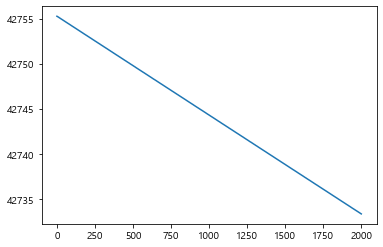

In [38]:
x_data = np.array([[73., 80., 75.], 
          [93., 88., 93.],
         [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]])
y_data = np.array([[152.], [185.], [180.], [196.], [142.]])


model=Sequential()

# layer, 즉 히든계층을 만들겠다.
model.add(Dense(units=1,input_shape=(3,))) 
model.compile(loss='mse',optimizer=Adam(lr=0.0000001))#비용 어떻게 구하고 최저비용을 어떻게 구하는지

result=model.fit(x_data,y_data,epochs=2000)
plt.plot(result.history['loss'])

Epoch 1/2000
5/5 [==============================] - 0s 18ms/step - loss: 53886.4141
Epoch 2/2000
5/5 [==============================] - 0s 289us/step - loss: 53413.3438
Epoch 3/2000
5/5 [==============================] - 0s 402us/step - loss: 52944.4258
Epoch 4/2000
5/5 [==============================] - 0s 206us/step - loss: 52479.6250
Epoch 5/2000
5/5 [==============================] - 0s 536us/step - loss: 52018.9102
Epoch 6/2000
5/5 [==============================] - 0s 345us/step - loss: 51562.2383
Epoch 7/2000
5/5 [==============================] - 0s 402us/step - loss: 51109.5859
Epoch 8/2000
5/5 [==============================] - 0s 627us/step - loss: 50660.8984
Epoch 9/2000
5/5 [==============================] - 0s 396us/step - loss: 50216.1523
Epoch 10/2000
5/5 [==============================] - 0s 501us/step - loss: 49775.3203
Epoch 11/2000
5/5 [==============================] - 0s 443us/step - loss: 49338.3555
Epoch 12/2000
5/5 [==============================] - 0s 399us/st

Epoch 97/2000
5/5 [==============================] - 0s 452us/step - loss: 23117.7773
Epoch 98/2000
5/5 [==============================] - 0s 399us/step - loss: 22914.9570
Epoch 99/2000
5/5 [==============================] - 0s 386us/step - loss: 22713.9160
Epoch 100/2000
5/5 [==============================] - 0s 450us/step - loss: 22514.6445
Epoch 101/2000
5/5 [==============================] - 0s 264us/step - loss: 22317.1211
Epoch 102/2000
5/5 [==============================] - 0s 199us/step - loss: 22121.3340
Epoch 103/2000
5/5 [==============================] - 0s 768us/step - loss: 21927.2656
Epoch 104/2000
5/5 [==============================] - 0s 481us/step - loss: 21734.9004
Epoch 105/2000
5/5 [==============================] - 0s 399us/step - loss: 21544.2266
Epoch 106/2000
5/5 [==============================] - 0s 237us/step - loss: 21355.2266
Epoch 107/2000
5/5 [==============================] - 0s 62us/step - loss: 21167.8867
Epoch 108/2000
5/5 [===========================

Epoch 192/2000
5/5 [==============================] - 0s 437us/step - loss: 10014.0645
Epoch 193/2000
5/5 [==============================] - 0s 358us/step - loss: 9926.3379
Epoch 194/2000
5/5 [==============================] - 0s 399us/step - loss: 9839.3809
Epoch 195/2000
5/5 [==============================] - 0s 632us/step - loss: 9753.1904
Epoch 196/2000
5/5 [==============================] - 0s 399us/step - loss: 9667.7549
Epoch 197/2000
5/5 [==============================] - 0s 288us/step - loss: 9583.0703
Epoch 198/2000
5/5 [==============================] - 0s 904us/step - loss: 9499.1309
Epoch 199/2000
5/5 [==============================] - 0s 399us/step - loss: 9415.9268
Epoch 200/2000
5/5 [==============================] - 0s 322us/step - loss: 9333.4551
Epoch 201/2000
5/5 [==============================] - 0s 399us/step - loss: 9251.7080
Epoch 202/2000
5/5 [==============================] - 0s 307us/step - loss: 9170.6777
Epoch 203/2000
5/5 [==============================] -

Epoch 288/2000
5/5 [==============================] - 0s 343us/step - loss: 4308.3647
Epoch 289/2000
5/5 [==============================] - 0s 496us/step - loss: 4270.7534
Epoch 290/2000
5/5 [==============================] - 0s 198us/step - loss: 4233.4731
Epoch 291/2000
5/5 [==============================] - 0s 393us/step - loss: 4196.5190
Epoch 292/2000
5/5 [==============================] - 0s 213us/step - loss: 4159.8896
Epoch 293/2000
5/5 [==============================] - 0s 227us/step - loss: 4123.5845
Epoch 294/2000
5/5 [==============================] - 0s 245us/step - loss: 4087.5952
Epoch 295/2000
5/5 [==============================] - 0s 324us/step - loss: 4051.9243
Epoch 296/2000
5/5 [==============================] - 0s 290us/step - loss: 4016.5659
Epoch 297/2000
5/5 [==============================] - 0s 399us/step - loss: 3981.5181
Epoch 298/2000
5/5 [==============================] - 0s 256us/step - loss: 3946.7781
Epoch 299/2000
5/5 [==============================] - 

Epoch 384/2000
5/5 [==============================] - 0s 201us/step - loss: 1862.1508
Epoch 385/2000
5/5 [==============================] - 0s 400us/step - loss: 1846.0264
Epoch 386/2000
5/5 [==============================] - 0s 200us/step - loss: 1830.0432
Epoch 387/2000
5/5 [==============================] - 0s 303us/step - loss: 1814.1996
Epoch 388/2000
5/5 [==============================] - 0s 189us/step - loss: 1798.4967
Epoch 389/2000
5/5 [==============================] - 0s 232us/step - loss: 1782.9303
Epoch 390/2000
5/5 [==============================] - 0s 200us/step - loss: 1767.5016
Epoch 391/2000
5/5 [==============================] - 0s 413us/step - loss: 1752.2078
Epoch 392/2000
5/5 [==============================] - 0s 273us/step - loss: 1737.0491
Epoch 393/2000
5/5 [==============================] - 0s 202us/step - loss: 1722.0219
Epoch 394/2000
5/5 [==============================] - 0s 396us/step - loss: 1707.1285
Epoch 395/2000
5/5 [==============================] - 

Epoch 480/2000
5/5 [==============================] - 0s 449us/step - loss: 813.3826
Epoch 481/2000
5/5 [==============================] - 0s 498us/step - loss: 806.4695
Epoch 482/2000
5/5 [==============================] - 0s 430us/step - loss: 799.6172
Epoch 483/2000
5/5 [==============================] - 0s 219us/step - loss: 792.8245
Epoch 484/2000
5/5 [==============================] - 0s 279us/step - loss: 786.0921
Epoch 485/2000
5/5 [==============================] - 0s 399us/step - loss: 779.4181
Epoch 486/2000
5/5 [==============================] - 0s 303us/step - loss: 772.8036
Epoch 487/2000
5/5 [==============================] - 0s 378us/step - loss: 766.2463
Epoch 488/2000
5/5 [==============================] - 0s 282us/step - loss: 759.7467
Epoch 489/2000
5/5 [==============================] - 0s 598us/step - loss: 753.3046
Epoch 490/2000
5/5 [==============================] - 0s 305us/step - loss: 746.9193
Epoch 491/2000
5/5 [==============================] - 0s 390us/st

Epoch 577/2000
5/5 [==============================] - 0s 393us/step - loss: 360.7706
Epoch 578/2000
5/5 [==============================] - 0s 281us/step - loss: 357.8325
Epoch 579/2000
5/5 [==============================] - 0s 375us/step - loss: 354.9204
Epoch 580/2000
5/5 [==============================] - 0s 362us/step - loss: 352.0340
Epoch 581/2000
5/5 [==============================] - 0s 399us/step - loss: 349.1724
Epoch 582/2000
5/5 [==============================] - 0s 396us/step - loss: 346.3364
Epoch 583/2000
5/5 [==============================] - 0s 484us/step - loss: 343.5255
Epoch 584/2000
5/5 [==============================] - 0s 399us/step - loss: 340.7388
Epoch 585/2000
5/5 [==============================] - 0s 399us/step - loss: 337.9765
Epoch 586/2000
5/5 [==============================] - 0s 399us/step - loss: 335.2390
Epoch 587/2000
5/5 [==============================] - 0s 399us/step - loss: 332.5251
Epoch 588/2000
5/5 [==============================] - 0s 399us/st

Epoch 674/2000
5/5 [==============================] - 0s 1ms/step - loss: 168.4191
Epoch 675/2000
5/5 [==============================] - 0s 800us/step - loss: 167.1705
Epoch 676/2000
5/5 [==============================] - 0s 399us/step - loss: 165.9326
Epoch 677/2000
5/5 [==============================] - 0s 399us/step - loss: 164.7060
Epoch 678/2000
5/5 [==============================] - 0s 582us/step - loss: 163.4898
Epoch 679/2000
5/5 [==============================] - 0s 414us/step - loss: 162.2846
Epoch 680/2000
5/5 [==============================] - 0s 391us/step - loss: 161.0898
Epoch 681/2000
5/5 [==============================] - 0s 601us/step - loss: 159.9053
Epoch 682/2000
5/5 [==============================] - 0s 800us/step - loss: 158.7316
Epoch 683/2000
5/5 [==============================] - 0s 587us/step - loss: 157.5682
Epoch 684/2000
5/5 [==============================] - 0s 997us/step - loss: 156.4146
Epoch 685/2000
5/5 [==============================] - 0s 799us/step

Epoch 771/2000
5/5 [==============================] - 0s 601us/step - loss: 86.6682
Epoch 772/2000
5/5 [==============================] - 0s 399us/step - loss: 86.1377
Epoch 773/2000
5/5 [==============================] - 0s 2ms/step - loss: 85.6116
Epoch 774/2000
5/5 [==============================] - 0s 256us/step - loss: 85.0900
Epoch 775/2000
5/5 [==============================] - 0s 259us/step - loss: 84.5730
Epoch 776/2000
5/5 [==============================] - 0s 1ms/step - loss: 84.0608
Epoch 777/2000
5/5 [==============================] - 0s 1ms/step - loss: 83.5529
Epoch 778/2000
5/5 [==============================] - 0s 399us/step - loss: 83.0497
Epoch 779/2000
5/5 [==============================] - 0s 998us/step - loss: 82.5508
Epoch 780/2000
5/5 [==============================] - 0s 298us/step - loss: 82.0561
Epoch 781/2000
5/5 [==============================] - 0s 345us/step - loss: 81.5661
Epoch 782/2000
5/5 [==============================] - 0s 870us/step - loss: 81.080

Epoch 869/2000
5/5 [==============================] - 0s 199us/step - loss: 51.6942
Epoch 870/2000
5/5 [==============================] - 0s 405us/step - loss: 51.4706
Epoch 871/2000
5/5 [==============================] - 0s 295us/step - loss: 51.2487
Epoch 872/2000
5/5 [==============================] - 0s 291us/step - loss: 51.0291
Epoch 873/2000
5/5 [==============================] - 0s 707us/step - loss: 50.8113
Epoch 874/2000
5/5 [==============================] - 0s 399us/step - loss: 50.5954
Epoch 875/2000
5/5 [==============================] - 0s 296us/step - loss: 50.3813
Epoch 876/2000
5/5 [==============================] - 0s 357us/step - loss: 50.1693
Epoch 877/2000
5/5 [==============================] - 0s 299us/step - loss: 49.9591
Epoch 878/2000
5/5 [==============================] - 0s 375us/step - loss: 49.7507
Epoch 879/2000
5/5 [==============================] - 0s 201us/step - loss: 49.5441
Epoch 880/2000
5/5 [==============================] - 0s 143us/step - loss: 

Epoch 967/2000
5/5 [==============================] - 0s 600us/step - loss: 36.9537
Epoch 968/2000
5/5 [==============================] - 0s 358us/step - loss: 36.8595
Epoch 969/2000
5/5 [==============================] - 0s 598us/step - loss: 36.7661
Epoch 970/2000
5/5 [==============================] - 0s 595us/step - loss: 36.6734
Epoch 971/2000
5/5 [==============================] - 0s 399us/step - loss: 36.5816
Epoch 972/2000
5/5 [==============================] - 0s 798us/step - loss: 36.4906
Epoch 973/2000
5/5 [==============================] - 0s 398us/step - loss: 36.4004
Epoch 974/2000
5/5 [==============================] - 0s 598us/step - loss: 36.3109
Epoch 975/2000
5/5 [==============================] - 0s 199us/step - loss: 36.2222
Epoch 976/2000
5/5 [==============================] - 0s 2ms/step - loss: 36.1343
Epoch 977/2000
5/5 [==============================] - 0s 292us/step - loss: 36.0473
Epoch 978/2000
5/5 [==============================] - 0s 784us/step - loss: 35

Epoch 1065/2000
5/5 [==============================] - 0s 597us/step - loss: 30.7366
Epoch 1066/2000
5/5 [==============================] - 0s 399us/step - loss: 30.6967
Epoch 1067/2000
5/5 [==============================] - 0s 394us/step - loss: 30.6574
Epoch 1068/2000
5/5 [==============================] - 0s 998us/step - loss: 30.6183
Epoch 1069/2000
5/5 [==============================] - 0s 330us/step - loss: 30.5795
Epoch 1070/2000
5/5 [==============================] - 0s 598us/step - loss: 30.5411
Epoch 1071/2000
5/5 [==============================] - 0s 198us/step - loss: 30.5030
Epoch 1072/2000
5/5 [==============================] - 0s 808us/step - loss: 30.4651
Epoch 1073/2000
5/5 [==============================] - 0s 594us/step - loss: 30.4277
Epoch 1074/2000
5/5 [==============================] - 0s 524us/step - loss: 30.3906
Epoch 1075/2000
5/5 [==============================] - 0s 389us/step - loss: 30.3539
Epoch 1076/2000
5/5 [==============================] - 0s 199us/s

Epoch 1162/2000
5/5 [==============================] - 0s 190us/step - loss: 28.1267
Epoch 1163/2000
5/5 [==============================] - 0s 615us/step - loss: 28.1097
Epoch 1164/2000
5/5 [==============================] - 0s 396us/step - loss: 28.0928
Epoch 1165/2000
5/5 [==============================] - 0s 299us/step - loss: 28.0761
Epoch 1166/2000
5/5 [==============================] - 0s 399us/step - loss: 28.0596
Epoch 1167/2000
5/5 [==============================] - 0s 559us/step - loss: 28.0432
Epoch 1168/2000
5/5 [==============================] - 0s 598us/step - loss: 28.0269
Epoch 1169/2000
5/5 [==============================] - 0s 415us/step - loss: 28.0107
Epoch 1170/2000
5/5 [==============================] - 0s 599us/step - loss: 27.9948
Epoch 1171/2000
5/5 [==============================] - 0s 399us/step - loss: 27.9790
Epoch 1172/2000
5/5 [==============================] - 0s 201us/step - loss: 27.9632
Epoch 1173/2000
5/5 [==============================] - 0s 265us/s

Epoch 1259/2000
5/5 [==============================] - 0s 599us/step - loss: 27.0097
Epoch 1260/2000
5/5 [==============================] - 0s 397us/step - loss: 27.0024
Epoch 1261/2000
5/5 [==============================] - 0s 262us/step - loss: 26.9951
Epoch 1262/2000
5/5 [==============================] - 0s 399us/step - loss: 26.9880
Epoch 1263/2000
5/5 [==============================] - 0s 589us/step - loss: 26.9808
Epoch 1264/2000
5/5 [==============================] - 0s 399us/step - loss: 26.9738
Epoch 1265/2000
5/5 [==============================] - 0s 596us/step - loss: 26.9668
Epoch 1266/2000
5/5 [==============================] - 0s 360us/step - loss: 26.9599
Epoch 1267/2000
5/5 [==============================] - 0s 470us/step - loss: 26.9530
Epoch 1268/2000
5/5 [==============================] - 0s 399us/step - loss: 26.9462
Epoch 1269/2000
5/5 [==============================] - 0s 596us/step - loss: 26.9394
Epoch 1270/2000
5/5 [==============================] - 0s 200us/s

Epoch 1356/2000
5/5 [==============================] - 0s 399us/step - loss: 26.5271
Epoch 1357/2000
5/5 [==============================] - 0s 798us/step - loss: 26.5240
Epoch 1358/2000
5/5 [==============================] - 0s 560us/step - loss: 26.5208
Epoch 1359/2000
5/5 [==============================] - 0s 418us/step - loss: 26.5177
Epoch 1360/2000
5/5 [==============================] - 0s 399us/step - loss: 26.5146
Epoch 1361/2000
5/5 [==============================] - 0s 399us/step - loss: 26.5115
Epoch 1362/2000
5/5 [==============================] - 0s 399us/step - loss: 26.5084
Epoch 1363/2000
5/5 [==============================] - 0s 596us/step - loss: 26.5054
Epoch 1364/2000
5/5 [==============================] - 0s 399us/step - loss: 26.5024
Epoch 1365/2000
5/5 [==============================] - 0s 400us/step - loss: 26.4994
Epoch 1366/2000
5/5 [==============================] - 0s 636us/step - loss: 26.4965
Epoch 1367/2000
5/5 [==============================] - 0s 215us/s

Epoch 1453/2000
5/5 [==============================] - 0s 787us/step - loss: 26.3143
Epoch 1454/2000
5/5 [==============================] - 0s 767us/step - loss: 26.3128
Epoch 1455/2000
5/5 [==============================] - 0s 600us/step - loss: 26.3114
Epoch 1456/2000
5/5 [==============================] - 0s 338us/step - loss: 26.3100
Epoch 1457/2000
5/5 [==============================] - 0s 1ms/step - loss: 26.3086
Epoch 1458/2000
5/5 [==============================] - 0s 574us/step - loss: 26.3072
Epoch 1459/2000
5/5 [==============================] - 0s 795us/step - loss: 26.3058
Epoch 1460/2000
5/5 [==============================] - 0s 403us/step - loss: 26.3044
Epoch 1461/2000
5/5 [==============================] - 0s 142us/step - loss: 26.3031
Epoch 1462/2000
5/5 [==============================] - 0s 1ms/step - loss: 26.3018
Epoch 1463/2000
5/5 [==============================] - 0s 397us/step - loss: 26.3004
Epoch 1464/2000
5/5 [==============================] - 0s 1ms/step - 

Epoch 1550/2000
5/5 [==============================] - 0s 399us/step - loss: 26.2159
Epoch 1551/2000
5/5 [==============================] - 0s 400us/step - loss: 26.2153
Epoch 1552/2000
5/5 [==============================] - 0s 1ms/step - loss: 26.2145
Epoch 1553/2000
5/5 [==============================] - 0s 399us/step - loss: 26.2139
Epoch 1554/2000
5/5 [==============================] - 0s 598us/step - loss: 26.2133
Epoch 1555/2000
5/5 [==============================] - 0s 829us/step - loss: 26.2126
Epoch 1556/2000
5/5 [==============================] - 0s 399us/step - loss: 26.2118
Epoch 1557/2000
5/5 [==============================] - 0s 598us/step - loss: 26.2112
Epoch 1558/2000
5/5 [==============================] - 0s 765us/step - loss: 26.2105
Epoch 1559/2000
5/5 [==============================] - 0s 697us/step - loss: 26.2099
Epoch 1560/2000
5/5 [==============================] - 0s 394us/step - loss: 26.2093
Epoch 1561/2000
5/5 [==============================] - 0s 331us/ste

Epoch 1647/2000
5/5 [==============================] - 0s 720us/step - loss: 26.1664
Epoch 1648/2000
5/5 [==============================] - 0s 599us/step - loss: 26.1659
Epoch 1649/2000
5/5 [==============================] - 0s 275us/step - loss: 26.1656
Epoch 1650/2000
5/5 [==============================] - 0s 454us/step - loss: 26.1652
Epoch 1651/2000
5/5 [==============================] - 0s 664us/step - loss: 26.1648
Epoch 1652/2000
5/5 [==============================] - 0s 997us/step - loss: 26.1645
Epoch 1653/2000
5/5 [==============================] - 0s 100us/step - loss: 26.1642
Epoch 1654/2000
5/5 [==============================] - 0s 797us/step - loss: 26.1638
Epoch 1655/2000
5/5 [==============================] - 0s 399us/step - loss: 26.1634
Epoch 1656/2000
5/5 [==============================] - 0s 199us/step - loss: 26.1630
Epoch 1657/2000
5/5 [==============================] - 0s 390us/step - loss: 26.1627
Epoch 1658/2000
5/5 [==============================] - 0s 488us/s

Epoch 1744/2000
5/5 [==============================] - 0s 706us/step - loss: 26.1374
Epoch 1745/2000
5/5 [==============================] - 0s 338us/step - loss: 26.1372
Epoch 1746/2000
5/5 [==============================] - 0s 397us/step - loss: 26.1369
Epoch 1747/2000
5/5 [==============================] - 0s 1ms/step - loss: 26.1367
Epoch 1748/2000
5/5 [==============================] - 0s 240us/step - loss: 26.1364
Epoch 1749/2000
5/5 [==============================] - 0s 599us/step - loss: 26.1362
Epoch 1750/2000
5/5 [==============================] - 0s 841us/step - loss: 26.1360
Epoch 1751/2000
5/5 [==============================] - 0s 618us/step - loss: 26.1358
Epoch 1752/2000
5/5 [==============================] - 0s 597us/step - loss: 26.1355
Epoch 1753/2000
5/5 [==============================] - 0s 210us/step - loss: 26.1353
Epoch 1754/2000
5/5 [==============================] - 0s 797us/step - loss: 26.1351
Epoch 1755/2000
5/5 [==============================] - 0s 308us/ste

Epoch 1841/2000
5/5 [==============================] - 0s 303us/step - loss: 26.1173
Epoch 1842/2000
5/5 [==============================] - 0s 303us/step - loss: 26.1171
Epoch 1843/2000
5/5 [==============================] - 0s 205us/step - loss: 26.1169
Epoch 1844/2000
5/5 [==============================] - 0s 502us/step - loss: 26.1167
Epoch 1845/2000
5/5 [==============================] - 0s 522us/step - loss: 26.1165
Epoch 1846/2000
5/5 [==============================] - 0s 1ms/step - loss: 26.1164
Epoch 1847/2000
5/5 [==============================] - 0s 278us/step - loss: 26.1162
Epoch 1848/2000
5/5 [==============================] - 0s 793us/step - loss: 26.1160
Epoch 1849/2000
5/5 [==============================] - 0s 399us/step - loss: 26.1158
Epoch 1850/2000
5/5 [==============================] - 0s 479us/step - loss: 26.1157
Epoch 1851/2000
5/5 [==============================] - 0s 601us/step - loss: 26.1155
Epoch 1852/2000
5/5 [==============================] - 0s 298us/ste

Epoch 1938/2000
5/5 [==============================] - 0s 973us/step - loss: 26.1009
Epoch 1939/2000
5/5 [==============================] - 0s 799us/step - loss: 26.1008
Epoch 1940/2000
5/5 [==============================] - 0s 200us/step - loss: 26.1006
Epoch 1941/2000
5/5 [==============================] - 0s 436us/step - loss: 26.1004
Epoch 1942/2000
5/5 [==============================] - 0s 802us/step - loss: 26.1003
Epoch 1943/2000
5/5 [==============================] - 0s 997us/step - loss: 26.1001
Epoch 1944/2000
5/5 [==============================] - 0s 599us/step - loss: 26.1000
Epoch 1945/2000
5/5 [==============================] - 0s 820us/step - loss: 26.0998
Epoch 1946/2000
5/5 [==============================] - 0s 678us/step - loss: 26.0997
Epoch 1947/2000
5/5 [==============================] - 0s 707us/step - loss: 26.0995
Epoch 1948/2000
5/5 [==============================] - 0s 566us/step - loss: 26.0993
Epoch 1949/2000
5/5 [==============================] - 0s 284us/s

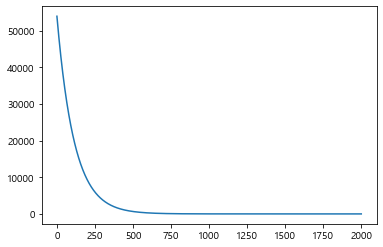

In [39]:
# 케라스에서는 데이터를 반드시 넘파이로 변환을 시켜서 사용해야함- 2차원 부터는 반스시
x_data = np.array([[73., 80., 75.], 
          [93., 88., 93.],
         [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]])
y_data = np.array([[152.], [185.], [180.], [196.], [142.]])


model=Sequential()

# layer, 즉 히든계층을 만들겠다.
model.add(Dense(units=1,input_shape=(3,))) 
model.compile(loss='mse',optimizer=SGD(lr=0.0000001))#비용 어떻게 구하고 최저비용을 어떻게 구하는지

result=model.fit(x_data,y_data,epochs=2000)
plt.plot(result.history['loss'])

In [41]:
print(model.predict(x_data))
print('예측값 :',model.predict(np.array([[73.,80.,75.]])))

[[158.61772]
 [179.66887]
 [182.77289]
 [197.99287]
 [135.175  ]]
예측값 : [[158.61772]]


## 3) 체중과 나이에 따른 혈당 예측

+ 체중이 100이고 나이가 40일때 혈당은? 

In [50]:
np.random.seed(7)
data = np.genfromtxt('data/x09.txt',skip_header=36)
data=pd.DataFrame(data)
data

,0,1,2,3,4
0,1.0,1.0,84.0,46.0,354.0
1,2.0,1.0,73.0,20.0,190.0
2,3.0,1.0,65.0,52.0,405.0
3,4.0,1.0,70.0,30.0,263.0
4,5.0,1.0,76.0,57.0,451.0
5,6.0,1.0,69.0,25.0,302.0
6,7.0,1.0,63.0,28.0,288.0
7,8.0,1.0,72.0,36.0,385.0
8,9.0,1.0,79.0,57.0,402.0
9,10.0,1.0,75.0,44.0,365.0


In [51]:
del data[0]

In [56]:
data

,2,3,4
0,84.0,46.0,354.0
1,73.0,20.0,190.0
2,65.0,52.0,405.0
3,70.0,30.0,263.0
4,76.0,57.0,451.0
5,69.0,25.0,302.0
6,63.0,28.0,288.0
7,72.0,36.0,385.0
8,79.0,57.0,402.0
9,75.0,44.0,365.0


In [62]:
y_data=data[4]
y_data

0     354.0
1     190.0
2     405.0
3     263.0
4     451.0
5     302.0
6     288.0
7     385.0
8     402.0
9     365.0
10    209.0
11    290.0
12    346.0
13    254.0
14    395.0
15    434.0
16    220.0
17    374.0
18    308.0
19    220.0
20    311.0
21    181.0
22    274.0
23    303.0
24    244.0
Name: 4, dtype: float64

In [69]:
del data[4]

In [72]:
x_data = np.array(data)

In [76]:
y_data = np.array(y_data)
y_data

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209.,
       290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181.,
       274., 303., 244.])

Epoch 1/2000
25/25 [==============================] - 0s 6ms/step - loss: 93661.9219
Epoch 2/2000
25/25 [==============================] - 0s 40us/step - loss: 92995.9922
Epoch 3/2000
25/25 [==============================] - 0s 69us/step - loss: 92332.5625
Epoch 4/2000
25/25 [==============================] - 0s 72us/step - loss: 91671.6797
Epoch 5/2000
25/25 [==============================] - 0s 120us/step - loss: 91013.3828
Epoch 6/2000
25/25 [==============================] - 0s 81us/step - loss: 90357.7188
Epoch 7/2000
25/25 [==============================] - 0s 38us/step - loss: 89704.7188
Epoch 8/2000
25/25 [==============================] - 0s 52us/step - loss: 89054.4375
Epoch 9/2000
25/25 [==============================] - 0s 58us/step - loss: 88406.9062
Epoch 10/2000
25/25 [==============================] - 0s 171us/step - loss: 87762.1719
Epoch 11/2000
25/25 [==============================] - 0s 68us/step - loss: 87120.2422
Epoch 12/2000
25/25 [==============================

Epoch 95/2000
25/25 [==============================] - 0s 149us/step - loss: 44386.1211
Epoch 96/2000
25/25 [==============================] - 0s 76us/step - loss: 44003.5039
Epoch 97/2000
25/25 [==============================] - 0s 125us/step - loss: 43625.5117
Epoch 98/2000
25/25 [==============================] - 0s 74us/step - loss: 43250.2109
Epoch 99/2000
25/25 [==============================] - 0s 79us/step - loss: 42875.7891
Epoch 100/2000
25/25 [==============================] - 0s 204us/step - loss: 42504.0898
Epoch 101/2000
25/25 [==============================] - 0s 92us/step - loss: 42135.0859
Epoch 102/2000
25/25 [==============================] - 0s 120us/step - loss: 41770.4688
Epoch 103/2000
25/25 [==============================] - 0s 160us/step - loss: 41406.8125
Epoch 104/2000
25/25 [==============================] - 0s 117us/step - loss: 41045.8164
Epoch 105/2000
25/25 [==============================] - 0s 125us/step - loss: 40689.0938
Epoch 106/2000
25/25 [========

Epoch 188/2000
25/25 [==============================] - 0s 84us/step - loss: 18966.7910
Epoch 189/2000
25/25 [==============================] - 0s 138us/step - loss: 18786.8867
Epoch 190/2000
25/25 [==============================] - 0s 95us/step - loss: 18608.5938
Epoch 191/2000
25/25 [==============================] - 0s 58us/step - loss: 18431.9141
Epoch 192/2000
25/25 [==============================] - 0s 38us/step - loss: 18256.8359
Epoch 193/2000
25/25 [==============================] - 0s 80us/step - loss: 18082.9355
Epoch 194/2000
25/25 [==============================] - 0s 40us/step - loss: 17911.0195
Epoch 195/2000
25/25 [==============================] - 0s 94us/step - loss: 17740.6777
Epoch 196/2000
25/25 [==============================] - 0s 117us/step - loss: 17571.8887
Epoch 197/2000
25/25 [==============================] - 0s 72us/step - loss: 17404.2617
Epoch 198/2000
25/25 [==============================] - 0s 42us/step - loss: 17238.1816
Epoch 199/2000
25/25 [========

Epoch 282/2000
25/25 [==============================] - 0s 80us/step - loss: 7810.5220
Epoch 283/2000
25/25 [==============================] - 0s 33us/step - loss: 7741.1270
Epoch 284/2000
25/25 [==============================] - 0s 89us/step - loss: 7672.5127
Epoch 285/2000
25/25 [==============================] - 0s 89us/step - loss: 7604.7749
Epoch 286/2000
25/25 [==============================] - 0s 80us/step - loss: 7537.8032
Epoch 287/2000
25/25 [==============================] - 0s 78us/step - loss: 7471.5898
Epoch 288/2000
25/25 [==============================] - 0s 115us/step - loss: 7406.1289
Epoch 289/2000
25/25 [==============================] - 0s 136us/step - loss: 7341.4092
Epoch 290/2000
25/25 [==============================] - 0s 107us/step - loss: 7277.4302
Epoch 291/2000
25/25 [==============================] - 0s 120us/step - loss: 7214.0864
Epoch 292/2000
25/25 [==============================] - 0s 80us/step - loss: 7151.5601
Epoch 293/2000
25/25 [=================

Epoch 376/2000
25/25 [==============================] - 0s 80us/step - loss: 3882.0081
Epoch 377/2000
25/25 [==============================] - 0s 145us/step - loss: 3860.6208
Epoch 378/2000
25/25 [==============================] - 0s 36us/step - loss: 3839.5249
Epoch 379/2000
25/25 [==============================] - 0s 64us/step - loss: 3818.7185
Epoch 380/2000
25/25 [==============================] - 0s 56us/step - loss: 3798.1729
Epoch 381/2000
25/25 [==============================] - 0s 38us/step - loss: 3777.9094
Epoch 382/2000
25/25 [==============================] - 0s 68us/step - loss: 3757.9238
Epoch 383/2000
25/25 [==============================] - 0s 36us/step - loss: 3738.2144
Epoch 384/2000
25/25 [==============================] - 0s 58us/step - loss: 3718.7949
Epoch 385/2000
25/25 [==============================] - 0s 80us/step - loss: 3699.6250
Epoch 386/2000
25/25 [==============================] - 0s 80us/step - loss: 3680.7397
Epoch 387/2000
25/25 [====================

Epoch 471/2000
25/25 [==============================] - 0s 40us/step - loss: 2764.8782
Epoch 472/2000
25/25 [==============================] - 0s 134us/step - loss: 2759.6318
Epoch 473/2000
25/25 [==============================] - 0s 81us/step - loss: 2754.4702
Epoch 474/2000
25/25 [==============================] - 0s 91us/step - loss: 2749.3860
Epoch 475/2000
25/25 [==============================] - 0s 81us/step - loss: 2744.3816
Epoch 476/2000
25/25 [==============================] - 0s 47us/step - loss: 2739.4553
Epoch 477/2000
25/25 [==============================] - 0s 89us/step - loss: 2734.6062
Epoch 478/2000
25/25 [==============================] - 0s 81us/step - loss: 2729.8335
Epoch 479/2000
25/25 [==============================] - 0s 79us/step - loss: 2725.1394
Epoch 480/2000
25/25 [==============================] - 0s 154us/step - loss: 2720.5156
Epoch 481/2000
25/25 [==============================] - 0s 42us/step - loss: 2715.9675
Epoch 482/2000
25/25 [===================

Epoch 565/2000
25/25 [==============================] - 0s 91us/step - loss: 2507.2070
Epoch 566/2000
25/25 [==============================] - 0s 80us/step - loss: 2506.0234
Epoch 567/2000
25/25 [==============================] - 0s 40us/step - loss: 2504.8577
Epoch 568/2000
25/25 [==============================] - 0s 101us/step - loss: 2503.7092
Epoch 569/2000
25/25 [==============================] - 0s 84us/step - loss: 2502.5781
Epoch 570/2000
25/25 [==============================] - 0s 42us/step - loss: 2501.4636
Epoch 571/2000
25/25 [==============================] - 0s 51us/step - loss: 2500.3652
Epoch 572/2000
25/25 [==============================] - 0s 37us/step - loss: 2499.2834
Epoch 573/2000
25/25 [==============================] - 0s 103us/step - loss: 2498.2173
Epoch 574/2000
25/25 [==============================] - 0s 159us/step - loss: 2497.1670
Epoch 575/2000
25/25 [==============================] - 0s 80us/step - loss: 2496.1313
Epoch 576/2000
25/25 [==================

Epoch 659/2000
25/25 [==============================] - 0s 64us/step - loss: 2443.4070
Epoch 660/2000
25/25 [==============================] - 0s 65us/step - loss: 2443.0154
Epoch 661/2000
25/25 [==============================] - 0s 129us/step - loss: 2442.6267
Epoch 662/2000
25/25 [==============================] - 0s 52us/step - loss: 2442.2402
Epoch 663/2000
25/25 [==============================] - 0s 47us/step - loss: 2441.8569
Epoch 664/2000
25/25 [==============================] - 0s 80us/step - loss: 2441.4766
Epoch 665/2000
25/25 [==============================] - 0s 44us/step - loss: 2441.0981
Epoch 666/2000
25/25 [==============================] - 0s 80us/step - loss: 2440.7224
Epoch 667/2000
25/25 [==============================] - 0s 76us/step - loss: 2440.3501
Epoch 668/2000
25/25 [==============================] - 0s 106us/step - loss: 2439.9797
Epoch 669/2000
25/25 [==============================] - 0s 37us/step - loss: 2439.6118
Epoch 670/2000
25/25 [===================

Epoch 753/2000
25/25 [==============================] - 0s 120us/step - loss: 2413.5630
Epoch 754/2000
25/25 [==============================] - 0s 80us/step - loss: 2413.2827
Epoch 755/2000
25/25 [==============================] - 0s 102us/step - loss: 2413.0022
Epoch 756/2000
25/25 [==============================] - 0s 83us/step - loss: 2412.7217
Epoch 757/2000
25/25 [==============================] - 0s 79us/step - loss: 2412.4417
Epoch 758/2000
25/25 [==============================] - 0s 119us/step - loss: 2412.1616
Epoch 759/2000
25/25 [==============================] - 0s 111us/step - loss: 2411.8826
Epoch 760/2000
25/25 [==============================] - 0s 183us/step - loss: 2411.6030
Epoch 761/2000
25/25 [==============================] - 0s 118us/step - loss: 2411.3235
Epoch 762/2000
25/25 [==============================] - 0s 120us/step - loss: 2411.0444
Epoch 763/2000
25/25 [==============================] - 0s 40us/step - loss: 2410.7656
Epoch 764/2000
25/25 [==============

Epoch 847/2000
25/25 [==============================] - 0s 64us/step - loss: 2387.5974
Epoch 848/2000
25/25 [==============================] - 0s 111us/step - loss: 2387.3218
Epoch 849/2000
25/25 [==============================] - 0s 52us/step - loss: 2387.0457
Epoch 850/2000
25/25 [==============================] - 0s 40us/step - loss: 2386.7693
Epoch 851/2000
25/25 [==============================] - 0s 48us/step - loss: 2386.4929
Epoch 852/2000
25/25 [==============================] - 0s 82us/step - loss: 2386.2163
Epoch 853/2000
25/25 [==============================] - 0s 80us/step - loss: 2385.9395
Epoch 854/2000
25/25 [==============================] - 0s 104us/step - loss: 2385.6626
Epoch 855/2000
25/25 [==============================] - 0s 80us/step - loss: 2385.3857
Epoch 856/2000
25/25 [==============================] - 0s 79us/step - loss: 2385.1091
Epoch 857/2000
25/25 [==============================] - 0s 81us/step - loss: 2384.8323
Epoch 858/2000
25/25 [===================

Epoch 941/2000
25/25 [==============================] - 0s 295us/step - loss: 2361.3367
Epoch 942/2000
25/25 [==============================] - 0s 121us/step - loss: 2361.0540
Epoch 943/2000
25/25 [==============================] - 0s 112us/step - loss: 2360.7715
Epoch 944/2000
25/25 [==============================] - 0s 61us/step - loss: 2360.4885
Epoch 945/2000
25/25 [==============================] - 0s 80us/step - loss: 2360.2056
Epoch 946/2000
25/25 [==============================] - 0s 164us/step - loss: 2359.9229
Epoch 947/2000
25/25 [==============================] - 0s 75us/step - loss: 2359.6399
Epoch 948/2000
25/25 [==============================] - 0s 120us/step - loss: 2359.3564
Epoch 949/2000
25/25 [==============================] - 0s 42us/step - loss: 2359.0732
Epoch 950/2000
25/25 [==============================] - 0s 146us/step - loss: 2358.7900
Epoch 951/2000
25/25 [==============================] - 0s 77us/step - loss: 2358.5073
Epoch 952/2000
25/25 [===============

Epoch 1035/2000
25/25 [==============================] - 0s 160us/step - loss: 2334.5088
Epoch 1036/2000
25/25 [==============================] - 0s 35us/step - loss: 2334.2212
Epoch 1037/2000
25/25 [==============================] - 0s 62us/step - loss: 2333.9329
Epoch 1038/2000
25/25 [==============================] - 0s 100us/step - loss: 2333.6455
Epoch 1039/2000
25/25 [==============================] - 0s 60us/step - loss: 2333.3572
Epoch 1040/2000
25/25 [==============================] - 0s 97us/step - loss: 2333.0693
Epoch 1041/2000
25/25 [==============================] - 0s 120us/step - loss: 2332.7808
Epoch 1042/2000
25/25 [==============================] - 0s 81us/step - loss: 2332.4932
Epoch 1043/2000
25/25 [==============================] - 0s 40us/step - loss: 2332.2051
Epoch 1044/2000
25/25 [==============================] - 0s 80us/step - loss: 2331.9165
Epoch 1045/2000
25/25 [==============================] - 0s 85us/step - loss: 2331.6282
Epoch 1046/2000
25/25 [======

Epoch 1128/2000
25/25 [==============================] - 0s 45us/step - loss: 2307.5771
Epoch 1129/2000
25/25 [==============================] - 0s 137us/step - loss: 2307.2861
Epoch 1130/2000
25/25 [==============================] - 0s 80us/step - loss: 2306.9951
Epoch 1131/2000
25/25 [==============================] - 0s 131us/step - loss: 2306.7041
Epoch 1132/2000
25/25 [==============================] - 0s 73us/step - loss: 2306.4126
Epoch 1133/2000
25/25 [==============================] - 0s 59us/step - loss: 2306.1221
Epoch 1134/2000
25/25 [==============================] - 0s 80us/step - loss: 2305.8313
Epoch 1135/2000
25/25 [==============================] - 0s 82us/step - loss: 2305.5400
Epoch 1136/2000
25/25 [==============================] - 0s 51us/step - loss: 2305.2485
Epoch 1137/2000
25/25 [==============================] - 0s 80us/step - loss: 2304.9575
Epoch 1138/2000
25/25 [==============================] - 0s 80us/step - loss: 2304.6665
Epoch 1139/2000
25/25 [=======

Epoch 1221/2000
25/25 [==============================] - 0s 160us/step - loss: 2280.4563
Epoch 1222/2000
25/25 [==============================] - 0s 95us/step - loss: 2280.1648
Epoch 1223/2000
25/25 [==============================] - 0s 79us/step - loss: 2279.8728
Epoch 1224/2000
25/25 [==============================] - 0s 160us/step - loss: 2279.5806
Epoch 1225/2000
25/25 [==============================] - 0s 88us/step - loss: 2279.2888
Epoch 1226/2000
25/25 [==============================] - 0s 77us/step - loss: 2278.9966
Epoch 1227/2000
25/25 [==============================] - 0s 65us/step - loss: 2278.7048
Epoch 1228/2000
25/25 [==============================] - 0s 99us/step - loss: 2278.4126
Epoch 1229/2000
25/25 [==============================] - 0s 94us/step - loss: 2278.1208
Epoch 1230/2000
25/25 [==============================] - 0s 76us/step - loss: 2277.8291
Epoch 1231/2000
25/25 [==============================] - 0s 80us/step - loss: 2277.5369
Epoch 1232/2000
25/25 [=======

Epoch 1314/2000
25/25 [==============================] - 0s 67us/step - loss: 2253.3391
Epoch 1315/2000
25/25 [==============================] - 0s 87us/step - loss: 2253.0479
Epoch 1316/2000
25/25 [==============================] - 0s 118us/step - loss: 2252.7576
Epoch 1317/2000
25/25 [==============================] - 0s 66us/step - loss: 2252.4663
Epoch 1318/2000
25/25 [==============================] - 0s 85us/step - loss: 2252.1755
Epoch 1319/2000
25/25 [==============================] - 0s 80us/step - loss: 2251.8853
Epoch 1320/2000
25/25 [==============================] - 0s 43us/step - loss: 2251.5942
Epoch 1321/2000
25/25 [==============================] - 0s 79us/step - loss: 2251.3030
Epoch 1322/2000
25/25 [==============================] - 0s 70us/step - loss: 2251.0125
Epoch 1323/2000
25/25 [==============================] - 0s 73us/step - loss: 2250.7219
Epoch 1324/2000
25/25 [==============================] - 0s 61us/step - loss: 2250.4309
Epoch 1325/2000
25/25 [========

Epoch 1407/2000
25/25 [==============================] - 0s 80us/step - loss: 2226.4075
Epoch 1408/2000
25/25 [==============================] - 0s 40us/step - loss: 2226.1196
Epoch 1409/2000
25/25 [==============================] - 0s 140us/step - loss: 2225.8315
Epoch 1410/2000
25/25 [==============================] - 0s 107us/step - loss: 2225.5435
Epoch 1411/2000
25/25 [==============================] - 0s 75us/step - loss: 2225.2559
Epoch 1412/2000
25/25 [==============================] - 0s 201us/step - loss: 2224.9678
Epoch 1413/2000
25/25 [==============================] - 0s 77us/step - loss: 2224.6802
Epoch 1414/2000
25/25 [==============================] - 0s 80us/step - loss: 2224.3923
Epoch 1415/2000
25/25 [==============================] - 0s 61us/step - loss: 2224.1045
Epoch 1416/2000
25/25 [==============================] - 0s 79us/step - loss: 2223.8169
Epoch 1417/2000
25/25 [==============================] - 0s 117us/step - loss: 2223.5293
Epoch 1418/2000
25/25 [=====

Epoch 1500/2000
25/25 [==============================] - 0s 86us/step - loss: 2199.8350
Epoch 1501/2000
25/25 [==============================] - 0s 53us/step - loss: 2199.5518
Epoch 1502/2000
25/25 [==============================] - 0s 214us/step - loss: 2199.2688
Epoch 1503/2000
25/25 [==============================] - 0s 131us/step - loss: 2198.9858
Epoch 1504/2000
25/25 [==============================] - 0s 90us/step - loss: 2198.7024
Epoch 1505/2000
25/25 [==============================] - 0s 90us/step - loss: 2198.4199
Epoch 1506/2000
25/25 [==============================] - 0s 90us/step - loss: 2198.1367
Epoch 1507/2000
25/25 [==============================] - 0s 127us/step - loss: 2197.8540
Epoch 1508/2000
25/25 [==============================] - 0s 95us/step - loss: 2197.5713
Epoch 1509/2000
25/25 [==============================] - 0s 80us/step - loss: 2197.2883
Epoch 1510/2000
25/25 [==============================] - 0s 40us/step - loss: 2197.0056
Epoch 1511/2000
25/25 [======

Epoch 1593/2000
25/25 [==============================] - 0s 79us/step - loss: 2173.7844
Epoch 1594/2000
25/25 [==============================] - 0s 80us/step - loss: 2173.5076
Epoch 1595/2000
25/25 [==============================] - 0s 61us/step - loss: 2173.2314
Epoch 1596/2000
25/25 [==============================] - 0s 101us/step - loss: 2172.9546
Epoch 1597/2000
25/25 [==============================] - 0s 80us/step - loss: 2172.6780
Epoch 1598/2000
25/25 [==============================] - 0s 66us/step - loss: 2172.4021
Epoch 1599/2000
25/25 [==============================] - 0s 60us/step - loss: 2172.1248
Epoch 1600/2000
25/25 [==============================] - 0s 77us/step - loss: 2171.8484
Epoch 1601/2000
25/25 [==============================] - 0s 160us/step - loss: 2171.5723
Epoch 1602/2000
25/25 [==============================] - 0s 137us/step - loss: 2171.2969
Epoch 1603/2000
25/25 [==============================] - 0s 116us/step - loss: 2171.0208
Epoch 1604/2000
25/25 [=====

Epoch 1686/2000
25/25 [==============================] - 0s 81us/step - loss: 2148.4060
Epoch 1687/2000
25/25 [==============================] - 0s 78us/step - loss: 2148.1370
Epoch 1688/2000
25/25 [==============================] - 0s 59us/step - loss: 2147.8684
Epoch 1689/2000
25/25 [==============================] - 0s 40us/step - loss: 2147.6001
Epoch 1690/2000
25/25 [==============================] - 0s 142us/step - loss: 2147.3318
Epoch 1691/2000
25/25 [==============================] - 0s 40us/step - loss: 2147.0632
Epoch 1692/2000
25/25 [==============================] - 0s 80us/step - loss: 2146.7952
Epoch 1693/2000
25/25 [==============================] - 0s 80us/step - loss: 2146.5271
Epoch 1694/2000
25/25 [==============================] - 0s 58us/step - loss: 2146.2588
Epoch 1695/2000
25/25 [==============================] - 0s 89us/step - loss: 2145.9907
Epoch 1696/2000
25/25 [==============================] - 0s 64us/step - loss: 2145.7224
Epoch 1697/2000
25/25 [========

Epoch 1779/2000
25/25 [==============================] - 0s 100us/step - loss: 2123.8369
Epoch 1780/2000
25/25 [==============================] - 0s 91us/step - loss: 2123.5771
Epoch 1781/2000
25/25 [==============================] - 0s 40us/step - loss: 2123.3179
Epoch 1782/2000
25/25 [==============================] - 0s 119us/step - loss: 2123.0588
Epoch 1783/2000
25/25 [==============================] - 0s 81us/step - loss: 2122.7996
Epoch 1784/2000
25/25 [==============================] - 0s 70us/step - loss: 2122.5410
Epoch 1785/2000
25/25 [==============================] - 0s 141us/step - loss: 2122.2817
Epoch 1786/2000
25/25 [==============================] - 0s 105us/step - loss: 2122.0232
Epoch 1787/2000
25/25 [==============================] - 0s 120us/step - loss: 2121.7649
Epoch 1788/2000
25/25 [==============================] - 0s 69us/step - loss: 2121.5066
Epoch 1789/2000
25/25 [==============================] - 0s 87us/step - loss: 2121.2480
Epoch 1790/2000
25/25 [====

Epoch 1872/2000
25/25 [==============================] - 0s 71us/step - loss: 2100.1995
Epoch 1873/2000
25/25 [==============================] - 0s 87us/step - loss: 2099.9507
Epoch 1874/2000
25/25 [==============================] - 0s 87us/step - loss: 2099.7017
Epoch 1875/2000
25/25 [==============================] - 0s 40us/step - loss: 2099.4536
Epoch 1876/2000
25/25 [==============================] - 0s 177us/step - loss: 2099.2051
Epoch 1877/2000
25/25 [==============================] - 0s 120us/step - loss: 2098.9568
Epoch 1878/2000
25/25 [==============================] - 0s 61us/step - loss: 2098.7087
Epoch 1879/2000
25/25 [==============================] - 0s 80us/step - loss: 2098.4607
Epoch 1880/2000
25/25 [==============================] - 0s 47us/step - loss: 2098.2129
Epoch 1881/2000
25/25 [==============================] - 0s 84us/step - loss: 2097.9648
Epoch 1882/2000
25/25 [==============================] - 0s 87us/step - loss: 2097.7178
Epoch 1883/2000
25/25 [=======

Epoch 1965/2000
25/25 [==============================] - 0s 80us/step - loss: 2077.6008
Epoch 1966/2000
25/25 [==============================] - 0s 80us/step - loss: 2077.3643
Epoch 1967/2000
25/25 [==============================] - 0s 80us/step - loss: 2077.1277
Epoch 1968/2000
25/25 [==============================] - 0s 39us/step - loss: 2076.8911
Epoch 1969/2000
25/25 [==============================] - 0s 160us/step - loss: 2076.6543
Epoch 1970/2000
25/25 [==============================] - 0s 62us/step - loss: 2076.4175
Epoch 1971/2000
25/25 [==============================] - 0s 79us/step - loss: 2076.1816
Epoch 1972/2000
25/25 [==============================] - 0s 80us/step - loss: 2075.9456
Epoch 1973/2000
25/25 [==============================] - 0s 48us/step - loss: 2075.7095
Epoch 1974/2000
25/25 [==============================] - 0s 80us/step - loss: 2075.4731
Epoch 1975/2000
25/25 [==============================] - 0s 81us/step - loss: 2075.2375
Epoch 1976/2000
25/25 [========

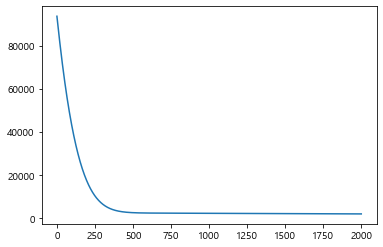

In [83]:
model=Sequential()

# layer, 즉 히든계층을 만들겠다.
model.add(Dense(units=1,input_shape=(2,))) 
model.compile(loss='mse',optimizer=Adam(lr=0.01))#비용 어떻게 구하고 최저비용을 어떻게 구하는지

result=model.fit(x_data,y_data,epochs=2000)
plt.plot(result.history['loss'])

In [84]:
print('예측값 :',model.predict(np.array([[100.,40]])))

예측값 : [[373.4748]]


In [79]:
np.random.seed(7)
data = np.genfromtxt('data/x09.txt',skip_header=36)
data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 92415.5703
Epoch 2/500
25/25 [==============================] - 0s 80us/step - loss: 91758.8594
Epoch 3/500
25/25 [==============================] - 0s 40us/step - loss: 91104.6406
Epoch 4/500
25/25 [==============================] - 0s 78us/step - loss: 90452.9688
Epoch 5/500
25/25 [==============================] - 0s 98us/step - loss: 89803.8906
Epoch 6/500
25/25 [==============================] - 0s 120us/step - loss: 89157.4375
Epoch 7/500
25/25 [==============================] - 0s 80us/step - loss: 88513.6719
Epoch 8/500
25/25 [==============================] - 0s 116us/step - loss: 87872.6016
Epoch 9/500
25/25 [==============================] - 0s 117us/step - loss: 87234.2812
Epoch 10/500
25/25 [==============================] - 0s 78us/step - loss: 86598.7578
Epoch 11/500
25/25 [==============================] - 0s 146us/step - loss: 85966.0391
Epoch 12/500
25/25 [==============================] - 0s 186

Epoch 96/500
25/25 [==============================] - 0s 80us/step - loss: 43619.6484
Epoch 97/500
25/25 [==============================] - 0s 207us/step - loss: 43250.2812
Epoch 98/500
25/25 [==============================] - 0s 204us/step - loss: 42883.6055
Epoch 99/500
25/25 [==============================] - 0s 85us/step - loss: 42517.8359
Epoch 100/500
25/25 [==============================] - 0s 191us/step - loss: 42154.7695
Epoch 101/500
25/25 [==============================] - 0s 71us/step - loss: 41794.3750
Epoch 102/500
25/25 [==============================] - 0s 80us/step - loss: 41436.6562
Epoch 103/500
25/25 [==============================] - 0s 160us/step - loss: 41081.6016
Epoch 104/500
25/25 [==============================] - 0s 80us/step - loss: 40729.1797
Epoch 105/500
25/25 [==============================] - 0s 153us/step - loss: 40379.3984
Epoch 106/500
25/25 [==============================] - 0s 159us/step - loss: 40033.7812
Epoch 107/500
25/25 [====================

Epoch 190/500
25/25 [==============================] - 0s 40us/step - loss: 18946.3242
Epoch 191/500
25/25 [==============================] - 0s 101us/step - loss: 18775.8496
Epoch 192/500
25/25 [==============================] - 0s 237us/step - loss: 18606.9531
Epoch 193/500
25/25 [==============================] - 0s 120us/step - loss: 18440.0098
Epoch 194/500
25/25 [==============================] - 0s 119us/step - loss: 18274.6191
Epoch 195/500
25/25 [==============================] - 0s 99us/step - loss: 18110.3906
Epoch 196/500
25/25 [==============================] - 0s 120us/step - loss: 17948.0664
Epoch 197/500
25/25 [==============================] - 0s 40us/step - loss: 17787.2637
Epoch 198/500
25/25 [==============================] - 0s 84us/step - loss: 17627.6016
Epoch 199/500
25/25 [==============================] - 0s 40us/step - loss: 17469.4453
Epoch 200/500
25/25 [==============================] - 0s 54us/step - loss: 17312.7832
Epoch 201/500
25/25 [=================

Epoch 284/500
25/25 [==============================] - 0s 48us/step - loss: 8500.7764
Epoch 285/500
25/25 [==============================] - 0s 104us/step - loss: 8436.7217
Epoch 286/500
25/25 [==============================] - 0s 53us/step - loss: 8373.5010
Epoch 287/500
25/25 [==============================] - 0s 226us/step - loss: 8310.9160
Epoch 288/500
25/25 [==============================] - 0s 159us/step - loss: 8249.1475
Epoch 289/500
25/25 [==============================] - 0s 66us/step - loss: 8188.0938
Epoch 290/500
25/25 [==============================] - 0s 120us/step - loss: 8127.7505
Epoch 291/500
25/25 [==============================] - 0s 200us/step - loss: 8068.1079
Epoch 292/500
25/25 [==============================] - 0s 84us/step - loss: 8009.0737
Epoch 293/500
25/25 [==============================] - 0s 57us/step - loss: 7950.7300
Epoch 294/500
25/25 [==============================] - 0s 100us/step - loss: 7893.0718
Epoch 295/500
25/25 [===========================

Epoch 379/500
25/25 [==============================] - 0s 71us/step - loss: 4888.3735
Epoch 380/500
25/25 [==============================] - 0s 197us/step - loss: 4869.2700
Epoch 381/500
25/25 [==============================] - 0s 80us/step - loss: 4850.4502
Epoch 382/500
25/25 [==============================] - 0s 170us/step - loss: 4831.8687
Epoch 383/500
25/25 [==============================] - 0s 107us/step - loss: 4813.5615
Epoch 384/500
25/25 [==============================] - 0s 165us/step - loss: 4795.5088
Epoch 385/500
25/25 [==============================] - 0s 51us/step - loss: 4777.6846
Epoch 386/500
25/25 [==============================] - 0s 60us/step - loss: 4760.1084
Epoch 387/500
25/25 [==============================] - 0s 85us/step - loss: 4742.7749
Epoch 388/500
25/25 [==============================] - 0s 240us/step - loss: 4725.6816
Epoch 389/500
25/25 [==============================] - 0s 79us/step - loss: 4708.8447
Epoch 390/500
25/25 [============================

Epoch 474/500
25/25 [==============================] - 0s 118us/step - loss: 3887.9695
Epoch 475/500
25/25 [==============================] - 0s 120us/step - loss: 3883.1343
Epoch 476/500
25/25 [==============================] - 0s 181us/step - loss: 3878.3652
Epoch 477/500
25/25 [==============================] - 0s 88us/step - loss: 3873.6689
Epoch 478/500
25/25 [==============================] - 0s 82us/step - loss: 3869.0376
Epoch 479/500
25/25 [==============================] - 0s 65us/step - loss: 3864.4717
Epoch 480/500
25/25 [==============================] - 0s 119us/step - loss: 3859.9724
Epoch 481/500
25/25 [==============================] - 0s 34us/step - loss: 3855.5376
Epoch 482/500
25/25 [==============================] - 0s 104us/step - loss: 3851.1711
Epoch 483/500
25/25 [==============================] - 0s 30us/step - loss: 3846.8662
Epoch 484/500
25/25 [==============================] - 0s 111us/step - loss: 3842.6201
Epoch 485/500
25/25 [===========================

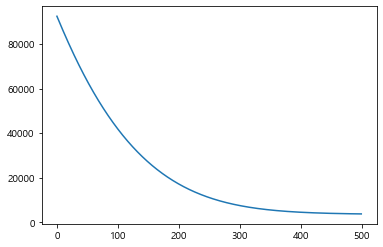

In [86]:
X= np.array(data[:,2:4],dtype=np.float32)
y= np.array(data[:,4],dtype=np.float32)
model=Sequential()

# layer, 즉 히든계층을 만들겠다.
model.add(Dense(units=1,input_shape=(2,))) 
model.compile(loss='mse',optimizer=Adam(lr=0.01))#비용 어떻게 구하고 최저비용을 어떻게 구하는지

result=model.fit(x_data,y_data,epochs=500)
plt.plot(result.history['loss'])

In [87]:
print('예측값 :',model.predict(np.array([[100.,40]])))

예측값 : [[398.4487]]


Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 56240.0117
Epoch 2/500
25/25 [==============================] - 0s 120us/step - loss: 54906.3359
Epoch 3/500
25/25 [==============================] - 0s 110us/step - loss: 53606.7266
Epoch 4/500
25/25 [==============================] - 0s 64us/step - loss: 52340.3164
Epoch 5/500
25/25 [==============================] - 0s 105us/step - loss: 51106.2383
Epoch 6/500
25/25 [==============================] - 0s 91us/step - loss: 49903.6914
Epoch 7/500
25/25 [==============================] - 0s 120us/step - loss: 48731.8594
Epoch 8/500
25/25 [==============================] - 0s 75us/step - loss: 47589.9453
Epoch 9/500
25/25 [==============================] - 0s 112us/step - loss: 46477.2031
Epoch 10/500
25/25 [==============================] - 0s 120us/step - loss: 45392.8867
Epoch 11/500
25/25 [==============================] - 0s 160us/step - loss: 44336.2461
Epoch 12/500
25/25 [==============================] - 0s 

Epoch 97/500
25/25 [==============================] - 0s 34us/step - loss: 8349.9150
Epoch 98/500
25/25 [==============================] - 0s 94us/step - loss: 8237.9824
Epoch 99/500
25/25 [==============================] - 0s 65us/step - loss: 8128.8877
Epoch 100/500
25/25 [==============================] - 0s 45us/step - loss: 8022.5566
Epoch 101/500
25/25 [==============================] - 0s 75us/step - loss: 7918.9189
Epoch 102/500
25/25 [==============================] - 0s 78us/step - loss: 7817.9048
Epoch 103/500
25/25 [==============================] - 0s 40us/step - loss: 7719.4492
Epoch 104/500
25/25 [==============================] - 0s 81us/step - loss: 7623.4844
Epoch 105/500
25/25 [==============================] - 0s 120us/step - loss: 7529.9482
Epoch 106/500
25/25 [==============================] - 0s 40us/step - loss: 7438.7788
Epoch 107/500
25/25 [==============================] - 0s 106us/step - loss: 7349.9146
Epoch 108/500
25/25 [==============================] - 

Epoch 193/500
25/25 [==============================] - 0s 51us/step - loss: 4278.4380
Epoch 194/500
25/25 [==============================] - 0s 30us/step - loss: 4268.2593
Epoch 195/500
25/25 [==============================] - 0s 77us/step - loss: 4258.3169
Epoch 196/500
25/25 [==============================] - 0s 83us/step - loss: 4248.6045
Epoch 197/500
25/25 [==============================] - 0s 272us/step - loss: 4239.1172
Epoch 198/500
25/25 [==============================] - 0s 40us/step - loss: 4229.8481
Epoch 199/500
25/25 [==============================] - 0s 81us/step - loss: 4220.7930
Epoch 200/500
25/25 [==============================] - 0s 120us/step - loss: 4211.9453
Epoch 201/500
25/25 [==============================] - 0s 120us/step - loss: 4203.3008
Epoch 202/500
25/25 [==============================] - 0s 79us/step - loss: 4194.8535
Epoch 203/500
25/25 [==============================] - 0s 88us/step - loss: 4186.5991
Epoch 204/500
25/25 [==============================

25/25 [==============================] - 0s 67us/step - loss: 3860.3613
Epoch 289/500
25/25 [==============================] - 0s 72us/step - loss: 3858.6709
Epoch 290/500
25/25 [==============================] - 0s 75us/step - loss: 3857.0000
Epoch 291/500
25/25 [==============================] - 0s 75us/step - loss: 3855.3501
Epoch 292/500
25/25 [==============================] - 0s 80us/step - loss: 3853.7195
Epoch 293/500
25/25 [==============================] - 0s 98us/step - loss: 3852.1072
Epoch 294/500
25/25 [==============================] - 0s 73us/step - loss: 3850.5149
Epoch 295/500
25/25 [==============================] - 0s 79us/step - loss: 3848.9395
Epoch 296/500
25/25 [==============================] - 0s 153us/step - loss: 3847.3828
Epoch 297/500
25/25 [==============================] - 0s 80us/step - loss: 3845.8423
Epoch 298/500
25/25 [==============================] - 0s 40us/step - loss: 3844.3196
Epoch 299/500
25/25 [==============================] - 0s 80us/step

Epoch 384/500
25/25 [==============================] - 0s 134us/step - loss: 3747.3657
Epoch 385/500
25/25 [==============================] - 0s 80us/step - loss: 3746.4377
Epoch 386/500
25/25 [==============================] - 0s 399us/step - loss: 3745.5115
Epoch 387/500
25/25 [==============================] - 0s 114us/step - loss: 3744.5872
Epoch 388/500
25/25 [==============================] - 0s 199us/step - loss: 3743.6650
Epoch 389/500
25/25 [==============================] - 0s 120us/step - loss: 3742.7463
Epoch 390/500
25/25 [==============================] - 0s 82us/step - loss: 3741.8269
Epoch 391/500
25/25 [==============================] - 0s 118us/step - loss: 3740.9104
Epoch 392/500
25/25 [==============================] - 0s 74us/step - loss: 3739.9966
Epoch 393/500
25/25 [==============================] - 0s 124us/step - loss: 3739.0835
Epoch 394/500
25/25 [==============================] - 0s 80us/step - loss: 3738.1716
Epoch 395/500
25/25 [==========================

Epoch 479/500
25/25 [==============================] - 0s 80us/step - loss: 3664.8328
Epoch 480/500
25/25 [==============================] - 0s 152us/step - loss: 3664.0020
Epoch 481/500
25/25 [==============================] - 0s 120us/step - loss: 3663.1719
Epoch 482/500
25/25 [==============================] - 0s 80us/step - loss: 3662.3416
Epoch 483/500
25/25 [==============================] - 0s 40us/step - loss: 3661.5120
Epoch 484/500
25/25 [==============================] - 0s 108us/step - loss: 3660.6829
Epoch 485/500
25/25 [==============================] - 0s 31us/step - loss: 3659.8545
Epoch 486/500
25/25 [==============================] - 0s 45us/step - loss: 3659.0269
Epoch 487/500
25/25 [==============================] - 0s 73us/step - loss: 3658.1987
Epoch 488/500
25/25 [==============================] - 0s 120us/step - loss: 3657.3726
Epoch 489/500
25/25 [==============================] - 0s 80us/step - loss: 3656.5459
Epoch 490/500
25/25 [=============================

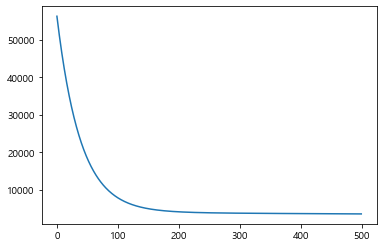

In [88]:
X= np.array(data[:,2:4],dtype=np.float32)
y= np.array(data[:,4],dtype=np.float32)
model=Sequential()

# layer, 즉 히든계층을 만들겠다.
model.add(Dense(units=1,input_shape=(2,))) 
model.compile(loss='mse',optimizer=SGD(lr=1e-6))#비용 어떻게 구하고 최저비용을 어떻게 구하는지

result=model.fit(x_data,y_data,epochs=500)
plt.plot(result.history['loss'])

In [89]:
print('예측값 :',model.predict(np.array([[100.,40]])))

예측값 : [[412.1762]]


Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 83436.2578
Epoch 2/500
25/25 [==============================] - 0s 155us/step - loss: 81468.3984
Epoch 3/500
25/25 [==============================] - 0s 80us/step - loss: 80064.3281
Epoch 4/500
25/25 [==============================] - 0s 51us/step - loss: 78902.5938
Epoch 5/500
25/25 [==============================] - 0s 85us/step - loss: 77881.4609
Epoch 6/500
25/25 [==============================] - 0s 58us/step - loss: 76953.8359
Epoch 7/500
25/25 [==============================] - 0s 77us/step - loss: 76093.5234
Epoch 8/500
25/25 [==============================] - 0s 33us/step - loss: 75284.2031
Epoch 9/500
25/25 [==============================] - 0s 56us/step - loss: 74515.0078
Epoch 10/500
25/25 [==============================] - 0s 36us/step - loss: 73778.2656
Epoch 11/500
25/25 [==============================] - 0s 76us/step - loss: 73068.3125
Epoch 12/500
25/25 [==============================] - 0s 110us/

Epoch 97/500
25/25 [==============================] - 0s 110us/step - loss: 32528.0273
Epoch 98/500
25/25 [==============================] - 0s 85us/step - loss: 32170.6543
Epoch 99/500
25/25 [==============================] - 0s 122us/step - loss: 31815.5781
Epoch 100/500
25/25 [==============================] - 0s 87us/step - loss: 31462.8105
Epoch 101/500
25/25 [==============================] - 0s 40us/step - loss: 31112.3379
Epoch 102/500
25/25 [==============================] - 0s 40us/step - loss: 30764.1641
Epoch 103/500
25/25 [==============================] - 0s 40us/step - loss: 30418.2871
Epoch 104/500
25/25 [==============================] - 0s 80us/step - loss: 30074.7129
Epoch 105/500
25/25 [==============================] - 0s 122us/step - loss: 29733.4316
Epoch 106/500
25/25 [==============================] - 0s 60us/step - loss: 29394.4492
Epoch 107/500
25/25 [==============================] - 0s 161us/step - loss: 29057.7559
Epoch 108/500
25/25 [=====================

Epoch 191/500
25/25 [==============================] - 0s 120us/step - loss: 8832.4902
Epoch 192/500
25/25 [==============================] - 0s 104us/step - loss: 8685.4053
Epoch 193/500
25/25 [==============================] - 0s 82us/step - loss: 8540.4482
Epoch 194/500
25/25 [==============================] - 0s 94us/step - loss: 8397.6172
Epoch 195/500
25/25 [==============================] - 0s 84us/step - loss: 8256.9062
Epoch 196/500
25/25 [==============================] - 0s 79us/step - loss: 8118.3105
Epoch 197/500
25/25 [==============================] - 0s 82us/step - loss: 7981.8296
Epoch 198/500
25/25 [==============================] - 0s 105us/step - loss: 7847.4556
Epoch 199/500
25/25 [==============================] - 0s 119us/step - loss: 7715.1855
Epoch 200/500
25/25 [==============================] - 0s 77us/step - loss: 7585.0161
Epoch 201/500
25/25 [==============================] - 0s 60us/step - loss: 7456.9419
Epoch 202/500
25/25 [=============================

Epoch 286/500
25/25 [==============================] - 0s 160us/step - loss: 3069.7173
Epoch 287/500
25/25 [==============================] - 0s 77us/step - loss: 3064.0884
Epoch 288/500
25/25 [==============================] - 0s 96us/step - loss: 3058.3757
Epoch 289/500
25/25 [==============================] - 0s 99us/step - loss: 3052.5618
Epoch 290/500
25/25 [==============================] - 0s 80us/step - loss: 3046.6343
Epoch 291/500
25/25 [==============================] - 0s 78us/step - loss: 3040.5852
Epoch 292/500
25/25 [==============================] - 0s 57us/step - loss: 3034.4106
Epoch 293/500
25/25 [==============================] - 0s 88us/step - loss: 3028.1086
Epoch 294/500
25/25 [==============================] - 0s 120us/step - loss: 3021.6794
Epoch 295/500
25/25 [==============================] - 0s 97us/step - loss: 3015.1274
Epoch 296/500
25/25 [==============================] - 0s 64us/step - loss: 3008.4568
Epoch 297/500
25/25 [==============================]

Epoch 382/500
25/25 [==============================] - 0s 79us/step - loss: 2419.3953
Epoch 383/500
25/25 [==============================] - 0s 79us/step - loss: 2413.7822
Epoch 384/500
25/25 [==============================] - 0s 80us/step - loss: 2408.2490
Epoch 385/500
25/25 [==============================] - 0s 91us/step - loss: 2402.7390
Epoch 386/500
25/25 [==============================] - 0s 45us/step - loss: 2397.2578
Epoch 387/500
25/25 [==============================] - 0s 80us/step - loss: 2391.7961
Epoch 388/500
25/25 [==============================] - 0s 118us/step - loss: 2386.3596
Epoch 389/500
25/25 [==============================] - 0s 59us/step - loss: 2380.9451
Epoch 390/500
25/25 [==============================] - 0s 80us/step - loss: 2375.5566
Epoch 391/500
25/25 [==============================] - 0s 108us/step - loss: 2370.1912
Epoch 392/500
25/25 [==============================] - 0s 160us/step - loss: 2364.8523
Epoch 393/500
25/25 [==============================

Epoch 478/500
25/25 [==============================] - 0s 80us/step - loss: 2016.1262
Epoch 479/500
25/25 [==============================] - 0s 74us/step - loss: 2013.3035
Epoch 480/500
25/25 [==============================] - 0s 77us/step - loss: 2010.5359
Epoch 481/500
25/25 [==============================] - 0s 80us/step - loss: 2007.7705
Epoch 482/500
25/25 [==============================] - 0s 62us/step - loss: 2005.0619
Epoch 483/500
25/25 [==============================] - 0s 82us/step - loss: 2002.3519
Epoch 484/500
25/25 [==============================] - 0s 160us/step - loss: 1999.7008
Epoch 485/500
25/25 [==============================] - 0s 113us/step - loss: 1997.0453
Epoch 486/500
25/25 [==============================] - 0s 38us/step - loss: 1994.4502
Epoch 487/500
25/25 [==============================] - 0s 81us/step - loss: 1991.8492
Epoch 488/500
25/25 [==============================] - 0s 48us/step - loss: 1989.3076
Epoch 489/500
25/25 [==============================]

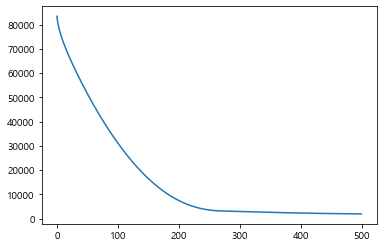

In [91]:
X= np.array(data[:,2:4],dtype=np.float32)
y= np.array(data[:,4],dtype=np.float32)
model=Sequential()

# layer, 즉 히든계층을 만들겠다.
model.add(Dense(units=1,input_shape=(2,))) 
model.compile(loss='mse',optimizer=RMSprop(lr=0.01))# 선형회귀에서는 RMSprop를 많이 씀 

result=model.fit(x_data,y_data,epochs=500)
plt.plot(result.history['loss'])

In [92]:
print('예측값 :',model.predict(np.array([[100.,40]])))

예측값 : [[365.04404]]


## 4) Boston Housing Sample

In [93]:
from keras.datasets import boston_housing

(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

57344/57026 [==============================] - 1s 14us/step


In [94]:
print(X_train.shape,X_test.shape)

(404, 13) (102, 13)


In [111]:
##### 정규화 
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis = 0)

X_train/=std
X_test-=mean
X_test /= std

#### Deep & Wide : 3 개의 레이어, 64개의 입출력 갯수


Epoch 1/100
404/404 [==============================] - 1s 2ms/step - loss: 157.3004 - mae: 8.6932A: 0s - loss: 277.8962 - mae:
Epoch 2/100
404/404 [==============================] - 0s 1ms/step - loss: 21.4209 - mae: 3.1453
Epoch 3/100
404/404 [==============================] - 0s 1ms/step - loss: 16.7551 - mae: 2.7968
Epoch 4/100
404/404 [==============================] - 0s 1ms/step - loss: 13.2158 - mae: 2.4802
Epoch 5/100
404/404 [==============================] - 0s 1ms/step - loss: 11.9909 - mae: 2.4309
Epoch 6/100
404/404 [==============================] - 0s 1ms/step - loss: 11.4132 - mae: 2.3671
Epoch 7/100
404/404 [==============================] - 0s 1ms/step - loss: 10.7353 - mae: 2.3003
Epoch 8/100
404/404 [==============================] - 0s 1ms/step - loss: 10.7112 - mae: 2.2305
Epoch 9/100
404/404 [==============================] - 0s 1ms/step - loss: 10.3777 - mae: 2.2481
Epoch 10/100
404/404 [==============================] - 0s 1ms/step - loss: 9.9104 - mae: 2.1817


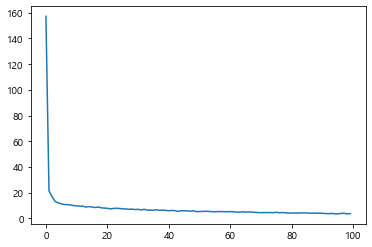

In [112]:
model = Sequential()
model.add(Dense(64,input_shape=(13,),activation='relu'))
model.add(Dense(64,activation='relu'))# 어차피 64개 넣을꺼 아니까 생략이 가능
model.add(Dense(1))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mae']) # mae 평균 절대 오차
result=model.fit(X_train,y_train,epochs=100,batch_size=1)# mini 배치도 할 수 있음 
plt.plot(result.history['loss'])

In [100]:
# 정규화 하지 않았을 때 
model.summary()
# Param  가중치 훈련에 사용됬던 파라미터

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 성능확인 
mes,mae=model.evaluate(X_test,y_test)
print(mes,mae)# 오차값이니까 작으면 작을수록 좋은 것. --> 튜닝을 통해 이 값들을 작게 할 수 있는 것을 찾아야 함.

102/102 [==============================] - 0s 61us/step
29.32465990851907 3.7193994522094727


In [113]:
# 정규화를 했을 때 --> 깃허브 확인할 것 
mes,mae=model.evaluate(X_test,y_test)
print(mes,mae)

102/102 [==============================] - 0s 1ms/step
518861.63909313723 668.2572021484375


### (3) 분류 알고리즘 

#### 1) Tensorflow를 이용한 로지스틱 회귀

In [114]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X = tf.placeholder(tf.float32,shape=[None,2])
y = tf.placeholder(tf.float32,shape=[None,1])

W = tf.Variable(tf.random_normal([2,1])) # x,y 출력갯수
b = tf.Variable(tf.random_normal([1])) # 출력의 갯수

print('---------선형회귀랑 여기까진 같음-------------') 

# 가설
hypot = tf.sigmoid(tf.matmul(X,W)+b)

# 비용 - 오차값이 얼마인지
# y 값이 0일때 1일때를 합친 공식
cost = -tf.reduce_mean(y * tf.math.log(hypot) + (1 - y) * tf.math.log(1 - hypot)) 

# 최소비용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(15000):
    _,h=sess.run([train,hypot],feed_dict={X:x_data,y:y_data})
    if step%200 ==0 :# 200 개의 1개씩 보여주기 
        print(step,h)
        
preds =tf.cast(hypot > 0.5,dtype=tf.float32)
sess.run(preds,feed_dict={X:x_data,y:y_data})

# 맞은 갯수 평균
accuracy=tf.reduce_mean(tf.cast(tf.equal(preds,y),dtype=tf.float32))
accuracy

h,p,a=sess.run([hypot,preds,accuracy],feed_dict={X:x_data,y:y_data})
print(h)
print(p)
print(a)

---------선형회귀랑 여기까진 같음-------------
0 [[3.5739336e-02]
 [7.9169068e-03]
 [1.0492891e-03]
 [2.6639632e-04]
 [4.8690155e-05]
 [7.5516100e-06]]
200 [[0.43677855]
 [0.6518273 ]
 [0.38814715]
 [0.7466313 ]
 [0.7871026 ]
 [0.70679426]]
400 [[0.29970726]
 [0.4915278 ]
 [0.44124103]
 [0.7145701 ]
 [0.80114615]
 [0.8220429 ]]
600 [[0.2268959 ]
 [0.39422113]
 [0.4747539 ]
 [0.70081425]
 [0.8163136 ]
 [0.87825733]]
800 [[0.18434428]
 [0.33483484]
 [0.49429563]
 [0.6950227 ]
 [0.82902884]
 [0.90788466]]
1000 [[0.15695791]
 [0.296575  ]
 [0.50456196]
 [0.6929859 ]
 [0.83929676]
 [0.9250761 ]]
1200 [[0.13795114]
 [0.27063054]
 [0.50870633]
 [0.6929739 ]
 [0.84771657]
 [0.93591416]]
1400 [[0.12396684]
 [0.25227714]
 [0.5087512 ]
 [0.6941695 ]
 [0.85480297]
 [0.9432183 ]]
1600 [[0.11319097]
 [0.23883235]
 [0.5060092 ]
 [0.69613147]
 [0.860921  ]
 [0.94841367]]
1800 [[0.10457071]
 [0.22868592]
 [0.50135666]
 [0.69859725]
 [0.866321  ]
 [0.9522794 ]]
2000 [[0.09745918]
 [0.22082327]
 [0.49539343]
 [0.70

In [133]:
x_data = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_data = np.array([[0], [0], [0], [1], [1], [1]])

model = Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid')) #input_shape=(x,) = input_dim=x
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['binary_accuracy']) 
result=model.fit(x_data,y_data,epochs=1000)# mini 배치도 할 수 있음 


Epoch 1/1000
6/6 [==============================] - 0s 29ms/step - loss: 1.2983 - binary_accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 335us/step - loss: 1.2639 - binary_accuracy: 0.5000
Epoch 3/1000
6/6 [==============================] - 0s 374us/step - loss: 1.2300 - binary_accuracy: 0.5000
Epoch 4/1000
6/6 [==============================] - 0s 498us/step - loss: 1.1967 - binary_accuracy: 0.5000
Epoch 5/1000
6/6 [==============================] - 0s 498us/step - loss: 1.1640 - binary_accuracy: 0.5000
Epoch 6/1000
6/6 [==============================] - 0s 499us/step - loss: 1.1320 - binary_accuracy: 0.5000
Epoch 7/1000
6/6 [==============================] - 0s 305us/step - loss: 1.1006 - binary_accuracy: 0.5000
Epoch 8/1000
6/6 [==============================] - 0s 504us/step - loss: 1.0700 - binary_accuracy: 0.5000
Epoch 9/1000
6/6 [==============================] - 0s 431us/step - loss: 1.0401 - binary_accuracy: 0.5000
Epoch 10/1000
6/6 [===================

Epoch 77/1000
6/6 [==============================] - 0s 331us/step - loss: 0.5374 - binary_accuracy: 0.8333
Epoch 78/1000
6/6 [==============================] - 0s 333us/step - loss: 0.5367 - binary_accuracy: 0.8333
Epoch 79/1000
6/6 [==============================] - 0s 154us/step - loss: 0.5360 - binary_accuracy: 0.8333
Epoch 80/1000
6/6 [==============================] - 0s 213us/step - loss: 0.5354 - binary_accuracy: 0.8333
Epoch 81/1000
6/6 [==============================] - 0s 332us/step - loss: 0.5347 - binary_accuracy: 0.8333
Epoch 82/1000
6/6 [==============================] - 0s 553us/step - loss: 0.5340 - binary_accuracy: 0.8333
Epoch 83/1000
6/6 [==============================] - 0s 326us/step - loss: 0.5333 - binary_accuracy: 0.8333
Epoch 84/1000
6/6 [==============================] - 0s 544us/step - loss: 0.5327 - binary_accuracy: 0.8333
Epoch 85/1000
6/6 [==============================] - 0s 261us/step - loss: 0.5320 - binary_accuracy: 0.8333
Epoch 86/1000
6/6 [=========

Epoch 153/1000
6/6 [==============================] - 0s 332us/step - loss: 0.4862 - binary_accuracy: 0.8333
Epoch 154/1000
6/6 [==============================] - 0s 386us/step - loss: 0.4855 - binary_accuracy: 0.8333
Epoch 155/1000
6/6 [==============================] - 0s 328us/step - loss: 0.4848 - binary_accuracy: 0.8333
Epoch 156/1000
6/6 [==============================] - 0s 333us/step - loss: 0.4842 - binary_accuracy: 0.8333
Epoch 157/1000
6/6 [==============================] - 0s 325us/step - loss: 0.4835 - binary_accuracy: 0.8333
Epoch 158/1000
6/6 [==============================] - 0s 169us/step - loss: 0.4828 - binary_accuracy: 0.8333
Epoch 159/1000
6/6 [==============================] - 0s 290us/step - loss: 0.4822 - binary_accuracy: 0.8333
Epoch 160/1000
6/6 [==============================] - 0s 332us/step - loss: 0.4815 - binary_accuracy: 0.8333
Epoch 161/1000
6/6 [==============================] - 0s 399us/step - loss: 0.4808 - binary_accuracy: 0.8333
Epoch 162/1000
6/6 

Epoch 229/1000
6/6 [==============================] - 0s 243us/step - loss: 0.4366 - binary_accuracy: 0.8333
Epoch 230/1000
6/6 [==============================] - 0s 305us/step - loss: 0.4360 - binary_accuracy: 0.8333
Epoch 231/1000
6/6 [==============================] - 0s 350us/step - loss: 0.4353 - binary_accuracy: 0.8333
Epoch 232/1000
6/6 [==============================] - 0s 267us/step - loss: 0.4347 - binary_accuracy: 0.8333
Epoch 233/1000
6/6 [==============================] - 0s 332us/step - loss: 0.4341 - binary_accuracy: 0.8333
Epoch 234/1000
6/6 [==============================] - 0s 333us/step - loss: 0.4335 - binary_accuracy: 0.8333
Epoch 235/1000
6/6 [==============================] - 0s 209us/step - loss: 0.4328 - binary_accuracy: 0.8333
Epoch 236/1000
6/6 [==============================] - 0s 366us/step - loss: 0.4322 - binary_accuracy: 0.8333
Epoch 237/1000
6/6 [==============================] - 0s 331us/step - loss: 0.4316 - binary_accuracy: 0.8333
Epoch 238/1000
6/6 

Epoch 305/1000
6/6 [==============================] - 0s 337us/step - loss: 0.3909 - binary_accuracy: 0.8333
Epoch 306/1000
6/6 [==============================] - 0s 320us/step - loss: 0.3904 - binary_accuracy: 0.8333
Epoch 307/1000
6/6 [==============================] - 0s 332us/step - loss: 0.3898 - binary_accuracy: 0.8333
Epoch 308/1000
6/6 [==============================] - 0s 342us/step - loss: 0.3892 - binary_accuracy: 0.8333
Epoch 309/1000
6/6 [==============================] - 0s 332us/step - loss: 0.3887 - binary_accuracy: 0.8333
Epoch 310/1000
6/6 [==============================] - 0s 323us/step - loss: 0.3881 - binary_accuracy: 0.8333
Epoch 311/1000
6/6 [==============================] - 0s 300us/step - loss: 0.3875 - binary_accuracy: 0.8333
Epoch 312/1000
6/6 [==============================] - 0s 329us/step - loss: 0.3870 - binary_accuracy: 0.8333
Epoch 313/1000
6/6 [==============================] - 0s 332us/step - loss: 0.3864 - binary_accuracy: 0.8333
Epoch 314/1000
6/6 

Epoch 381/1000
6/6 [==============================] - 0s 335us/step - loss: 0.3497 - binary_accuracy: 0.8333
Epoch 382/1000
6/6 [==============================] - 0s 195us/step - loss: 0.3492 - binary_accuracy: 0.8333
Epoch 383/1000
6/6 [==============================] - 0s 353us/step - loss: 0.3487 - binary_accuracy: 0.8333
Epoch 384/1000
6/6 [==============================] - 0s 332us/step - loss: 0.3482 - binary_accuracy: 0.8333
Epoch 385/1000
6/6 [==============================] - 0s 343us/step - loss: 0.3476 - binary_accuracy: 0.8333
Epoch 386/1000
6/6 [==============================] - 0s 499us/step - loss: 0.3471 - binary_accuracy: 0.8333
Epoch 387/1000
6/6 [==============================] - 0s 359us/step - loss: 0.3466 - binary_accuracy: 0.8333
Epoch 388/1000
6/6 [==============================] - 0s 341us/step - loss: 0.3461 - binary_accuracy: 0.8333
Epoch 389/1000
6/6 [==============================] - 0s 132us/step - loss: 0.3456 - binary_accuracy: 0.8333
Epoch 390/1000
6/6 

Epoch 457/1000
6/6 [==============================] - 0s 184us/step - loss: 0.3128 - binary_accuracy: 0.8333
Epoch 458/1000
6/6 [==============================] - 0s 484us/step - loss: 0.3124 - binary_accuracy: 0.8333
Epoch 459/1000
6/6 [==============================] - 0s 297us/step - loss: 0.3119 - binary_accuracy: 0.8333
Epoch 460/1000
6/6 [==============================] - 0s 320us/step - loss: 0.3115 - binary_accuracy: 0.8333
Epoch 461/1000
6/6 [==============================] - 0s 294us/step - loss: 0.3110 - binary_accuracy: 0.8333
Epoch 462/1000
6/6 [==============================] - 0s 327us/step - loss: 0.3106 - binary_accuracy: 0.8333
Epoch 463/1000
6/6 [==============================] - 0s 411us/step - loss: 0.3101 - binary_accuracy: 0.8333
Epoch 464/1000
6/6 [==============================] - 0s 246us/step - loss: 0.3097 - binary_accuracy: 0.8333
Epoch 465/1000
6/6 [==============================] - 0s 281us/step - loss: 0.3092 - binary_accuracy: 0.8333
Epoch 466/1000
6/6 

Epoch 533/1000
6/6 [==============================] - 0s 296us/step - loss: 0.2803 - binary_accuracy: 0.8333
Epoch 534/1000
6/6 [==============================] - 0s 360us/step - loss: 0.2799 - binary_accuracy: 0.8333
Epoch 535/1000
6/6 [==============================] - 0s 482us/step - loss: 0.2795 - binary_accuracy: 0.8333
Epoch 536/1000
6/6 [==============================] - 0s 212us/step - loss: 0.2791 - binary_accuracy: 0.8333
Epoch 537/1000
6/6 [==============================] - 0s 189us/step - loss: 0.2787 - binary_accuracy: 0.8333
Epoch 538/1000
6/6 [==============================] - 0s 370us/step - loss: 0.2783 - binary_accuracy: 0.8333
Epoch 539/1000
6/6 [==============================] - 0s 471us/step - loss: 0.2779 - binary_accuracy: 0.8333
Epoch 540/1000
6/6 [==============================] - 0s 169us/step - loss: 0.2775 - binary_accuracy: 0.8333
Epoch 541/1000
6/6 [==============================] - 0s 332us/step - loss: 0.2771 - binary_accuracy: 0.8333
Epoch 542/1000
6/6 

Epoch 609/1000
6/6 [==============================] - 0s 332us/step - loss: 0.2518 - binary_accuracy: 1.0000
Epoch 610/1000
6/6 [==============================] - 0s 355us/step - loss: 0.2514 - binary_accuracy: 1.0000
Epoch 611/1000
6/6 [==============================] - 0s 333us/step - loss: 0.2511 - binary_accuracy: 1.0000
Epoch 612/1000
6/6 [==============================] - 0s 336us/step - loss: 0.2507 - binary_accuracy: 1.0000
Epoch 613/1000
6/6 [==============================] - 0s 341us/step - loss: 0.2504 - binary_accuracy: 1.0000
Epoch 614/1000
6/6 [==============================] - 0s 498us/step - loss: 0.2500 - binary_accuracy: 1.0000
Epoch 615/1000
6/6 [==============================] - 0s 330us/step - loss: 0.2497 - binary_accuracy: 1.0000
Epoch 616/1000
6/6 [==============================] - 0s 341us/step - loss: 0.2493 - binary_accuracy: 1.0000
Epoch 617/1000
6/6 [==============================] - 0s 166us/step - loss: 0.2490 - binary_accuracy: 1.0000
Epoch 618/1000
6/6 

Epoch 685/1000
6/6 [==============================] - 0s 162us/step - loss: 0.2269 - binary_accuracy: 1.0000
Epoch 686/1000
6/6 [==============================] - 0s 346us/step - loss: 0.2266 - binary_accuracy: 1.0000
Epoch 687/1000
6/6 [==============================] - 0s 334us/step - loss: 0.2263 - binary_accuracy: 1.0000
Epoch 688/1000
6/6 [==============================] - 0s 332us/step - loss: 0.2260 - binary_accuracy: 1.0000
Epoch 689/1000
6/6 [==============================] - 0s 298us/step - loss: 0.2257 - binary_accuracy: 1.0000
Epoch 690/1000
6/6 [==============================] - 0s 356us/step - loss: 0.2254 - binary_accuracy: 1.0000
Epoch 691/1000
6/6 [==============================] - 0s 245us/step - loss: 0.2251 - binary_accuracy: 1.0000
Epoch 692/1000
6/6 [==============================] - 0s 331us/step - loss: 0.2248 - binary_accuracy: 1.0000
Epoch 693/1000
6/6 [==============================] - 0s 330us/step - loss: 0.2245 - binary_accuracy: 1.0000
Epoch 694/1000
6/6 

Epoch 761/1000
6/6 [==============================] - 0s 396us/step - loss: 0.2053 - binary_accuracy: 1.0000
Epoch 762/1000
6/6 [==============================] - 0s 169us/step - loss: 0.2050 - binary_accuracy: 1.0000
Epoch 763/1000
6/6 [==============================] - 0s 407us/step - loss: 0.2048 - binary_accuracy: 1.0000
Epoch 764/1000
6/6 [==============================] - 0s 333us/step - loss: 0.2045 - binary_accuracy: 1.0000
Epoch 765/1000
6/6 [==============================] - 0s 333us/step - loss: 0.2042 - binary_accuracy: 1.0000
Epoch 766/1000
6/6 [==============================] - 0s 332us/step - loss: 0.2040 - binary_accuracy: 1.0000
Epoch 767/1000
6/6 [==============================] - 0s 444us/step - loss: 0.2037 - binary_accuracy: 1.0000
Epoch 768/1000
6/6 [==============================] - 0s 361us/step - loss: 0.2035 - binary_accuracy: 1.0000
Epoch 769/1000
6/6 [==============================] - 0s 213us/step - loss: 0.2032 - binary_accuracy: 1.0000
Epoch 770/1000
6/6 

Epoch 837/1000
6/6 [==============================] - 0s 331us/step - loss: 0.1865 - binary_accuracy: 1.0000
Epoch 838/1000
6/6 [==============================] - 0s 443us/step - loss: 0.1862 - binary_accuracy: 1.0000
Epoch 839/1000
6/6 [==============================] - 0s 292us/step - loss: 0.1860 - binary_accuracy: 1.0000
Epoch 840/1000
6/6 [==============================] - 0s 131us/step - loss: 0.1858 - binary_accuracy: 1.0000
Epoch 841/1000
6/6 [==============================] - 0s 341us/step - loss: 0.1856 - binary_accuracy: 1.0000
Epoch 842/1000
6/6 [==============================] - 0s 286us/step - loss: 0.1853 - binary_accuracy: 1.0000
Epoch 843/1000
6/6 [==============================] - 0s 350us/step - loss: 0.1851 - binary_accuracy: 1.0000
Epoch 844/1000
6/6 [==============================] - 0s 323us/step - loss: 0.1849 - binary_accuracy: 1.0000
Epoch 845/1000
6/6 [==============================] - 0s 373us/step - loss: 0.1846 - binary_accuracy: 1.0000
Epoch 846/1000
6/6 

Epoch 913/1000
6/6 [==============================] - 0s 303us/step - loss: 0.1701 - binary_accuracy: 1.0000
Epoch 914/1000
6/6 [==============================] - 0s 344us/step - loss: 0.1699 - binary_accuracy: 1.0000
Epoch 915/1000
6/6 [==============================] - 0s 291us/step - loss: 0.1696 - binary_accuracy: 1.0000
Epoch 916/1000
6/6 [==============================] - 0s 411us/step - loss: 0.1694 - binary_accuracy: 1.0000
Epoch 917/1000
6/6 [==============================] - 0s 333us/step - loss: 0.1692 - binary_accuracy: 1.0000
Epoch 918/1000
6/6 [==============================] - 0s 280us/step - loss: 0.1690 - binary_accuracy: 1.0000
Epoch 919/1000
6/6 [==============================] - 0s 311us/step - loss: 0.1688 - binary_accuracy: 1.0000
Epoch 920/1000
6/6 [==============================] - 0s 197us/step - loss: 0.1686 - binary_accuracy: 1.0000
Epoch 921/1000
6/6 [==============================] - 0s 291us/step - loss: 0.1684 - binary_accuracy: 1.0000
Epoch 922/1000
6/6 

Epoch 989/1000
6/6 [==============================] - 0s 453us/step - loss: 0.1557 - binary_accuracy: 1.0000
Epoch 990/1000
6/6 [==============================] - 0s 332us/step - loss: 0.1555 - binary_accuracy: 1.0000
Epoch 991/1000
6/6 [==============================] - 0s 252us/step - loss: 0.1553 - binary_accuracy: 1.0000
Epoch 992/1000
6/6 [==============================] - 0s 258us/step - loss: 0.1551 - binary_accuracy: 1.0000
Epoch 993/1000
6/6 [==============================] - 0s 499us/step - loss: 0.1550 - binary_accuracy: 1.0000
Epoch 994/1000
6/6 [==============================] - 0s 336us/step - loss: 0.1548 - binary_accuracy: 1.0000
Epoch 995/1000
6/6 [==============================] - 0s 281us/step - loss: 0.1546 - binary_accuracy: 1.0000
Epoch 996/1000
6/6 [==============================] - 0s 265us/step - loss: 0.1544 - binary_accuracy: 1.0000
Epoch 997/1000
6/6 [==============================] - 0s 446us/step - loss: 0.1543 - binary_accuracy: 1.0000
Epoch 998/1000
6/6 

In [131]:
cost,acc=model.evaluate(x_data,y_data)
print(cost,acc)

6/6 [==============================] - 0s 332us/step
0.22364924848079681 1.0


In [134]:
#히든 레이어 추가 
x_data = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]])
y_data = np.array([[0], [0], [0], [1], [1], [1]])

model = Sequential()
model.add(Dense(32,input_dim=2,activation='relu')) #input_shape=(x,) = input_dim=x
model.add(Dense(1,activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['binary_accuracy']) 
result=model.fit(x_data,y_data,epochs=500)# mini 배치도 할 수 있음 


Epoch 1/500
6/6 [==============================] - 0s 37ms/step - loss: 0.8561 - binary_accuracy: 0.5000
Epoch 2/500
6/6 [==============================] - 0s 237us/step - loss: 0.7492 - binary_accuracy: 0.5000
Epoch 3/500
6/6 [==============================] - 0s 337us/step - loss: 0.6800 - binary_accuracy: 0.5000
Epoch 4/500
6/6 [==============================] - 0s 166us/step - loss: 0.6434 - binary_accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 338us/step - loss: 0.6280 - binary_accuracy: 0.5000
Epoch 6/500
6/6 [==============================] - 0s 378us/step - loss: 0.6213 - binary_accuracy: 0.5000
Epoch 7/500
6/6 [==============================] - 0s 506us/step - loss: 0.6157 - binary_accuracy: 0.5000
Epoch 8/500
6/6 [==============================] - 0s 331us/step - loss: 0.6084 - binary_accuracy: 0.5000
Epoch 9/500
6/6 [==============================] - 0s 585us/step - loss: 0.5980 - binary_accuracy: 0.5000
Epoch 10/500
6/6 [=============================

Epoch 78/500
6/6 [==============================] - 0s 328us/step - loss: 0.2258 - binary_accuracy: 0.8333
Epoch 79/500
6/6 [==============================] - 0s 358us/step - loss: 0.2220 - binary_accuracy: 0.8333
Epoch 80/500
6/6 [==============================] - 0s 359us/step - loss: 0.2181 - binary_accuracy: 0.8333
Epoch 81/500
6/6 [==============================] - 0s 515us/step - loss: 0.2141 - binary_accuracy: 0.8333
Epoch 82/500
6/6 [==============================] - 0s 430us/step - loss: 0.2101 - binary_accuracy: 0.8333
Epoch 83/500
6/6 [==============================] - 0s 408us/step - loss: 0.2064 - binary_accuracy: 0.8333
Epoch 84/500
6/6 [==============================] - 0s 499us/step - loss: 0.2024 - binary_accuracy: 1.0000
Epoch 85/500
6/6 [==============================] - 0s 465us/step - loss: 0.1984 - binary_accuracy: 1.0000
Epoch 86/500
6/6 [==============================] - 0s 333us/step - loss: 0.1944 - binary_accuracy: 1.0000
Epoch 87/500
6/6 [===================

Epoch 155/500
6/6 [==============================] - 0s 498us/step - loss: 0.0361 - binary_accuracy: 1.0000
Epoch 156/500
6/6 [==============================] - 0s 381us/step - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 157/500
6/6 [==============================] - 0s 332us/step - loss: 0.0346 - binary_accuracy: 1.0000
Epoch 158/500
6/6 [==============================] - 0s 305us/step - loss: 0.0339 - binary_accuracy: 1.0000
Epoch 159/500
6/6 [==============================] - 0s 330us/step - loss: 0.0333 - binary_accuracy: 1.0000
Epoch 160/500
6/6 [==============================] - 0s 442us/step - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 161/500
6/6 [==============================] - 0s 352us/step - loss: 0.0319 - binary_accuracy: 1.0000
Epoch 162/500
6/6 [==============================] - 0s 188us/step - loss: 0.0313 - binary_accuracy: 1.0000
Epoch 163/500
6/6 [==============================] - 0s 499us/step - loss: 0.0307 - binary_accuracy: 1.0000
Epoch 164/500
6/6 [=========

Epoch 231/500
6/6 [==============================] - 0s 325us/step - loss: 0.0114 - binary_accuracy: 1.0000
Epoch 232/500
6/6 [==============================] - 0s 304us/step - loss: 0.0113 - binary_accuracy: 1.0000
Epoch 233/500
6/6 [==============================] - 0s 499us/step - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 234/500
6/6 [==============================] - 0s 167us/step - loss: 0.0110 - binary_accuracy: 1.0000
Epoch 235/500
6/6 [==============================] - 0s 334us/step - loss: 0.0109 - binary_accuracy: 1.0000
Epoch 236/500
6/6 [==============================] - 0s 412us/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 237/500
6/6 [==============================] - 0s 499us/step - loss: 0.0107 - binary_accuracy: 1.0000
Epoch 238/500
6/6 [==============================] - 0s 242us/step - loss: 0.0105 - binary_accuracy: 1.0000
Epoch 239/500
6/6 [==============================] - 0s 331us/step - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 240/500
6/6 [=========

Epoch 307/500
6/6 [==============================] - 0s 316us/step - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 308/500
6/6 [==============================] - 0s 499us/step - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 309/500
6/6 [==============================] - 0s 336us/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 310/500
6/6 [==============================] - 0s 333us/step - loss: 0.0056 - binary_accuracy: 1.0000
Epoch 311/500
6/6 [==============================] - 0s 191us/step - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 312/500
6/6 [==============================] - 0s 499us/step - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 313/500
6/6 [==============================] - 0s 477us/step - loss: 0.0055 - binary_accuracy: 1.0000
Epoch 314/500
6/6 [==============================] - 0s 416us/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 315/500
6/6 [==============================] - 0s 360us/step - loss: 0.0054 - binary_accuracy: 1.0000
Epoch 316/500
6/6 [=========

Epoch 383/500
6/6 [==============================] - 0s 331us/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 384/500
6/6 [==============================] - 0s 344us/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 385/500
6/6 [==============================] - 0s 372us/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 386/500
6/6 [==============================] - 0s 333us/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 387/500
6/6 [==============================] - 0s 190us/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 388/500
6/6 [==============================] - 0s 332us/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 389/500
6/6 [==============================] - 0s 371us/step - loss: 0.0034 - binary_accuracy: 1.0000
Epoch 390/500
6/6 [==============================] - 0s 332us/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 391/500
6/6 [==============================] - 0s 348us/step - loss: 0.0033 - binary_accuracy: 1.0000
Epoch 392/500
6/6 [=========

Epoch 459/500
6/6 [==============================] - 0s 329us/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 460/500
6/6 [==============================] - 0s 204us/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 461/500
6/6 [==============================] - 0s 307us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 462/500
6/6 [==============================] - 0s 371us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 463/500
6/6 [==============================] - 0s 418us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 464/500
6/6 [==============================] - 0s 374us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 465/500
6/6 [==============================] - 0s 347us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 466/500
6/6 [==============================] - 0s 169us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 467/500
6/6 [==============================] - 0s 483us/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 468/500
6/6 [=========

In [135]:
cost,acc=model.evaluate(x_data,y_data)
print(cost,acc)

6/6 [==============================] - 0s 20ms/step
0.0019686368759721518 1.0


In [137]:
X_data = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=np.float32)

y_data = np.array([[0],[1],[1],[1],[1],[1],[1],[0]],dtype=np.float32)


X = tf.placeholder(tf.float32,shape=[None,3])#8,3 도 가능 
y = tf.placeholder(tf.float32,shape=[None,1]) # 출력의 갯수!!!! 얘로 정해지는 것

# 첫번째 hidden layer: 입력은 조정 못하지만 출력은 변경 가능 
W1 = tf.Variable(tf.random.normal([3,10]),tf.float32,name='weight1')
b1 = tf.Variable(tf.random.normal([10]),tf.float32,name='bias1')
hypot1 =tf.sigmoid(tf.matmul(X,W1)+b1)


# 두번째 hidden layer : 다음에도 히든 레이어가 나오면 마음대로 출력 갯수를 해도 되지만 마지막이라면 1로 해야함
W2 = tf.Variable(tf.random.normal([10,1]),tf.float32,name='weight2')
b2 = tf.Variable(tf.random.normal([1]),tf.float32,name='bias2')
hypot =tf.sigmoid(tf.matmul(hypot1,W2)+b2) # 첫번째 만든 가설을 다듬어 주는 


# 비용 
cost= -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))

# 최소비용 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


# 세션 실해 
sess=tf.Session()
sess.run(tf.global_variables_initializer())

preds = tf.cast(hypot > 0.5 ,dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds,y),dtype=tf.float32))

for step in range(10000):
    _,h,p,a = sess.run([train,hypot,preds,accuracy],feed_dict={X:X_data,y:y_data})
    
print("가설 :",h)
print("예측 :",p)
print("정확도 :",a)

가설 : [[0.01073211]
 [0.99544966]
 [0.99750197]
 [0.985726  ]
 [0.995939  ]
 [0.9828619 ]
 [0.9869939 ]
 [0.04269558]]
예측 : [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
정확도 : 1.0


In [151]:
X_data = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=np.float32)

y_data = np.array([[0],[1],[1],[1],[1],[1],[1],[0]],dtype=np.float32)

model = Sequential()
model.add([Dense(32,input_dim=3,activation='relu'), Dense(1,activation='sigmoid')]) #input_shape=(x,) = input_dim=x
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.1),metrics=['accuracy']) 
result=model.fit(X_data,y_data,epochs=1000)# mini 배치도 할 수 있음 
#epochs = x 는 전체 데이터를 x번 사용해서 학습을 거치는 것 



TypeError: The added layer must be an instance of class Layer. Found: [<keras.layers.core.Dense object at 0x00000183389A1B08>, <keras.layers.core.Dense object at 0x00000183389A4988>]

In [146]:
model.predict(X_data)

array([[0.       ],
       [1.0727456],
       [1.0023097],
       [2.1350496],
       [1.1915417],
       [2.253846 ],
       [2.3242817],
       [3.386586 ]], dtype=float32)

#### 3). 붓꽃 데이터 

In [169]:
##### 데이터 준비
iris = sns.load_dataset('iris')
iris

X= iris.iloc[:,:4].values
y= iris.iloc[:,-1].values
print(X.shape,y.shape)      
     

(150, 4) (150,)


In [170]:
##### One-hot encoding
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y1=encoder.fit_transform(y)
y1
y2=pd.get_dummies(y1)
y2.to_numpy()


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y2,test_size=0.2,random_state=1)

In [164]:
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
result=model.fit(X_train,y_train,epochs=200)# mini 배치도 할 수 있음 
#epochs = x 는 전체 데이터를 x번 사용해서 학습을 거치는 것 

Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2948 - accuracy: 0.0917
Epoch 2/200
120/120 [==============================] - 0s 78us/step - loss: 1.1065 - accuracy: 0.3667
Epoch 3/200
120/120 [==============================] - 0s 72us/step - loss: 1.0182 - accuracy: 0.4417
Epoch 4/200
120/120 [==============================] - 0s 115us/step - loss: 0.9705 - accuracy: 0.6583
Epoch 5/200
120/120 [==============================] - 0s 91us/step - loss: 0.9213 - accuracy: 0.7750
Epoch 6/200
120/120 [==============================] - 0s 98us/step - loss: 0.8702 - accuracy: 0.6917
Epoch 7/200
120/120 [==============================] - 0s 52us/step - loss: 0.8249 - accuracy: 0.6917
Epoch 8/200
120/120 [==============================] - 0s 95us/step - loss: 0.7798 - accuracy: 0.6917
Epoch 9/200
120/120 [==============================] - 0s 124us/step - loss: 0.7333 - accuracy: 0.6917
Epoch 10/200
120/120 [==============================] - 0s 127us/step - loss: 0.6

120/120 [==============================] - 0s 67us/step - loss: 0.0860 - accuracy: 0.9833
Epoch 80/200
120/120 [==============================] - 0s 92us/step - loss: 0.0936 - accuracy: 0.9667
Epoch 81/200
120/120 [==============================] - 0s 100us/step - loss: 0.0877 - accuracy: 0.9750
Epoch 82/200
120/120 [==============================] - 0s 93us/step - loss: 0.0959 - accuracy: 0.9583
Epoch 83/200
120/120 [==============================] - 0s 108us/step - loss: 0.0837 - accuracy: 0.9750
Epoch 84/200
120/120 [==============================] - 0s 84us/step - loss: 0.0862 - accuracy: 0.9750
Epoch 85/200
120/120 [==============================] - 0s 84us/step - loss: 0.0856 - accuracy: 0.9750
Epoch 86/200
120/120 [==============================] - 0s 75us/step - loss: 0.0817 - accuracy: 0.9667
Epoch 87/200
120/120 [==============================] - 0s 91us/step - loss: 0.0842 - accuracy: 0.9750
Epoch 88/200
120/120 [==============================] - 0s 87us/step - loss: 0.0846 

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y2,test_size=0.4,random_state=1)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=1)

In [172]:
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax')) 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
result=model.fit(X_train,y_train,epochs=200,validation_data=(X_val,y_val))

Train on 90 samples, validate on 30 samples
Epoch 1/200
90/90 [==============================] - 0s 5ms/step - loss: 1.3646 - accuracy: 0.0111 - val_loss: 1.2898 - val_accuracy: 0.0000e+00
Epoch 2/200
90/90 [==============================] - 0s 117us/step - loss: 1.2297 - accuracy: 0.0000e+00 - val_loss: 1.1650 - val_accuracy: 0.2000
Epoch 3/200
90/90 [==============================] - 0s 155us/step - loss: 1.1279 - accuracy: 0.3333 - val_loss: 1.0767 - val_accuracy: 0.3333
Epoch 4/200
90/90 [==============================] - 0s 161us/step - loss: 1.0563 - accuracy: 0.3333 - val_loss: 1.0233 - val_accuracy: 0.3333
Epoch 5/200
90/90 [==============================] - 0s 167us/step - loss: 1.0131 - accuracy: 0.4444 - val_loss: 0.9868 - val_accuracy: 0.5667
Epoch 6/200
90/90 [==============================] - 0s 126us/step - loss: 0.9781 - accuracy: 0.6000 - val_loss: 0.9508 - val_accuracy: 0.5333
Epoch 7/200
90/90 [==============================] - 0s 104us/step - loss: 0.9427 - accuracy

90/90 [==============================] - 0s 144us/step - loss: 0.1011 - accuracy: 0.9778 - val_loss: 0.0991 - val_accuracy: 0.9667
Epoch 114/200
90/90 [==============================] - 0s 137us/step - loss: 0.1004 - accuracy: 0.9778 - val_loss: 0.0974 - val_accuracy: 1.0000
Epoch 115/200
90/90 [==============================] - 0s 123us/step - loss: 0.1033 - accuracy: 0.9667 - val_loss: 0.0964 - val_accuracy: 1.0000
Epoch 116/200
90/90 [==============================] - 0s 100us/step - loss: 0.1014 - accuracy: 0.9778 - val_loss: 0.0966 - val_accuracy: 0.9667
Epoch 117/200
90/90 [==============================] - 0s 117us/step - loss: 0.1021 - accuracy: 0.9778 - val_loss: 0.0987 - val_accuracy: 0.9667
Epoch 118/200
90/90 [==============================] - 0s 131us/step - loss: 0.1000 - accuracy: 0.9667 - val_loss: 0.0945 - val_accuracy: 1.0000
Epoch 119/200
90/90 [==============================] - 0s 133us/step - loss: 0.1068 - accuracy: 0.9556 - val_loss: 0.0944 - val_accuracy: 1.0000

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


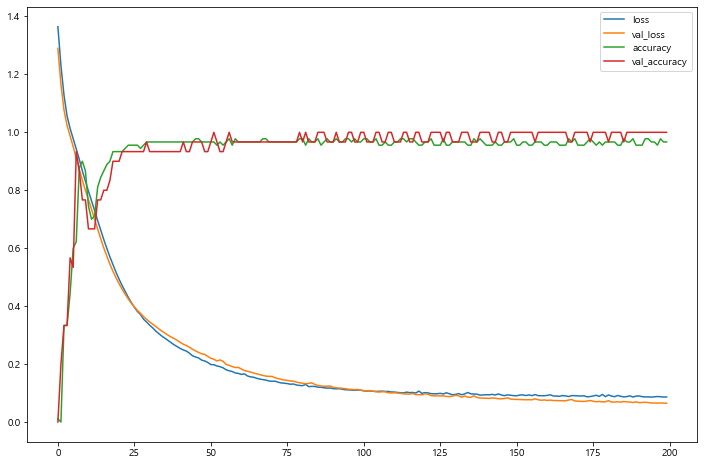

In [180]:
##### 시각화 
print(result.history.keys())
plt.figure(figsize=(12,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])

In [182]:
loss,acc=model.evaluate(X_test,y_test)
print(loss,acc)

30/30 [==============================] - 0s 66us/step
0.04325282201170921 1.0


In [185]:
##### 성능 측정 결과
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_pred_class=np.argmax(y_pred,axis=1)

y_test_class=np.argmax(y_test,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


ValueError: Shape of passed values is (30, 1), indices imply (30, 3)

In [187]:
pred = model.predict_classes(np.array([[5,2.9,1,0.2]]))
pred
iris['species'].unique()[pred]

array(['setosa'], dtype=object)

### 4) MNIST

+ 첫번째 형태 : 가장 simple한 설계 

In [2]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
##### one-hot encoding 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [13]:
##### 모델 설계 및 학습 :3개의 레이어, 64개의 입출력 
# 2차원으로 바꿔줘야함 

X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)

model =Sequential()

model.add(Dense(64,input_dim=28*28,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy']) 
model.fit(X_train,y_train,epochs=20, batch_size=32)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 6.2363 - accuracy: 0.7089
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.4079 - accuracy: 0.8510
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.8384 - accuracy: 0.8834
Epoch 4/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.5779 - accuracy: 0.9022
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.4294 - accuracy: 0.9186
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3396 - accuracy: 0.9300
Epoch 7/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2763 - accuracy: 0.9377
Epoch 8/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2333 - accuracy: 0.9442
Epoch 9/20
60000/60000 [==============================] - 3s 51us/step - loss:

In [5]:
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)

model =Sequential()

model.add(Dense(64,input_dim=28*28,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy']) 
model.fit(X_train,y_train,epochs=30, batch_size=32)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/30
60000/60000 [==============================] - 5s 79us/step - loss: 7.3389 - accuracy: 0.7050
Epoch 2/30
60000/60000 [==============================] - ETA: 0s - loss: 1.4865 - accuracy: 0.83 - 4s 69us/step - loss: 1.4836 - accuracy: 0.8392
Epoch 3/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.8508 - accuracy: 0.8697
Epoch 4/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.5696 - accuracy: 0.8925
Epoch 5/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.4163 - accuracy: 0.9100
Epoch 6/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.3227 - accuracy: 0.9268
Epoch 7/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.2600 - accuracy: 0.9371
Epoch 8/30
60000/60000 [==============================] - 4s 64us/step - loss: 0.2166 - accuracy: 0.9454
Epoch 9/30
60000/60000 [============

In [6]:
##### 모델평가 
result=model.evaluate(X_test,y_test,batch_size=32)
print(result)


10000/10000 [==============================] - 0s 36us/step
[0.3210179123264628, 0.9559000134468079]


In [18]:
##### 모델 예측 
# 임의로 10개의 이미지 추출 
xhat_idx=np.random.choice(10000,10)


In [19]:
# print(xhat_idx)
# print(y_test[xhat_idx])

for i in range(10):
    print(np.argmax(y_test[xhat_idx[i]]))

4
8
5
7
5
1
0
1
4
3


In [20]:
model.predict_classes(X_test[xhat_idx])

array([4, 8, 5, 3, 5, 1, 0, 1, 4, 3], dtype=int64)

------------------------------------------------
+ 두 번째 형태: 표준화, K-Fold Cross Validatation

In [23]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

##### one-hot encoding 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

##### 표준화 
# 우선 3차원이니까 2차원으로 바꿔줘야함.
X_train = X_train.reshape(-1,28*28).astype('float32')/255
X_test = X_test.reshape(-1,28*28).astype('float32')/255

##### validation 분할(k-fold)
X_val = X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train=y_train[10000:]

In [24]:
##### 모델 설계 및 학습 : 3개의 레이어, 64개의 입출력 
model =Sequential()

model.add(Dense(64,input_dim=28*28,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy']) 
model.fit(X_train,y_train,epochs=20, batch_size=32,validation_data=(X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 66us/step - loss: 0.7527 - accuracy: 0.8011 - val_loss: 0.3385 - val_accuracy: 0.9090
Epoch 2/20
50000/50000 [==============================] - 3s 61us/step - loss: 0.2956 - accuracy: 0.9172 - val_loss: 0.2616 - val_accuracy: 0.9281
Epoch 3/20
50000/50000 [==============================] - 3s 64us/step - loss: 0.2409 - accuracy: 0.9316 - val_loss: 0.2263 - val_accuracy: 0.9366
Epoch 4/20
50000/50000 [==============================] - 3s 63us/step - loss: 0.2087 - accuracy: 0.9406 - val_loss: 0.2034 - val_accuracy: 0.9441
Epoch 5/20
50000/50000 [==============================] - 3s 69us/step - loss: 0.1854 - accuracy: 0.9475 - val_loss: 0.1838 - val_accuracy: 0.9469
Epoch 6/20
50000/50000 [==============================] - 3s 63us/step - loss: 0.1672 - accuracy: 0.9525 - val_loss: 0.1735 - val_accuracy: 0.9494
Epoch 7/20
50000/50000 [==============================] - 4s 83us/st

In [25]:
result=model.evaluate(X_test,y_test,batch_size=32)
print(result)

10000/10000 [==============================] - 0s 23us/step
[0.09490198303200305, 0.9708999991416931]


----------------------------------------------------------------

+ 세번째 : 텐서보드, 모델 저장(매번 훈련하면서 쓸 수 없기 때문에) 

In [26]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

##### one-hot encoding 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

##### 표준화 
# 우선 3차원이니까 2차원으로 바꿔줘야함.
X_train = X_train.reshape(-1,28*28).astype('float32')/255
X_test = X_test.reshape(-1,28*28).astype('float32')/255

##### validation 분할(k-fold)
X_val = X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train=y_train[10000:]

In [27]:
##### 모델 설계 및 학습 : 3개의 레이어, 64개의 입출력 
model =Sequential()

model.add(Dense(64,input_dim=28*28,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy']) 


# Tensorboard 설정: tensorboard --logdir=graph --> 콘솔창에서 실행
# callback 함수는 우리가 호출하는게 아니라 거꾸로 시스템이 호출하는 것 
tf_hist = keras.callbacks.TensorBoard(log_dir='./graph',write_graph=True,write_images=True)

model.fit(X_train,y_train,epochs=20, batch_size=32,validation_data=(X_val,y_val),
         callbacks=[tf_hist]) # 훈련하면서 tf_hist를 알아서 끌어다 씀. 

# 모델 저장 
model.save('data/mnist_model.h5')

Train on 50000 samples, validate on 10000 samples


Epoch 1/20
50000/50000 [==============================] - 4s 81us/step - loss: 0.7502 - accuracy: 0.8089 - val_loss: 0.3510 - val_accuracy: 0.9056

Epoch 2/20
50000/50000 [==============================] - 4s 73us/step - loss: 0.3127 - accuracy: 0.9128 - val_loss: 0.2765 - val_accuracy: 0.9254
Epoch 3/20
50000/50000 [==============================] - 4s 79us/step - loss: 0.2553 - accuracy: 0.9267 - val_loss: 0.2365 - val_accuracy: 0.9328
Epoch 4/20
50000/50000 [==============================] - 4s 72us/step - loss: 0.2217 - accuracy: 0.9367 - val_loss: 0.2119 - val_accuracy: 0.9406
Epoch 5/20
50000/50000 [==============================] - 4s 80us/step - loss: 0.1975 - accuracy: 0.9434 - val_loss: 0.1916 - val_accuracy: 0.9459
Epoch 6/20
50000/50000 [==============================] - 4s 81us/step - loss: 0.1786 - accuracy: 0.9491 - val_loss: 0.1785 - val_accuracy: 0.9495
Epoch 7/20
50000/50000 [==============================] - 3s 70us

In [28]:
# 모델 불러오기 
model2 = load_model('data/mnist_model.h5')

In [5]:
model3=load_model('data/model_220106.h5')

TypeError: __init__() got an unexpected keyword argument 'ragged'

In [5]:
model3

In [29]:
result=model.evaluate(X_test,y_test,batch_size=32)
print(result)

10000/10000 [==============================] - 0s 23us/step
[0.10204931476339697, 0.9696000218391418]


---
+ 네 번째 형태 : 조기 종료(EarlyStopping)

    - EarlyStopping(monitor= 'val_loss',min_delta=0,patience=0) --> 과적합 예방의 효과도 있음
        + monitor : 관찰하고자 하는 항목, 주로 val_loss나 val_acc가 사용된다.
        + min_delta : 개선되고 있다고 판단하기 위한 최소 변화량, 보통은 0을 지정, 증가가 없거나 할때 바로 종료해벌인다는 
        + patience : 지정된 값까지 기다렸다가 종료
            - 5라고 한다면 변화가 없다고 바로 종료하는게 아니라 5번은 더 지켜보고 종료한다는 것 
            

In [30]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

##### one-hot encoding 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

##### 표준화 
# 우선 3차원이니까 2차원으로 바꿔줘야함.
X_train = X_train.reshape(-1,28*28).astype('float32')/255
X_test = X_test.reshape(-1,28*28).astype('float32')/255

##### validation 분할(k-fold)
X_val = X_train[:10000]
X_train = X_train[10000:]
y_val = y_train[:10000]
y_train=y_train[10000:]

In [31]:
##### 모델 설계 및 학습 : 3개의 레이어, 64개의 입출력 
model =Sequential()

model.add(Dense(64,input_dim=28*28,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy']) 


# Tensorboard 설정: tensorboard --logdir=graph --> 콘솔창에서 실행
# callback 함수는 우리가 호출하는게 아니라 거꾸로 시스템이 호출하는 것 
tf_hist = keras.callbacks.TensorBoard(log_dir='./graph',write_graph=True,write_images=True)

# 조기종료 
early=EarlyStopping()

model.fit(X_train,y_train,epochs=30, batch_size=32,validation_data=(X_val,y_val),
         callbacks=[tf_hist,early]) # 훈련하면서 tf_hist를 알아서 끌어다 씀. 


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 79us/step - loss: 0.7539 - accuracy: 0.8023 - val_loss: 0.3346 - val_accuracy: 0.9108
Epoch 2/30
50000/50000 [==============================] - 4s 76us/step - loss: 0.2978 - accuracy: 0.9168 - val_loss: 0.2568 - val_accuracy: 0.9294
Epoch 3/30
50000/50000 [==============================] - 4s 75us/step - loss: 0.2410 - accuracy: 0.9316 - val_loss: 0.2205 - val_accuracy: 0.9397
Epoch 4/30
50000/50000 [==============================] - 4s 78us/step - loss: 0.2089 - accuracy: 0.9405 - val_loss: 0.1981 - val_accuracy: 0.9432
Epoch 5/30
50000/50000 [==============================] - 4s 79us/step - loss: 0.1863 - accuracy: 0.9458 - val_loss: 0.1836 - val_accuracy: 0.9469
Epoch 6/30
50000/50000 [==============================] - 4s 73us/step - loss: 0.1695 - accuracy: 0.9512 - val_loss: 0.1721 - val_accuracy: 0.9520
Epoch 7/30
50000/50000 [==============================] - 4s 78us/st

---
+ 다섯 번째 형태: 함수화, Dropout

In [48]:

def make_model(input_num, output_num, hidden_layer):
    model = Sequential()

    model.add(Dense(hidden_layer[0], input_dim=input_num, activation="relu"))
    model.add(Dense(hidden_layer[1], activation="relu"))
    model.add(Dense(hidden_layer[2], activation="relu"))
    model.add(Dense(hidden_layer[3], activation="relu"))
    
    # dropout
    model.add(keras.layers.core.Dropout(0.2))
    
    model.add(Dense(output_num, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
    return model

In [49]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##### one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

##### 표준화
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255

##### 파라미터
input_num = 28*28
output_num = 10
hidden_layer = [255, 255, 255, 255]

model = make_model(input_num, output_num, hidden_layer)
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.3967 - accuracy: 0.8834
Epoch 2/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.1513 - accuracy: 0.9552
Epoch 3/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.1053 - accuracy: 0.9689
Epoch 4/20
60000/60000 [==============================] - 14s 242us/step - loss: 0.0793 - accuracy: 0.9761
Epoch 5/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.0630 - accuracy: 0.9808
Epoch 6/20
60000/60000 [==============================] - 16s 264us/step - loss: 0.0495 - accuracy: 0.9852
Epoch 7/20
60000/60000 [==============================] - 18s 295us/step - loss: 0.0389 - accuracy: 0.9876
Epoch 8/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0325 - accuracy: 0.9899
Epoch 9/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.0259 - accuracy: 0.9919
Epoch 10/20
60000/60000 [============

In [50]:
for i in range(len(hidden_layer)):
        if i == 0:
            model.add(Dense(hidden_layer[i], input_dim=input_num, activation='relu'))
        elif i == (len(hidden_layer) - 1):
            model.add(Dense(output_num, activation='softmax'))
        else:
            model.add(Dense(hidden_layer[i], activation='relu'))


In [51]:

##### 모델 평가
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 1s 76us/step
[2.3049998458862304, 0.0019000000320374966]


In [ ]:
def make_model(input_num, output_num, hidden_layer):
    model = Sequential()
    
    model.add(Dense(64, input_dim=input_num, activation="relu"))
    
    if len(hidden_layer)-1 !=0:
        for i in range(len(hidden_layer)-1):
            model.add(Dense(hidden_layer[i+1], activation="relu"))
        model.add(Dense(output_num, activation="softmax"))
    else:
        pass

    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])
    return model

### (4) CNN
- sample = mnist
- convolution layer는 3개 
- 필터갯수는 , 크기는 3*3



In [110]:
from keras import layers

##### 모델 설계 
model= Sequential()

# 첫번째 conv layer
model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(2,2))

# 두번째 conv layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

# 세번째 conv layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))

# FC Layer
model.add(layers.Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)              

In [ ]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

##### one-hot encoding 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

##### 표준화 
# 우선 3차원이니까 2차원으로 바꿔줘야함.
X_train = X_train.reshape(60000,28,28,1).astype('float32')/255
X_test = X_test.reshape(10000,28,28,1).astype('float32')/255

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy']) 
model.fit(X_train,y_train, epochs=5,batch_size=100) 


Epoch 1/5
60000/60000 [==============================] - 70s 1ms/step - loss: 0.2023 - accuracy: 0.9385
Epoch 2/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 3/5
58500/60000 [============================>.] - ETA: 1s - loss: 0.0389 - accuracy: 0.9879

In [ ]:
##### 모델 평가
result = model.evaluate(X_test, y_test, batch_size=100)
print(result)

### (5) RNN

+ 뉴스 기사 분류 : 다중분류 
    - 로이더 뉴스를 46개의 도팩느로 분류하느 신경망 
    - 1986년 로이더에서 공개하는 짧은 뉴스기사의 도픽의 기종 
    - 각 토픽은 최소 10개의 샘플이 있다. 
    

In [104]:
from keras.datasets import reuters

In [105]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=None,test_split=0.2)

print('훈련용 뉴스 기사: ', len(X_train))
print('테스트형 누스기사 :', len(X_test))
print('카테고리 :',max(y_train)+1)

훈련용 뉴스 기사:  8982
테스트형 누스기사 : 2246
카테고리 : 46


In [106]:
# 첫 번째 훈련용 뉴스 기사 
print(X_train[0])

# 첫번째 뉴스기사 카테고리 
print(y_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


최대길이: 2376
평균 길이: 145.5398574927633


Text(0, 0.5, '샘플의 갯수')

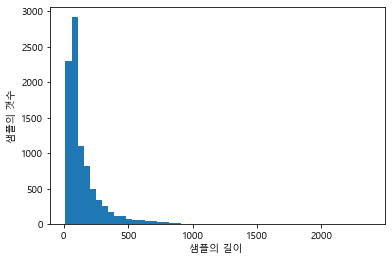

In [107]:
3 # 뉴스 기사길이
print('최대길이:',max(len(i) for i in X_train))
print('평균 길이:', sum(map(len,X_train))/len(X_train))

plt.hist([len(s) for s in X_train],bins=50)
plt.xlabel('샘플의 길이 ')
plt.ylabel('샘플의 갯수')

<AxesSubplot:ylabel='count'>

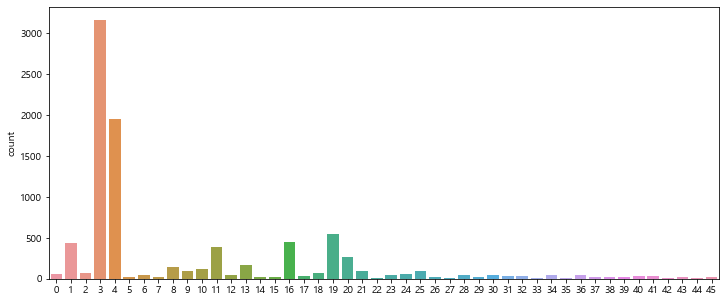

In [108]:
# 카테고리별 빈도수 확인 

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [17]:
# 카테고리별 정확한 빈도수 확인(수치)
category,counts=np.unique(y_train,return_counts=True)
print(category)
print('------------------------------------')
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
------------------------------------
[  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
   26   20  444   39   66  549  269  100   15   41   62   92   24   15
   48   19   45   39   32   11   50   10   49   19   19   24   36   30
   13   21   12   18]


In [18]:
# 각 단어별 빈도수에 대한 순위 확인 
word_to_index=reuters.get_word_index()
print(word_to_index)

557056/550378 [==============================] - 9s 17us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16

In [19]:
# 빈도수 순위에 따른 해당 단어 알아내기 
index_to_word={}
for key,value in word_to_index.items():
    index_to_word[value]=key

In [21]:
print('빈도수 상위 28842번쨰 단어 :',index_to_word[28842])
print('빈도수 상위 1번째 단어 :',index_to_word[1])

빈도수 상위 28842번쨰 단어 : nondiscriminatory
빈도수 상위 1번째 단어 : the


In [22]:
print(''.join([index_to_word[i] for i in X_train[0]]))

thewattienondiscriminatorymlnlossforplcsaidatonlyendedsaidcommonwealthcould1tradersnowapril0aaftersaidfrom1985andfromforeign000april0pricesitsaccountyearabutinthismlnhomeanstatesearlierandriseandrevsvs000its16vs000abut3psbroilsseveralandshareholdersanddividendvs000itsall4vs0001mlnagreedlargelyapril0are2stateswillbilliontotalandagainst000pctdlrs


### (2) 데이터 준비 

In [93]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=30000,test_split=0.3,maxlen=50)# num_words=1000// 1000 넘어가는거 뺌

print('훈련용 뉴스 기사: ', len(X_train))
print('테스트형 누스기사 :', len(X_test))

훈련용 뉴스 기사:  1395
테스트형 누스기사 : 599


In [94]:
print(len(X_train[0]))

31


In [95]:
# 문장의 길이를맞춰준다.
from keras.preprocessing.sequence import pad_sequences

X_train= pad_sequences(X_train,padding='post')
X_test=pad_sequences(X_test,padding='post')

print(X_train[0])
print(X_train.shape)
print(y_train) # one -hot encoding이 필요 

[   1  245  273  207  156   53   74  160   26   14   46  296   26   39
   74 2979 3554   14   46 4689 4329   86   61 3499 4795   14   61  451
 4329   17   12    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
(1395, 49)
[3 3 3 ... 3 3 3]


In [96]:
from keras.utils import to_categorical

# 학습데이터를 3차원으로 맟춰주기 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_test.shape)

# 레이블을 원핫 인코딩으로 처리 
y_data = np.concatenate((y_train,y_test))
y_data = to_categorical(y_data)
y_data

y_train = y_data[:1395]
y_test = y_data[1395:]
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


### (4) Vanila RNN

In [79]:
from keras.layers import SimpleRNN
from keras.wrappers.scikit_learn import KerasClassifier # 사이킷런에서 쓰던 분류알고리즘을 케라스에서 쓰겠다

In [76]:
# 단층 RNN : return_squences
# 메로미셀이 모든 시점(Time Step)에 대해서 은닉 상태값을 출력할 때 True
# 다층 모델일 경우에도 True
# 메모리셀이 하나의 hidden state만 출력하면 False
def vanila_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50,input_shape=(49,1),return_sequences=False))
    model.add(Dense(46,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
    return model

In [77]:
model = KerasClassifier(build_fn=vanila_rnn,epochs=200,batch_size=50,verbose=1) # 몇번 돌릴꺼냐, 미니배치, 상세
model.fit(X_train,y_train)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/200
1395/1395 [==============================] - 0s 304us/step - loss: 2.9462 - accuracy: 0.4430
Epoch 2/200
1395/1395 [==============================] - 0s 182us/step - loss: 1.3164 - accuracy: 0.7068
Epoch 3/200
1395/1395 [==============================] - 0s 148us/step - loss: 1.1939 - accuracy: 0.7147
Epoch 4/200
1395/1395 [==============================] - 0s 147us/step - loss: 1.1739 - accuracy: 0.7147
Epoch 5/200
1395/1395 [==============================] - 0s 152us/step - loss: 1.1645 - accuracy: 0.7147
Epoch 6/200
1395/1395 [==============================] - 0s 147us/step - loss: 1.1618 - accuracy: 0.7147
Epoch 7/200
1395/1395 [==============================] - 0s 151us/step - loss: 1.1577 - accuracy: 0.7147
Epoch 8/200
1395/1395 [==============================] - 0s 164us/step - loss: 1.1565 - accuracy: 0.7147
Epoch 9/200
1395/1395 [==============================] - 0s 150us/step - loss:

1395/1395 [==============================] - 0s 223us/step - loss: 0.9839 - accuracy: 0.7154
Epoch 73/200
1395/1395 [==============================] - 0s 188us/step - loss: 0.9766 - accuracy: 0.7254
Epoch 74/200
1395/1395 [==============================] - 0s 198us/step - loss: 0.9790 - accuracy: 0.7305
Epoch 75/200
1395/1395 [==============================] - 0s 190us/step - loss: 0.9702 - accuracy: 0.7226
Epoch 76/200
1395/1395 [==============================] - 0s 183us/step - loss: 0.9655 - accuracy: 0.7290
Epoch 77/200
1395/1395 [==============================] - 0s 184us/step - loss: 0.9650 - accuracy: 0.7240
Epoch 78/200
1395/1395 [==============================] - 0s 197us/step - loss: 0.9639 - accuracy: 0.7211
Epoch 79/200
1395/1395 [==============================] - 0s 188us/step - loss: 0.9517 - accuracy: 0.7276
Epoch 80/200
1395/1395 [==============================] - 0s 190us/step - loss: 0.9543 - accuracy: 0.7297
Epoch 81/200
1395/1395 [==============================] - 0

In [78]:
### 위는 훈련 데이터고
# 테스트 데이터로 해봐야지
from sklearn.metrics import accuracy_score

y_pred =model.predict(X_test)
y_test_ = np.argmax(y_test,axis=1)
print(accuracy_score(y_pred,y_test_))

599/599 [==============================] - 0s 132us/step
0.7479131886477463


In [89]:
# 다층 RNN

def stacked_vanila_rnn():
    model = Sequential()
    model.add(SimpleRNN(units=50,input_shape=(49,1),return_sequences=True))
    model.add(SimpleRNN(units=50,return_sequences=False))
    model.add(Dense(46,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
    return model

In [90]:
model = KerasClassifier(build_fn=stacked_vanila_rnn,epochs=200,batch_size=50,verbose=1) # 몇번 돌릴꺼냐, 미니배치, 상세
model.fit(X_train,y_train)

Epoch 1/200
1395/1395 [==============================] - 1s 481us/step - loss: 2.7745 - accuracy: 0.4824
Epoch 2/200
1395/1395 [==============================] - 0s 334us/step - loss: 1.3473 - accuracy: 0.7147
Epoch 3/200
1395/1395 [==============================] - 0s 322us/step - loss: 1.1743 - accuracy: 0.7147
Epoch 4/200
1395/1395 [==============================] - 0s 326us/step - loss: 1.1393 - accuracy: 0.7147
Epoch 5/200
1395/1395 [==============================] - 0s 336us/step - loss: 1.1152 - accuracy: 0.7147
Epoch 6/200
1395/1395 [==============================] - 0s 336us/step - loss: 1.1003 - accuracy: 0.7125
Epoch 7/200
1395/1395 [==============================] - 0s 321us/step - loss: 1.0904 - accuracy: 0.7168
Epoch 8/200
1395/1395 [==============================] - 0s 333us/step - loss: 1.0852 - accuracy: 0.7118
Epoch 9/200
1395/1395 [==============================] - 0s 328us/step - loss: 1.0756 - accuracy: 0.7183
Epoch 10/200
1395/1395 [==============================]

1395/1395 [==============================] - 1s 426us/step - loss: 0.4037 - accuracy: 0.8559
Epoch 150/200
1395/1395 [==============================] - 1s 414us/step - loss: 0.4579 - accuracy: 0.8430
Epoch 151/200
1395/1395 [==============================] - 1s 422us/step - loss: 0.4495 - accuracy: 0.8358
Epoch 152/200
1395/1395 [==============================] - 1s 436us/step - loss: 0.4129 - accuracy: 0.8573
Epoch 153/200
1395/1395 [==============================] - 1s 419us/step - loss: 0.3782 - accuracy: 0.8724
Epoch 154/200
1395/1395 [==============================] - 1s 531us/step - loss: 0.3728 - accuracy: 0.8710
Epoch 155/200
1395/1395 [==============================] - 1s 483us/step - loss: 0.3529 - accuracy: 0.8803
Epoch 156/200
1395/1395 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.85 - 1s 425us/step - loss: 0.4002 - accuracy: 0.8588
Epoch 157/200
1395/1395 [==============================] - 1s 414us/step - loss: 0.3673 - accuracy: 0.8774
Epoch 158

In [88]:
y_pred =model.predict(X_test)
y_test_ = np.argmax(y_test,axis=1)
print(accuracy_score(y_pred,y_test_))

599/599 [==============================] - 0s 361us/step
0.7579298831385642


### (5) LSTM

In [91]:
from keras.layers import LSTM

In [97]:
def lstm_rnn():
    model = Sequential()
    model.add(LSTM(units=50,input_shape=(49,1),return_sequences=False))
    model.add(Dense(46,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
    return model

In [98]:
model = KerasClassifier(build_fn=lstm_rnn,epochs=200,batch_size=50,verbose=1) # 몇번 돌릴꺼냐, 미니배치, 상세
model.fit(X_train,y_train)

Epoch 1/200
1395/1395 [==============================] - 1s 781us/step - loss: 3.0131 - accuracy: 0.6473
Epoch 2/200
1395/1395 [==============================] - 1s 545us/step - loss: 1.3707 - accuracy: 0.7147
Epoch 3/200
1395/1395 [==============================] - 1s 562us/step - loss: 1.1880 - accuracy: 0.71470s - loss: 1.2
Epoch 4/200
1395/1395 [==============================] - 1s 596us/step - loss: 1.1513 - accuracy: 0.71470s - loss: 1.126
Epoch 5/200
1395/1395 [==============================] - 1s 594us/step - loss: 1.1184 - accuracy: 0.7147
Epoch 6/200
1395/1395 [==============================] - 1s 560us/step - loss: 1.0969 - accuracy: 0.7147
Epoch 7/200
1395/1395 [==============================] - 1s 528us/step - loss: 1.0732 - accuracy: 0.7147
Epoch 8/200
1395/1395 [==============================] - 1s 531us/step - loss: 1.0348 - accuracy: 0.7147
Epoch 9/200
1395/1395 [==============================] - 1s 540us/step - loss: 1.0105 - accuracy: 0.7290
Epoch 10/200
1395/1395 [=

1395/1395 [==============================] - 1s 660us/step - loss: 0.4202 - accuracy: 0.8989
Epoch 149/200
1395/1395 [==============================] - 1s 615us/step - loss: 0.4152 - accuracy: 0.89960s - loss: 0.4293 - accuracy: 
Epoch 150/200
1395/1395 [==============================] - 1s 581us/step - loss: 0.4112 - accuracy: 0.8996
Epoch 151/200
1395/1395 [==============================] - 1s 626us/step - loss: 0.4006 - accuracy: 0.9011
Epoch 152/200
1395/1395 [==============================] - 1s 613us/step - loss: 0.4022 - accuracy: 0.9004
Epoch 153/200
1395/1395 [==============================] - 1s 613us/step - loss: 0.3927 - accuracy: 0.9047
Epoch 154/200
1395/1395 [==============================] - 1s 654us/step - loss: 0.3888 - accuracy: 0.9090
Epoch 155/200
1395/1395 [==============================] - 1s 606us/step - loss: 0.4197 - accuracy: 0.8932
Epoch 156/200
1395/1395 [==============================] - 1s 639us/step - loss: 0.3949 - accuracy: 0.9061
Epoch 157/200
1395/13

In [99]:
y_pred =model.predict(X_test)
y_test_ = np.argmax(y_test,axis=1)
print(accuracy_score(y_pred,y_test_))

599/599 [==============================] - 0s 504us/step
0.8580968280467446
